<a href="https://colab.research.google.com/github/ZiaulHoqueKhasru/CardioVascularDisease/blob/main/CVD_paper_29jun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hydra Mutants->
**A machine learning data driven approach for predicting cardio vascular disease **

#Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

#Dataset

In [ ]:
df_fhs = pd.read_csv('/content/framingham.csv')

In [ ]:
df_fhs.head()

SEX  RANDID TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE CIGPDAY    BMI  DIABETES  \
0    1    2448     195   39  106.0   70.0         0       0  26.97         0   
1    1    2448     209   52  121.0   66.0         0       0      .         0   
2    2    6238     250   46  121.0   81.0         0       0  28.73         0   
3    2    6238     260   52  105.0   69.5         0       0  29.43         0   
4    2    6238     237   58  108.0   66.0         0       0   28.5         0   

   ... CVD HYPERTEN TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  TIMECVD  \
0  ...   1        0   8766    6438      6438     6438      8766     6438   
1  ...   1        0   8766    6438      6438     6438      8766     6438   
2  ...   0        0   8766    8766      8766     8766      8766     8766   
3  ...   0        0   8766    8766      8766     8766      8766     8766   
4  ...   0        0   8766    8766      8766     8766      8766     8766   

   TIMEDTH  TIMEHYP  
0     8766     8766  
1     8766     8766  
2     8766     8766  
3     8766     8766  
4     8766     8766  

[5 rows x 38 columns]

In [ ]:
df_fhs.shape

(11627, 38)

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  int64  
 1   RANDID    11627 non-null  int64  
 2   TOTCHOL   11627 non-null  object 
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11627 non-null  object 
 8   BMI       11627 non-null  object 
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11627 non-null  object 
 11  HEARTRTE  11627 non-null  object 
 12  GLUCOSE   11627 non-null  object 
 13  PREVCHD   11627 non-null  int64  
 14  PREVAP    11627 non-null  int64  
 15  PREVMI    11627 non-null  int64  
 16  PREVSTRK  11627 non-null  int64  
 17  PREVHYP   11627 non-null  int64  
 18  TIME      11627 non-null  int64  
 19  PERIOD    11627 non-null  int64  
 20  HDLC      11627 non-null  ob

In [ ]:
unique_values = df_fhs['TOTCHOL'].unique()
data_type = unique_values.dtype
print(data_type)

object


In [ ]:
df_fhs['TOTCHOL'].value_counts(normalize=True)


TOTCHOL
.      0.035177
240    0.015997
250    0.013245
232    0.012901
226    0.012815
         ...   
379    0.000086
406    0.000086
460    0.000086
122    0.000086
119    0.000086
Name: proportion, Length: 300, dtype: float64

In [ ]:
#Basic Descriptive
pd.set_option('display.float_format',lambda x: '%.3r' % x)
df_fhs.describe().transpose()

count  mean  std  min  25%  50%  75%  max
SEX         116   1.5  0.4  1.0  1.0  2.0  2.0  2.0
RANDID      116   500  290  244  247  500  747  999
AGE         116   54.  9.5  32.  48.  54.  62.  81.
SYSBP       116   136  22.  83.  120  132  149  295
DIABP       116   83.  11.  30.  75.  82.  90.  150
CURSMOKE    116   0.4  0.4  0.0  0.0  0.0  1.0  1.0
DIABETES    116   0.0  0.2  0.0  0.0  0.0  0.0  1.0
PREVCHD     116   0.0  0.2  0.0  0.0  0.0  0.0  1.0
PREVAP      116   0.0  0.2  0.0  0.0  0.0  0.0  1.0
PREVMI      116   0.0  0.1  0.0  0.0  0.0  0.0  1.0
PREVSTRK    116   0.0  0.1  0.0  0.0  0.0  0.0  1.0
PREVHYP     116   0.4  0.4  0.0  0.0  0.0  1.0  1.0
TIME        116   195  175  0.0  0.0  215  425  485
PERIOD      116   1.8  0.8  1.0  1.0  2.0  3.0  3.0
DEATH       116   0.3  0.4  0.0  0.0  0.0  1.0  1.0
ANGINA      116   0.1  0.3  0.0  0.0  0.0  0.0  1.0
HOSPMI      116   0.0  0.2  0.0  0.0  0.0  0.0  1.0
MI_FCHD     116   0.1  0.3  0.0  0.0  0.0  0.0  1.0
ANYCHD      116   0.2  0.4  0.0  0.0  0.0  1.0  1.0
STROKE      116   0.0  0.2  0.0  0.0  0.0  0.0  1.0
CVD         116   0.2  0.4  0.0  0.0  0.0  0.0  1.0
HYPERTEN    116   0.7  0.4  0.0  0.0  1.0  1.0  1.0
TIMEAP      116   724  247  0.0  622  876  876  876
TIMEMI      116   759  213  0.0  721  876  876  876
TIMEMIFC    116   754  219  0.0  704  876  876  876
TIMECHD     116   700  264  0.0  559  876  876  876
TIMESTRK    116   766  201  0.0  729  876  876  876
TIMECVD     116   716  254  0.0  600  876  876  876
TIMEDTH     116   785  178  26.  779  876  876  876
TIMEHYP     116   359  346  0.0  0.0  242  732  876

#Droping Time data new Dataset

In [ ]:
print(df_fhs.columns.tolist())

['SEX', 'RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']


In [ ]:
df_fhs2 = df_fhs.drop(['TIME','PERIOD','DEATH','TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],axis = 1)

In [ ]:
df_fhs2.head()

SEX  RANDID TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE CIGPDAY    BMI  DIABETES  \
0    1    2448     195   39    106    70.         0       0  26.97         0   
1    1    2448     209   52    121    66.         0       0      .         0   
2    2    6238     250   46    121    81.         0       0  28.73         0   
3    2    6238     260   52    105    69.         0       0  29.43         0   
4    2    6238     237   58    108    66.         0       0   28.5         0   

   ... PREVHYP HDLC LDLC  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE CVD HYPERTEN  
0  ...       0    .    .       0       1        1       1       0   1        0  
1  ...       0   31  178       0       1        1       1       0   1        0  
2  ...       0    .    .       0       0        0       0       0   0        0  
3  ...       0    .    .       0       0        0       0       0   0        0  
4  ...       0   54  141       0       0        0       0       0   0        0  

[5 rows x 27 columns]

In [ ]:
#reshaping missing value
df_fhs2.replace('.',np.nan,inplace =True)

#Finding Missing Value

In [ ]:
df_fhs2.isnull()

SEX  RANDID  TOTCHOL    AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0      False   False    False  False  False  False     False    False  False   
1      False   False    False  False  False  False     False    False   True   
2      False   False    False  False  False  False     False    False  False   
3      False   False    False  False  False  False     False    False  False   
4      False   False    False  False  False  False     False    False  False   
...      ...     ...      ...    ...    ...    ...       ...      ...    ...   
11622  False   False    False  False  False  False     False    False  False   
11623  False   False    False  False  False  False     False    False  False   
11624  False   False    False  False  False  False     False    False  False   
11625  False   False    False  False  False  False     False    False  False   
11626  False   False     True  False  False  False     False    False  False   

       DIABETES  ...  PREVHYP   HDLC   LDLC  ANGINA  HOSPMI  MI_FCHD  ANYCHD  \
0         False  ...    False   True   True   False   False    False   False   
1         False  ...    False  False  False   False   False    False   False   
2         False  ...    False   True   True   False   False    False   False   
3         False  ...    False   True   True   False   False    False   False   
4         False  ...    False  False  False   False   False    False   False   
...         ...  ...      ...    ...    ...     ...     ...      ...     ...   
11622     False  ...    False   True   True   False   False    False   False   
11623     False  ...    False  False  False   False   False    False   False   
11624     False  ...    False   True   True   False   False    False   False   
11625     False  ...    False   True   True   False   False    False   False   
11626     False  ...    False   True   True   False   False    False   False   

       STROKE    CVD  HYPERTEN  
0       False  False     False  
1       False  False     False  
2       False  False     False  
3       False  False     False  
4       False  False     False  
...       ...    ...       ...  
11622   False  False     False  
11623   False  False     False  
11624   False  False     False  
11625   False  False     False  
11626   False  False     False  

[11627 rows x 27 columns]

In [ ]:
df_fhs2.isnull().sum()

SEX            0
RANDID         0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
HDLC        8600
LDLC        8601
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
dtype: int64

In [ ]:
#which colunms are missing values and what is the extent of the missingness?
df_fhs2.isnull().sum()/len(df_fhs2)*100

SEX        0.0
RANDID     0.0
TOTCHOL    3.5
AGE        0.0
SYSBP      0.0
DIABP      0.0
CURSMOKE   0.0
CIGPDAY    0.6
BMI        0.4
DIABETES   0.0
BPMEDS     5.1
HEARTRTE   0.0
GLUCOSE    12.
PREVCHD    0.0
PREVAP     0.0
PREVMI     0.0
PREVSTRK   0.0
PREVHYP    0.0
HDLC       73.
LDLC       73.
ANGINA     0.0
HOSPMI     0.0
MI_FCHD    0.0
ANYCHD     0.0
STROKE     0.0
CVD        0.0
HYPERTEN   0.0
dtype: float64

In [ ]:
print(df_fhs2.columns.tolist())

['SEX', 'RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'HDLC', 'LDLC', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN']


In [ ]:
#dropping High missing value featre and getting new data set
df_fhs3 = df_fhs2.drop(['HDLC', 'LDLC'],axis=1)
df_fhs3.isnull().sum()/len(df_fhs3)*100

SEX        0.0
RANDID     0.0
TOTCHOL    3.5
AGE        0.0
SYSBP      0.0
DIABP      0.0
CURSMOKE   0.0
CIGPDAY    0.6
BMI        0.4
DIABETES   0.0
BPMEDS     5.1
HEARTRTE   0.0
GLUCOSE    12.
PREVCHD    0.0
PREVAP     0.0
PREVMI     0.0
PREVSTRK   0.0
PREVHYP    0.0
ANGINA     0.0
HOSPMI     0.0
MI_FCHD    0.0
ANYCHD     0.0
STROKE     0.0
CVD        0.0
HYPERTEN   0.0
dtype: float64

In [ ]:
df_fhs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  int64  
 1   RANDID    11627 non-null  int64  
 2   TOTCHOL   11218 non-null  object 
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  object 
 8   BMI       11575 non-null  object 
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  object 
 11  HEARTRTE  11621 non-null  object 
 12  GLUCOSE   10187 non-null  object 
 13  PREVCHD   11627 non-null  int64  
 14  PREVAP    11627 non-null  int64  
 15  PREVMI    11627 non-null  int64  
 16  PREVSTRK  11627 non-null  int64  
 17  PREVHYP   11627 non-null  int64  
 18  ANGINA    11627 non-null  int64  
 19  HOSPMI    11627 non-null  int64  
 20  MI_FCHD   11627 non-null  in

In [ ]:
column_data = df_fhs3['CIGPDAY'].to_numpy()
string_count = np.sum([isinstance(x, str) for x in column_data])
print(f"Count of string values in 'your_column': {string_count}")


Count of string values in 'your_column': 11548


In [ ]:
df_fhs3['TOTCHOL'] = pd.to_numeric(df_fhs3['TOTCHOL'], errors='coerce')
df_fhs3['CIGPDAY'] = pd.to_numeric(df_fhs3['CIGPDAY'], errors='coerce')
df_fhs3['BMI'] = pd.to_numeric(df_fhs3['BMI'], errors='coerce')
df_fhs3['BPMEDS'] = pd.to_numeric(df_fhs3['BPMEDS'], errors='coerce')
df_fhs3['HEARTRTE'] = pd.to_numeric(df_fhs3['HEARTRTE'], errors='coerce')
df_fhs3['GLUCOSE'] = pd.to_numeric(df_fhs3['GLUCOSE'], errors='coerce')
df_fhs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  int64  
 1   RANDID    11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  PREVCHD   11627 non-null  int64  
 14  PREVAP    11627 non-null  int64  
 15  PREVMI    11627 non-null  int64  
 16  PREVSTRK  11627 non-null  int64  
 17  PREVHYP   11627 non-null  int64  
 18  ANGINA    11627 non-null  int64  
 19  HOSPMI    11627 non-null  int64  
 20  MI_FCHD   11627 non-null  in

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_fhs3[['TOTCHOL', 'GLUCOSE','BMI','CIGPDAY','BPMEDS']])

# Select columns 2 and 12 explicitly
df_fhs3[['TOTCHOL', 'GLUCOSE','BMI','CIGPDAY','BPMEDS']] = imputer.transform(df_fhs3[['TOTCHOL', 'GLUCOSE','BMI','CIGPDAY','BPMEDS']])

In [ ]:
df_fhs3.isnull().sum()/len(df_fhs3)*100

SEX        0.0
RANDID     0.0
TOTCHOL    0.0
AGE        0.0
SYSBP      0.0
DIABP      0.0
CURSMOKE   0.0
CIGPDAY    0.0
BMI        0.0
DIABETES   0.0
BPMEDS     0.0
HEARTRTE   0.0
GLUCOSE    0.0
PREVCHD    0.0
PREVAP     0.0
PREVMI     0.0
PREVSTRK   0.0
PREVHYP    0.0
ANGINA     0.0
HOSPMI     0.0
MI_FCHD    0.0
ANYCHD     0.0
STROKE     0.0
CVD        0.0
HYPERTEN   0.0
dtype: float64

#CHECKING FOR DUPLICATES

In [ ]:
df_fhs3.duplicated().sum()/len(df_fhs3)*100

0.0

#Target Variable

In [ ]:
df_fhs3['CVD'].value_counts(normalize=True)

CVD
0   0.7
1   0.2
Name: proportion, dtype: float64

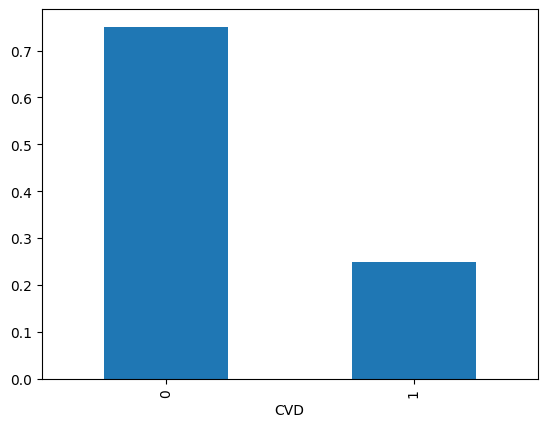

In [ ]:
df_fhs3['CVD'].value_counts(normalize=True).plot(kind = 'bar')
plt.show()

In [ ]:
df_fhs3.dtypes
df_fhs3.groupby('SEX')['CVD'].mean()


SEX
1   0.3
2   0.1
Name: CVD, dtype: float64

In [ ]:
df_fhs3['CVD'].value_counts(normalize=True)


CVD
0   0.7
1   0.2
Name: proportion, dtype: float64

<Axes: xlabel='CVD'>

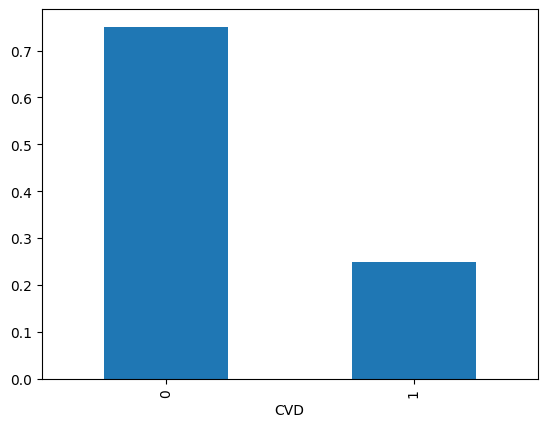

In [ ]:
df_fhs3['CVD'].value_counts(normalize=True).plot(kind='bar')


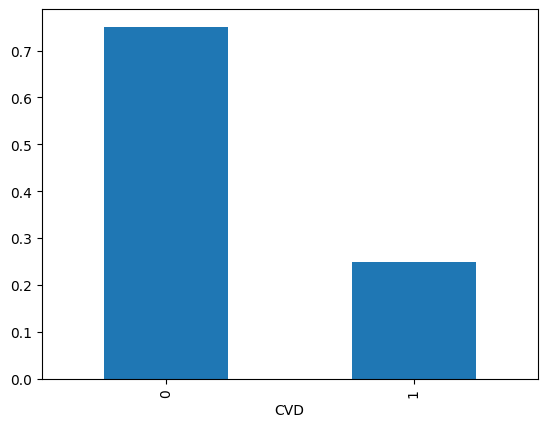

In [ ]:
df_fhs3['CVD'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
df_fhs3.groupby('SEX')['CVD'].mean()


SEX
1   0.3
2   0.1
Name: CVD, dtype: float64

In [ ]:
df_fhs3.nunique().sort_values()

SEX            2
STROKE         2
ANYCHD         2
MI_FCHD        2
HOSPMI         2
ANGINA         2
PREVHYP        2
PREVSTRK       2
PREVMI         2
PREVAP         2
PREVCHD        2
CVD            2
HYPERTEN       2
BPMEDS         2
DIABETES       2
CURSMOKE       2
CIGPDAY       45
AGE           50
HEARTRTE      83
DIABP        160
GLUCOSE      211
SYSBP        260
TOTCHOL      299
BMI         1818
RANDID      4434
dtype: int64

In [ ]:
df_fhs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  int64  
 1   RANDID    11627 non-null  int64  
 2   TOTCHOL   11627 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11627 non-null  float64
 8   BMI       11627 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11627 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   11627 non-null  float64
 13  PREVCHD   11627 non-null  int64  
 14  PREVAP    11627 non-null  int64  
 15  PREVMI    11627 non-null  int64  
 16  PREVSTRK  11627 non-null  int64  
 17  PREVHYP   11627 non-null  int64  
 18  ANGINA    11627 non-null  int64  
 19  HOSPMI    11627 non-null  int64  
 20  MI_FCHD   11627 non-null  in

#Exploratory Data Analysis

In [ ]:
unique_data_types = df_fhs3['HEARTRTE'].apply(type).unique()
print(unique_data_types)

[<class 'float'>]


In [ ]:
columns_with_few_uniques = df_fhs3.columns[df_fhs3.nunique() < 3]
fhs_cat = df_fhs3[columns_with_few_uniques]
fhs_cat

SEX  CURSMOKE  DIABETES  BPMEDS  PREVCHD  PREVAP  PREVMI  PREVSTRK  \
0        1         0         0     0.0        0       0       0         0   
1        1         0         0     0.0        0       0       0         0   
2        2         0         0     0.0        0       0       0         0   
3        2         0         0     0.0        0       0       0         0   
4        2         0         0     0.0        0       0       0         0   
...    ...       ...       ...     ...      ...     ...     ...       ...   
11622    1         0         0     0.0        0       0       0         0   
11623    1         0         0     0.0        0       0       0         0   
11624    2         1         0     0.0        0       0       0         0   
11625    2         1         0     0.0        0       0       0         0   
11626    2         1         0     0.0        0       0       0         0   

       PREVHYP  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE  CVD  HYPERTEN  
0            0       0       1        1       1       0    1         0  
1            0       0       1        1       1       0    1         0  
2            0       0       0        0       0       0    0         0  
3            0       0       0        0       0       0    0         0  
4            0       0       0        0       0       0    0         0  
...        ...     ...     ...      ...     ...     ...  ...       ...  
11622        1       0       0        0       0       0    0         1  
11623        1       0       0        0       0       0    0         1  
11624        0       0       0        0       0       0    0         1  
11625        0       0       0        0       0       0    0         1  
11626        1       0       0        0       0       0    0         1  

[11627 rows x 16 columns]

In [ ]:
columns_with_few_uniques = df_fhs3.columns[df_fhs3.nunique() > 3]
fhs_cont = df_fhs3[columns_with_few_uniques]
fhs_cont

RANDID  TOTCHOL  AGE  SYSBP  DIABP  CIGPDAY  BMI  HEARTRTE  GLUCOSE
0         2448      195   39    106    70.      0.0  26.       80.      77.
1         2448      209   52    121    66.      0.0  25.       69.      92.
2         6238      250   46    121    81.      0.0  28.       95.      76.
3         6238      260   52    105    69.      0.0  29.       80.      86.
4         6238      237   58    108    66.      0.0  28.       80.      71.
...        ...      ...  ...    ...    ...      ...  ...       ...      ...
11622  9998212      173   46    126    82.      0.0  19.       70.      80.
11623  9998212      153   52    143    89.      0.0  25.       65.      72.
11624  9999312      196   39    133    86.      30.  20.       85.      80.
11625  9999312      240   46    138    79.      20.  26.       90.      83.
11626  9999312      238   50    147    96.      10.  24.       94.      80.

[11627 rows x 9 columns]

<Figure size 1200x700 with 0 Axes>

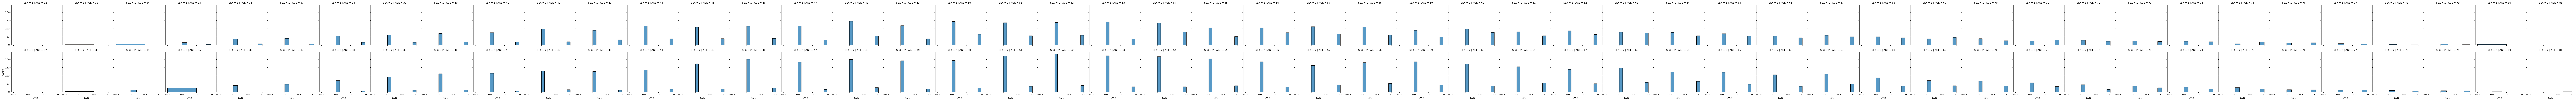

In [ ]:
plt.figure(figsize=(12,7))
g = sns.FacetGrid(df_fhs3,row = 'SEX', col = 'AGE')
g.map(sns.histplot, "CVD")
plt.show()

<Figure size 1200x700 with 0 Axes>

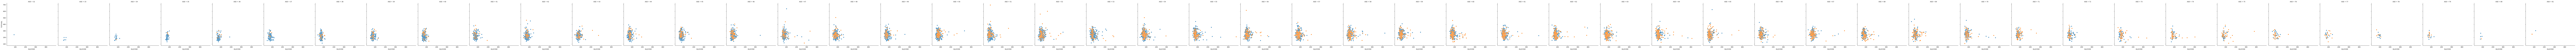

In [ ]:
plt.figure(figsize=(12,7))
g = sns.FacetGrid(df_fhs3,hue = 'CVD',col = 'AGE', height = 5)
g.map(sns.scatterplot, "GLUCOSE","TOTCHOL")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


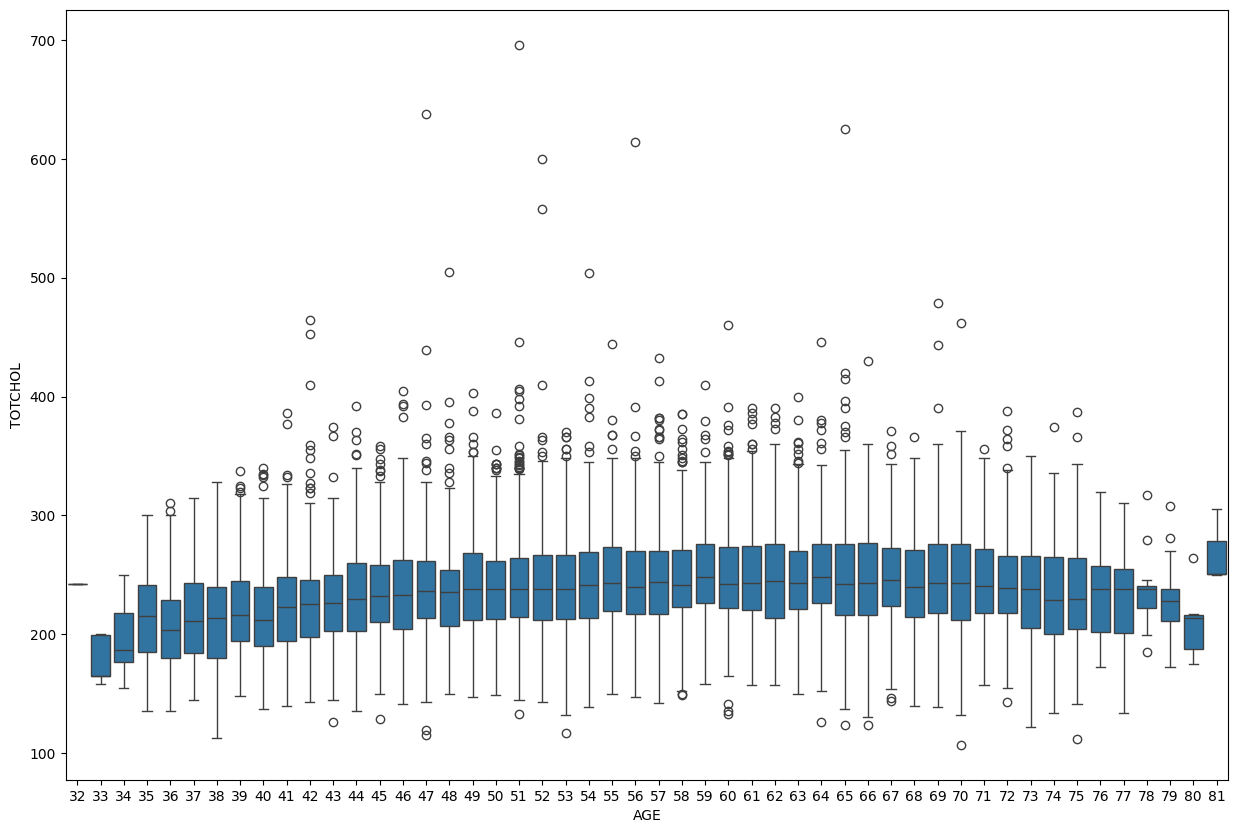

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_fhs3,x="AGE",y="TOTCHOL",ax=ax)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

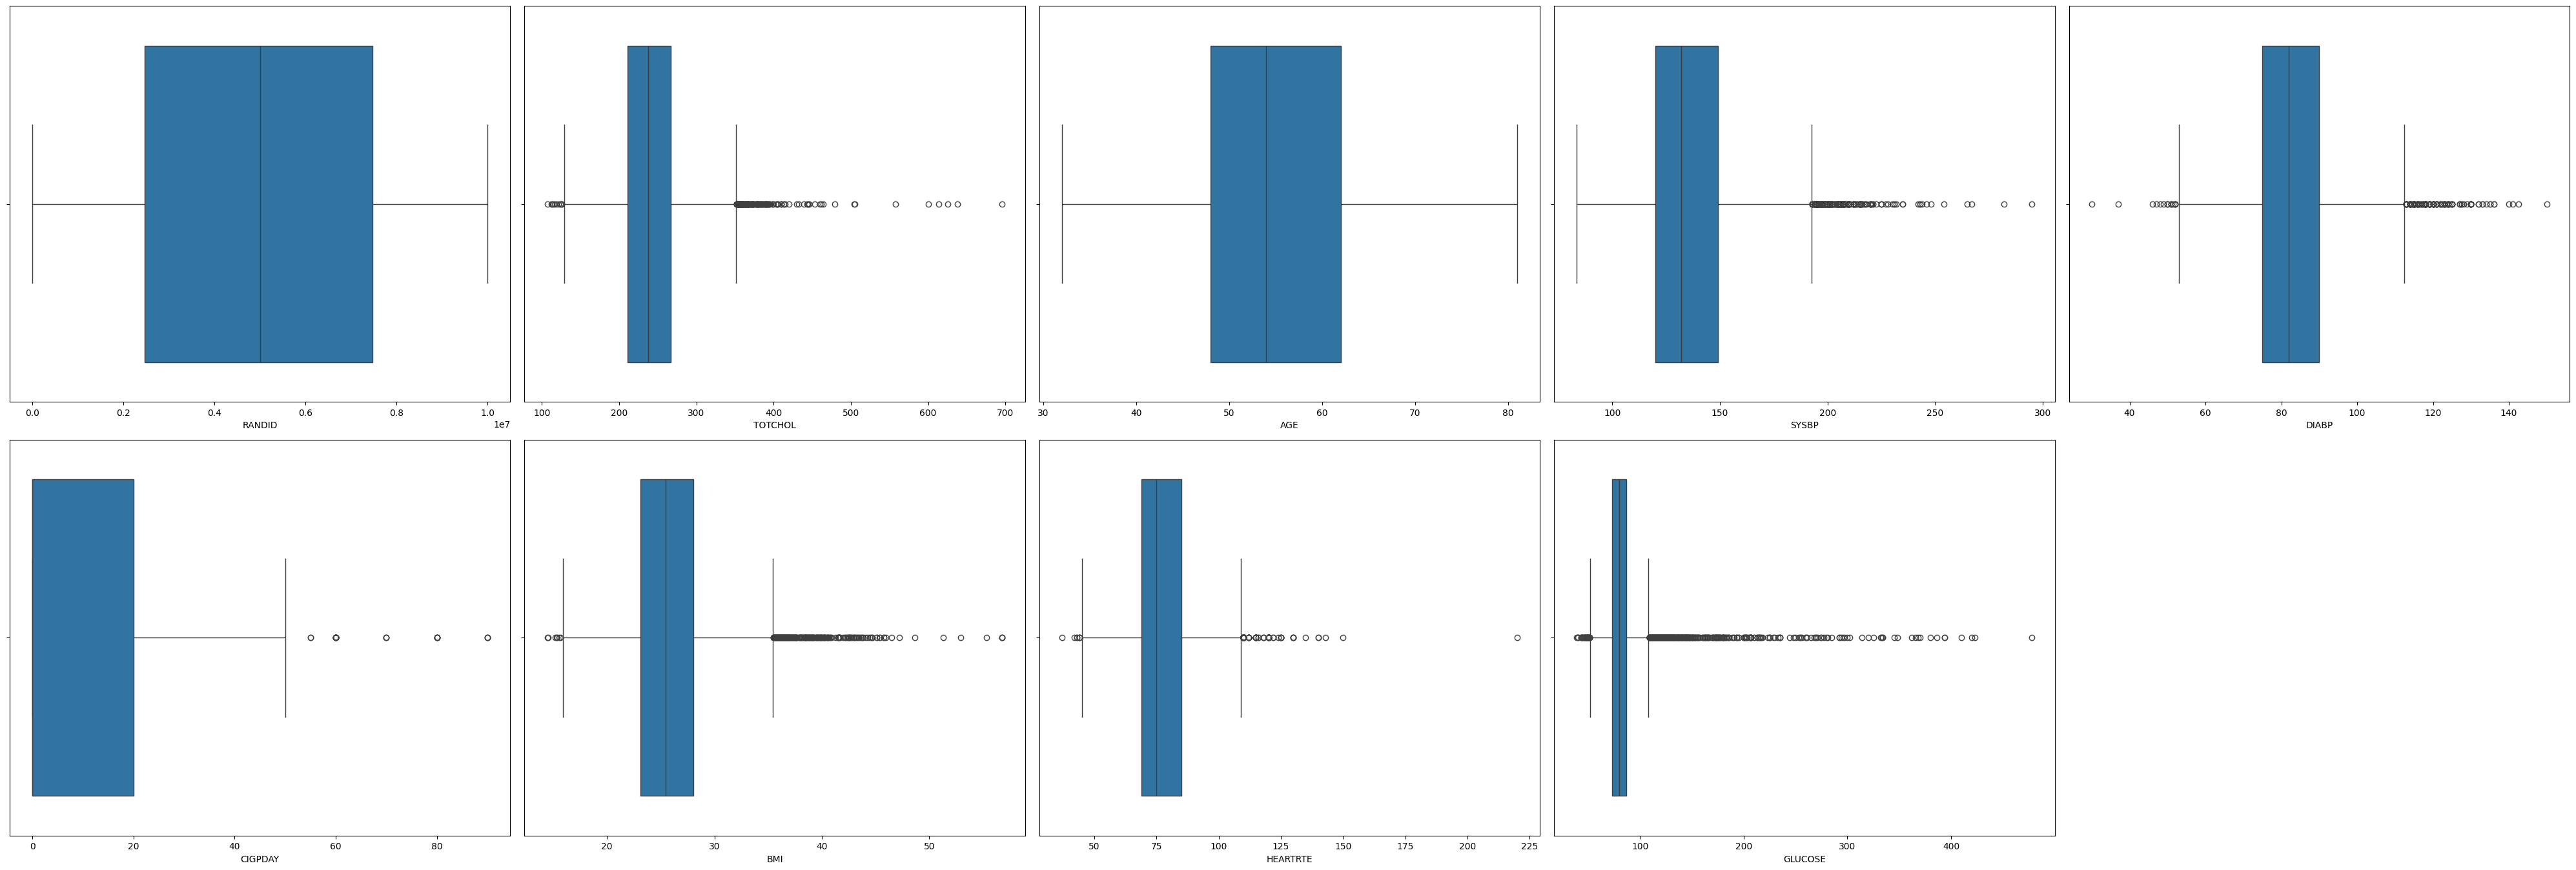

In [ ]:
plt.figure(figsize = (40,40))
for i in enumerate(fhs_cont.columns):
  plt.subplot(6,5,i[0]+1)
  sns.boxplot(x=i[1],data=fhs_cont)
plt.tight_layout()

WE CAN SEE OUTLIER HEREE we will handle it later


#Generate Machine Learning Model

In [ ]:
#Distribution In target Variable
df_fhs3['CVD'].value_counts()

CVD
0    8728
1    2899
Name: count, dtype: int64

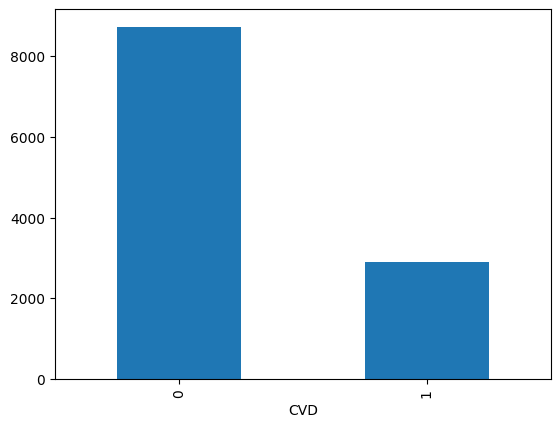

In [ ]:
#Visualize the distribution in target variable barchart
df_fhs3['CVD'].value_counts().plot(kind='bar')
plt.show()

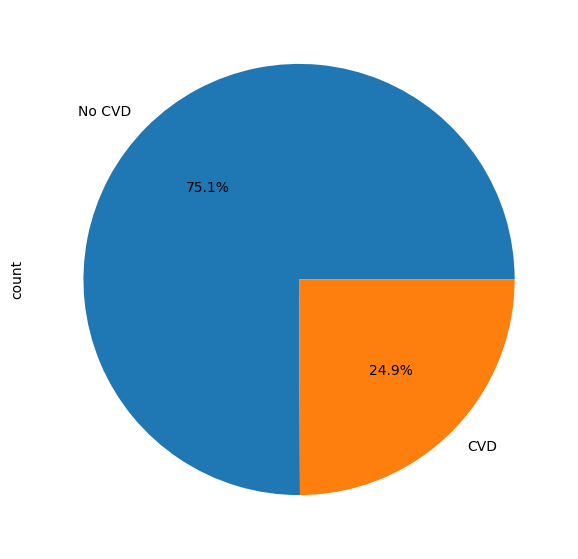

In [ ]:
#visualize the distribution in target variable - piechart
plt.figure(figsize=(10,7))
df_fhs3['CVD'].value_counts().plot(kind='pie',autopct = '%1.1f%%',labels = ['No CVD','CVD'])
plt.show()

#Separating Data

In [ ]:
print(df_fhs3.columns.tolist())

['SEX', 'RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN']


In [ ]:
#separate array into input x and output y
X = df_fhs3.drop(columns=['CVD', 'RANDID'])
y = df_fhs3['CVD']
print(X.shape,y.shape)
X.info()

(11627, 23) (11627,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  int64  
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  int64  
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  int64  
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  int64  
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11621 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  PREVCHD   11627 non-null  int64  
 13  PREVAP    11627 non-null  int64  
 14  PREVMI    11627 non-null  int64  
 15  PREVSTRK  11627 non-null  int64  
 16  PREVHYP   11627 non-null  int64  
 17  ANGINA    11627 non-null  int64  
 18  HOSPMI    11627 non-null  int64  
 19  MI_FCHD   11627 non-null  int64  
 20  ANYCHD 

#Nan value handling

In [ ]:
#As we know SMOTE doesnt work on NAN value
rows_with_nans = df_fhs3[df_fhs3.isna().any(axis=1)]
print(rows_with_nans)

       SEX   RANDID  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY  BMI  \
1299     2  1080920      193   70    168    70.         0      0.0  25.   
1434     2  1186959      238   73    200    100         1      2.0  36.   
1847     1  1557925      219   64    172    75.         1      18.  29.   
2630     2  2235925      238   77    202    95.         0      0.0  25.   
3500     2  3029122      238   71    124    80.         1      0.0  25.   
10250    2  8878837      172   76    148    90.         1      0.0  25.   

       DIABETES  ...  PREVMI  PREVSTRK  PREVHYP  ANGINA  HOSPMI  MI_FCHD  \
1299          1  ...       1         1        1       0       0        1   
1434          0  ...       0         0        1       0       0        0   
1847          0  ...       0         0        1       0       1        1   
2630          0  ...       0         0        1       1       0        0   
3500          0  ...       0         0        0       0       0        0   
10250         1  .

In [ ]:
df_fhs3.isnull().sum()

SEX         0
RANDID      0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    6
GLUCOSE     0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
dtype: int64

In [ ]:
print("NaN values in x:")
print(X.isna().sum())

# Check for NaNs in y
print("NaN values in y:")
print(y.isna().sum())

NaN values in x:
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    6
GLUCOSE     0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
HYPERTEN    0
dtype: int64
NaN values in y:
0


In [ ]:
#Droping Nan colunm
X = X.dropna()
y = y[X.index]
print(X.shape,y.shape)
print(y[:5])

(11621, 23) (11621,)
0    1
1    1
2    0
3    0
4    0
Name: CVD, dtype: int64


#Outlier handling

In [ ]:
from sklearn.ensemble import IsolationForest


# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(X)

# Filter outliers
x_filtered = X[outliers == 1]
y_filtered = y[outliers == 1]

# Display the shapes of x_filtered and y_filtered to confirm
print("Shape of x_filtered:", x_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)

Shape of x_filtered: (10459, 23)
Shape of y_filtered: (10459,)


# Dataset Distribution Check

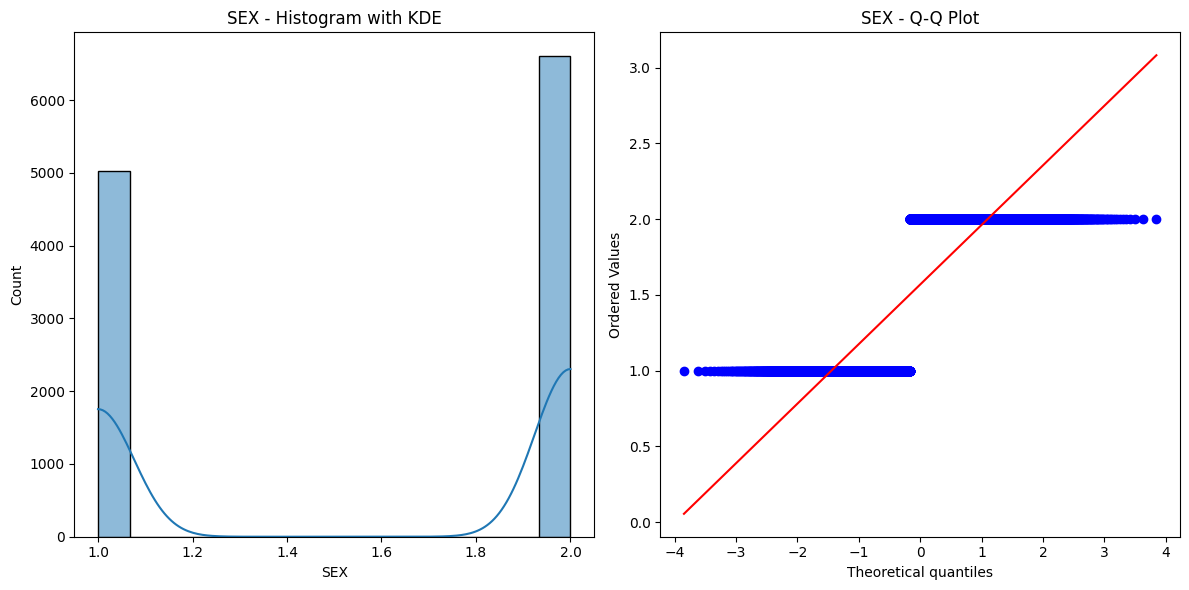


SEX is binary. Checking for Bernoulli distribution.
Proportion of 1's in SEX: 1.5679373547887445
Binomial test p-value: nan
The binary data for SEX is likely NOT following a Bernoulli distribution (reject H0).


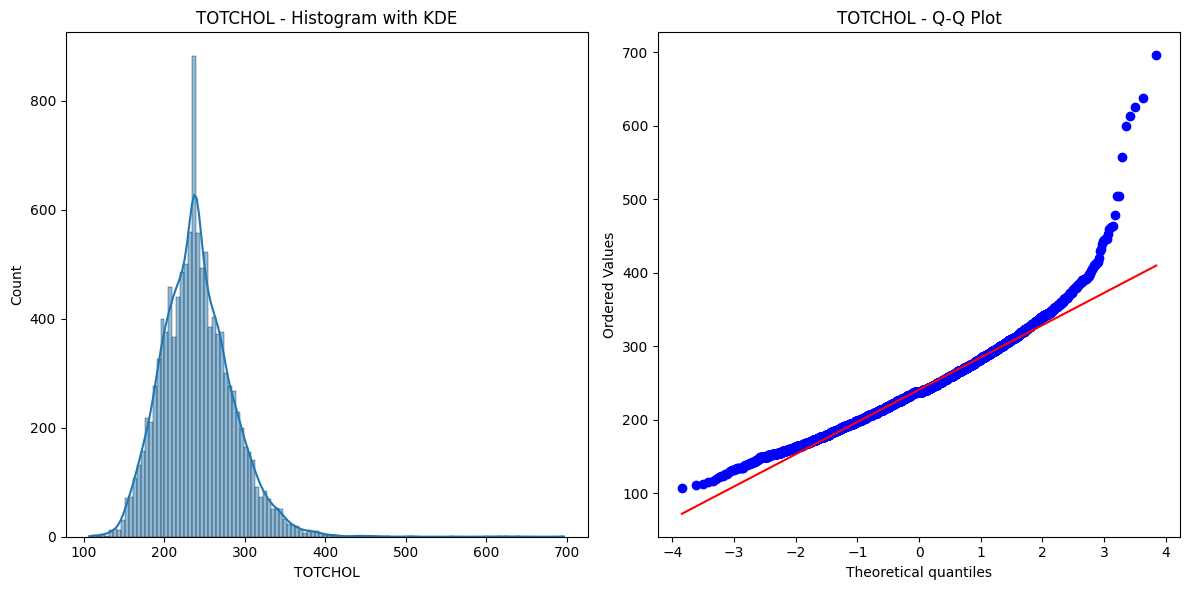


TOTCHOL is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 5.268854240250518e-44
The data for TOTCHOL is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 0.0
The data for TOTCHOL is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=37.605691444734475, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=241.0639359779709, scale=44.57085049563617)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for TOTCHOL is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for TOTCHOL is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for TOTCHOL is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for TOTCHOL is likely NOT normally distributed (reject H0) at significa

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


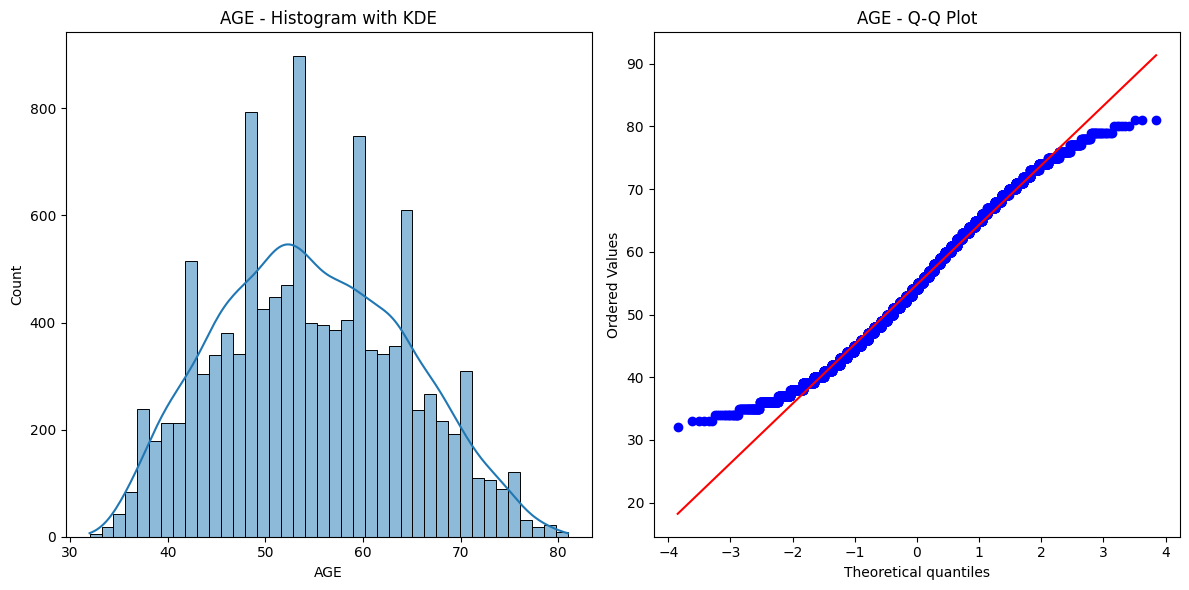


AGE is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 3.1135380011692024e-29
The data for AGE is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 4.990637717685018e-118
The data for AGE is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=29.60932234368738, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=54.78401170295155, scale=9.558425599760781)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for AGE is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for AGE is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for AGE is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for AGE is likely NOT normally distributed (reject H0) at significance level

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


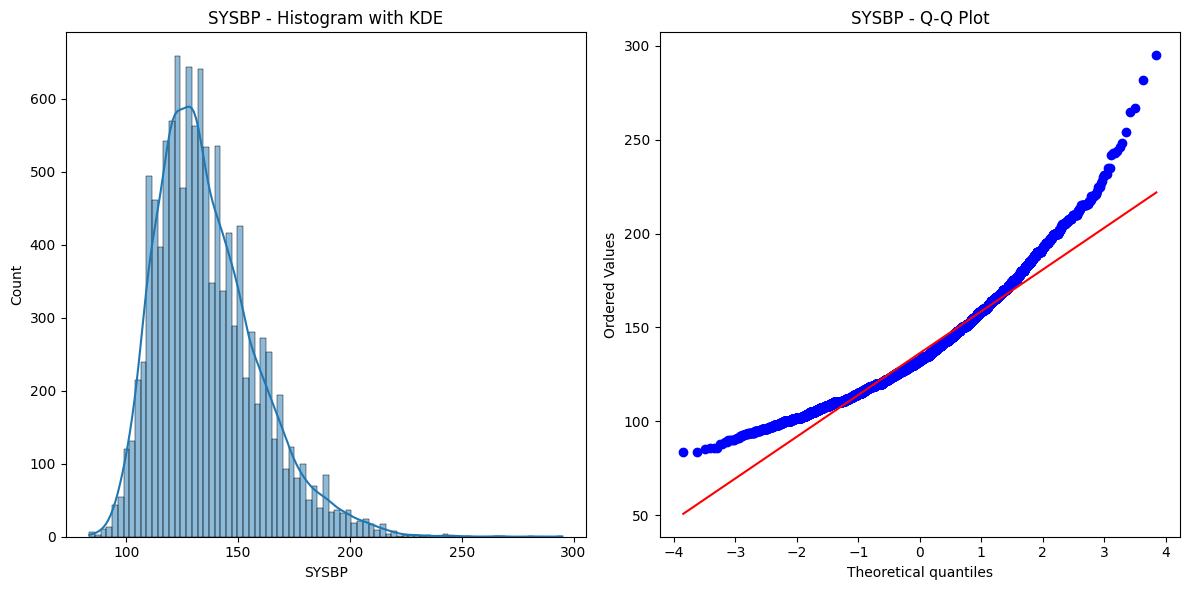


SYSBP is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 4.098224333659266e-51
The data for SYSBP is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 0.0
The data for SYSBP is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=124.83073234384938, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=136.3071594527149, scale=22.78367425955178)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for SYSBP is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for SYSBP is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for SYSBP is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for SYSBP is likely NOT normally distributed (reject H0) at significance level 2.5%

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


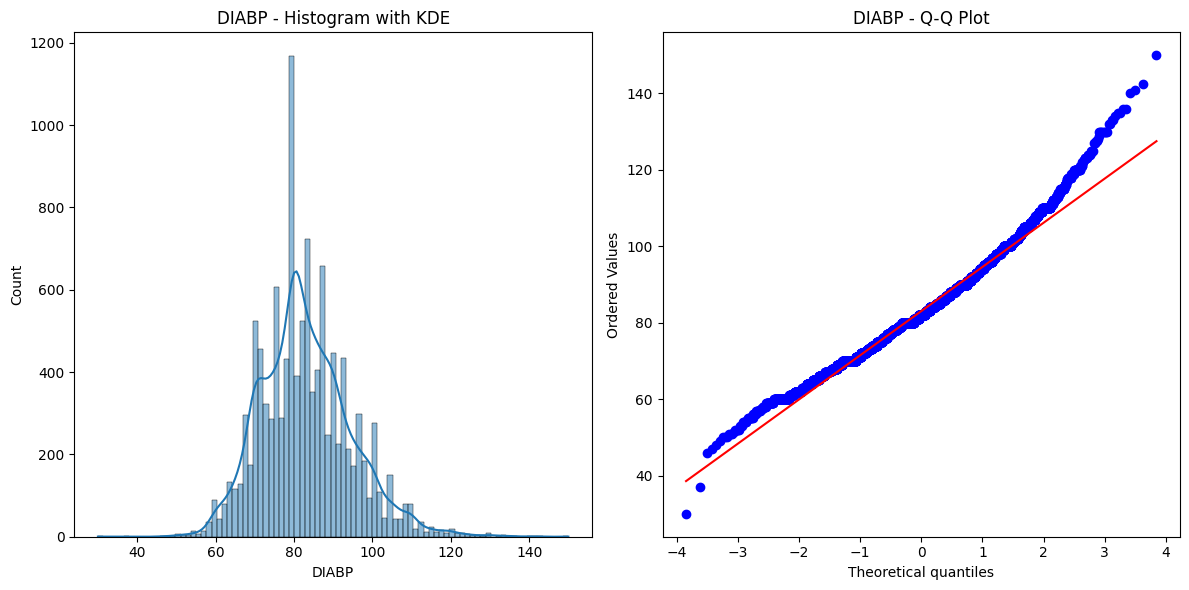


DIABP is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 2.1134433750801168e-35
The data for DIABP is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 2.6125100425643467e-157
The data for DIABP is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=42.90453857511966, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=83.03670080027537, scale=11.66044107887572)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for DIABP is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for DIABP is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for DIABP is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for DIABP is likely NOT normally distributed (reject H0) at sig

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


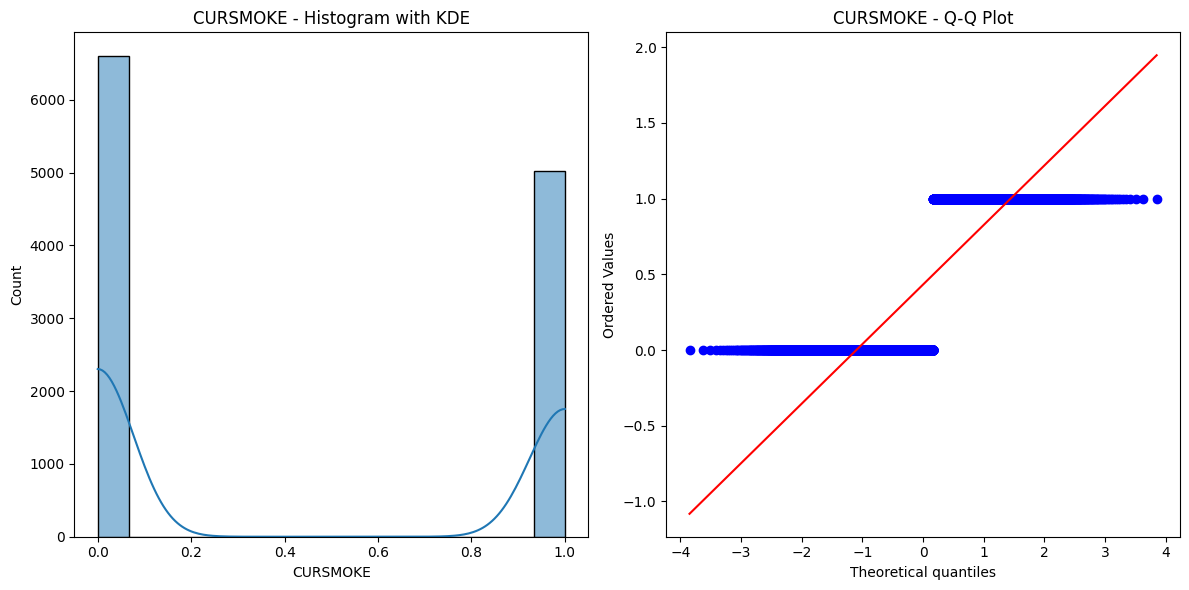


CURSMOKE is binary. Checking for Bernoulli distribution.
Proportion of 1's in CURSMOKE: 0.4324068496687032
Binomial test p-value: 1.007133299343968
The binary data for CURSMOKE is likely following a Bernoulli distribution (fail to reject H0).


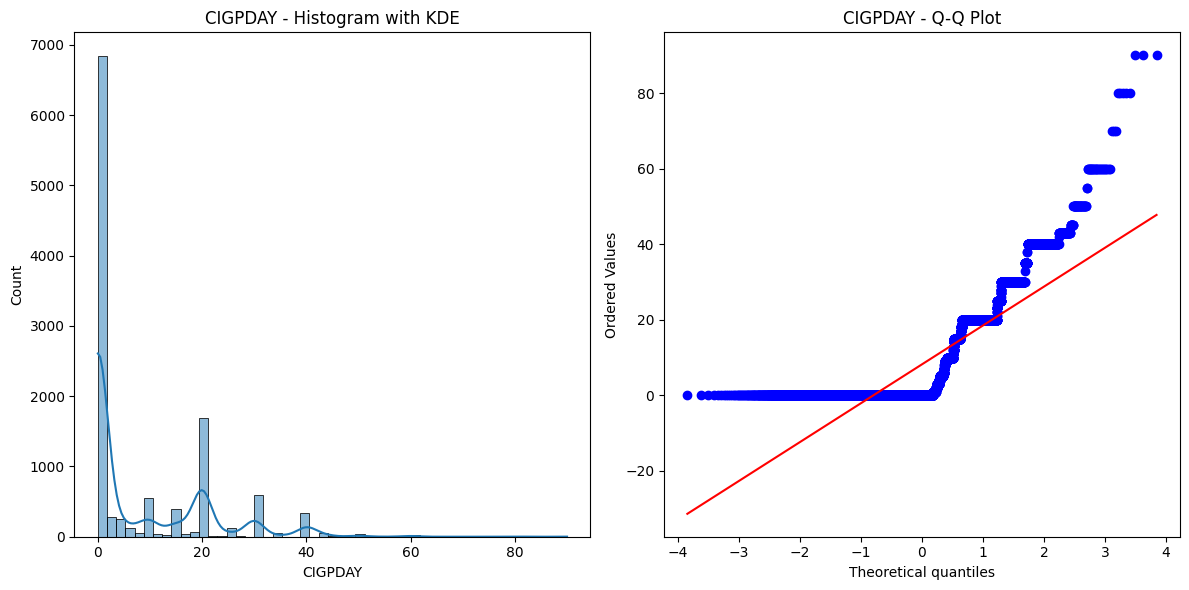


CIGPDAY is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 3.908705723811301e-88
The data for CIGPDAY is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 0.0
The data for CIGPDAY is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=1387.1099320920166, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.196798898545737, scale=12.16602348533334)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for CIGPDAY is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for CIGPDAY is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for CIGPDAY is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for CIGPDAY is likely NOT normally distributed (reject H0) at significa

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


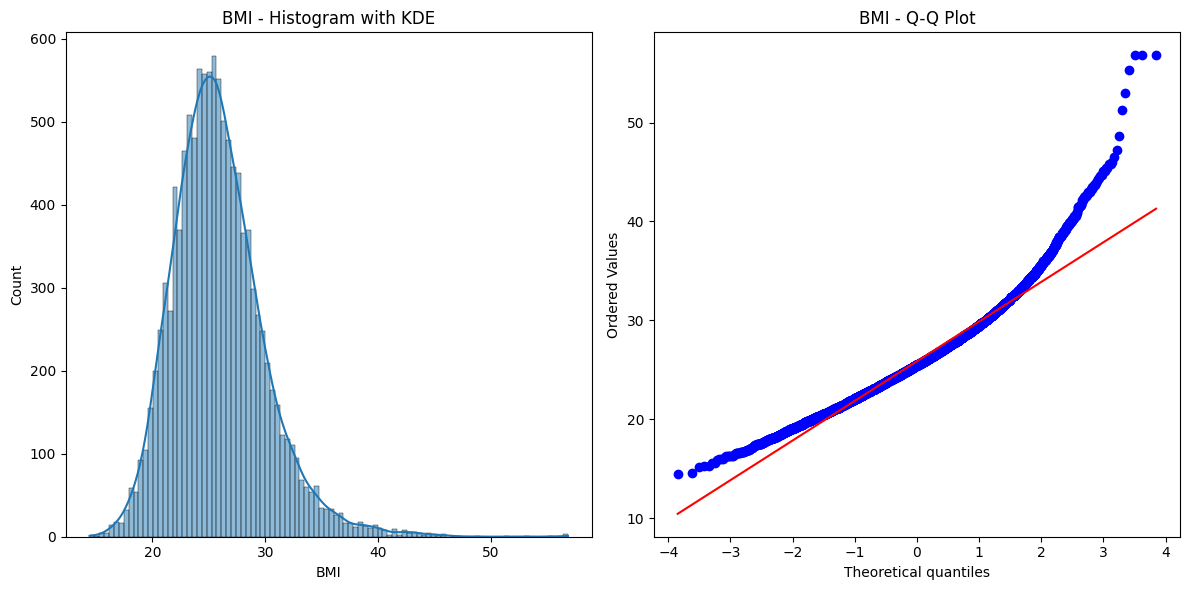


BMI is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 2.8650680711555504e-49
The data for BMI is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 0.0
The data for BMI is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=73.09468030386597, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=25.874497031236558, scale=4.093274875571327)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for BMI is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for BMI is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for BMI is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for BMI is likely NOT normally distributed (reject H0) at significance level 2.5%.
The data fo

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


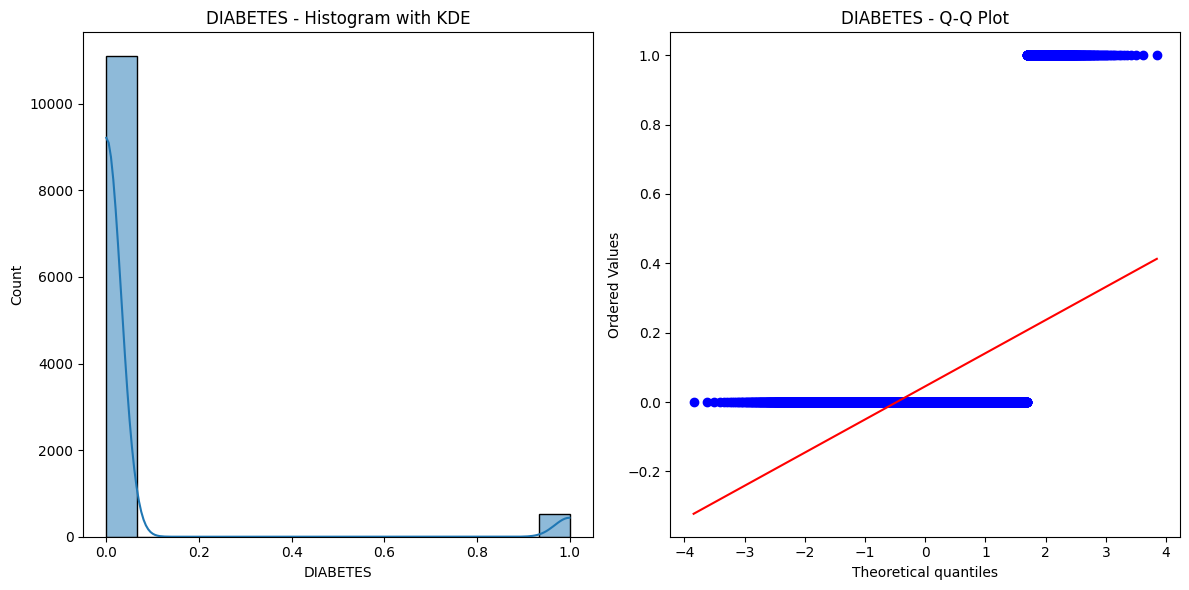


DIABETES is binary. Checking for Bernoulli distribution.
Proportion of 1's in DIABETES: 0.04543498838309956
Binomial test p-value: 1.0123849843538446
The binary data for DIABETES is likely following a Bernoulli distribution (fail to reject H0).


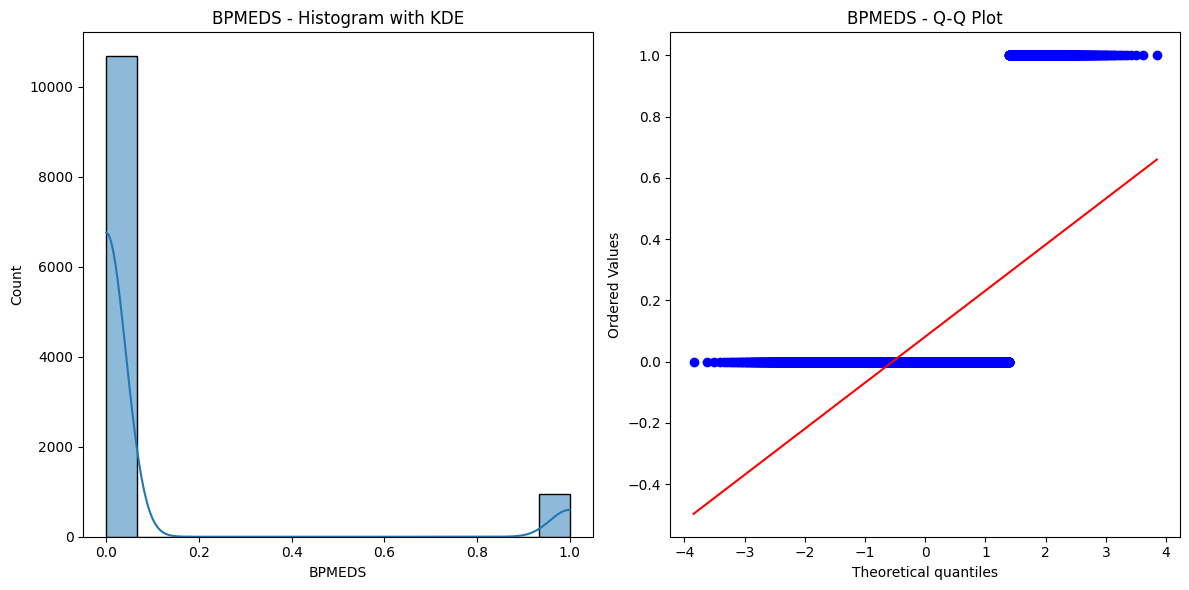


BPMEDS is binary. Checking for Bernoulli distribution.
Proportion of 1's in BPMEDS: 0.08114620084330092
Binomial test p-value: 1.0097683526129384
The binary data for BPMEDS is likely following a Bernoulli distribution (fail to reject H0).


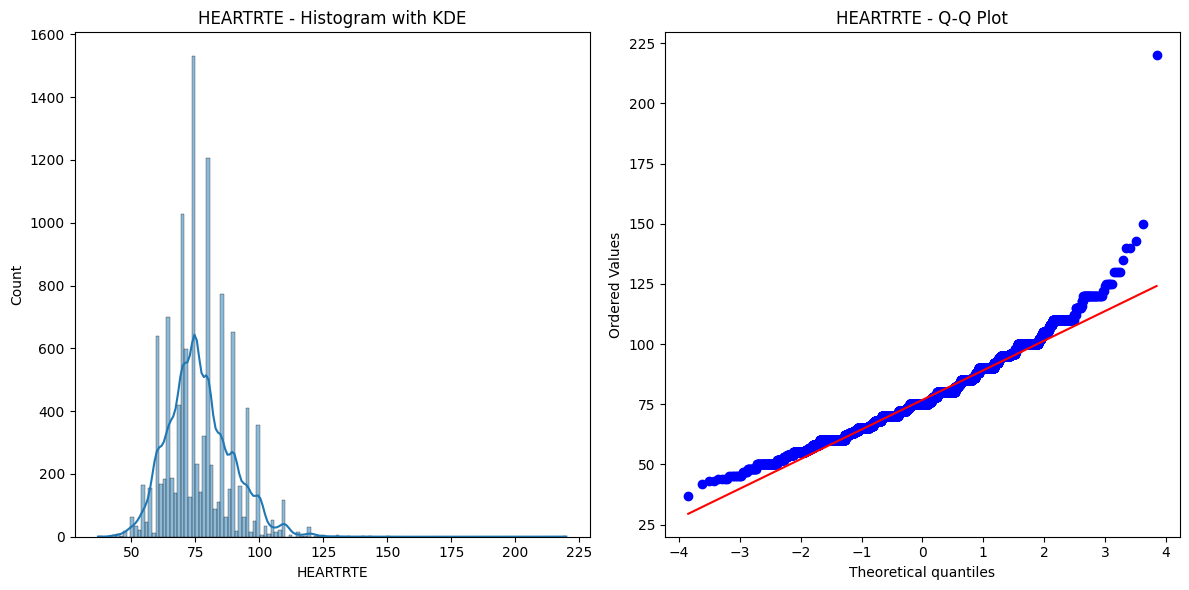


HEARTRTE is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 1.45194445787905e-41
The data for HEARTRTE is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 2.214204721669439e-283
The data for HEARTRTE is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=71.45268783992469, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=76.78151622063505, scale=12.463358584335802)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for HEARTRTE is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for HEARTRTE is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for HEARTRTE is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for HEARTRTE is likely NOT normally distributed

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


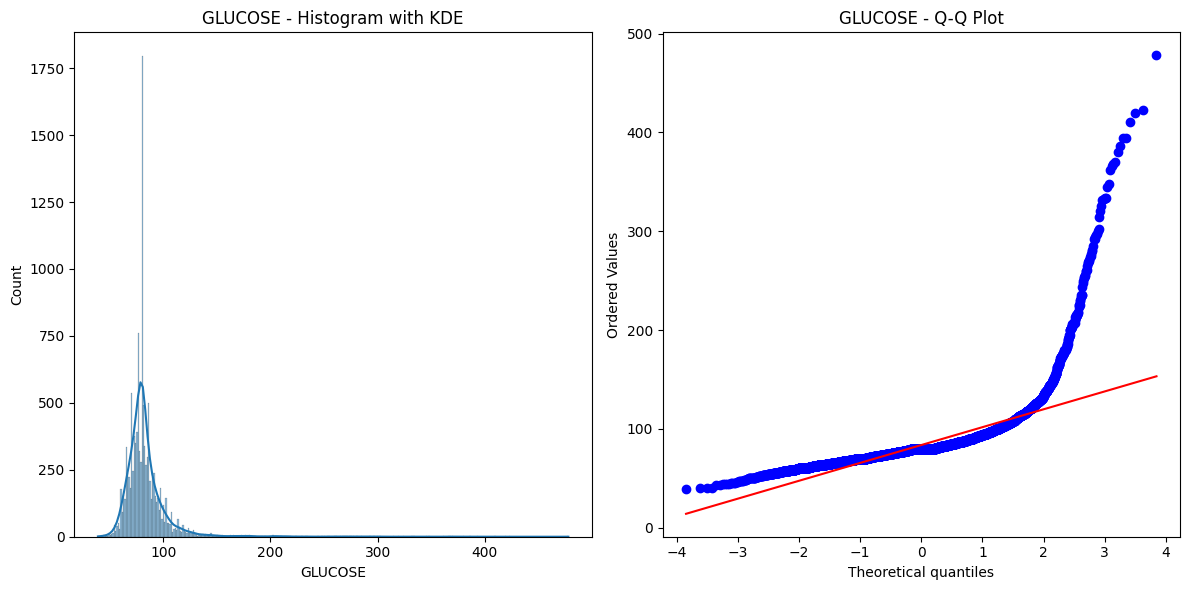


GLUCOSE is numeric. Checking for normality.
Shapiro-Wilk Test: p-value = 2.280876454989646e-96
The data for GLUCOSE is likely NOT normally distributed (reject H0).
D'Agostino and Pearson's Test: p-value = 0.0
The data for GLUCOSE is likely NOT normally distributed (reject H0).
Anderson-Darling Test: AndersonResult(statistic=905.4552782944484, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=83.61492126323036, scale=23.44002081824612)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The data for GLUCOSE is likely NOT normally distributed (reject H0) at significance level 15.0%.
The data for GLUCOSE is likely NOT normally distributed (reject H0) at significance level 10.0%.
The data for GLUCOSE is likely NOT normally distributed (reject H0) at significance level 5.0%.
The data for GLUCOSE is likely NOT normally distributed (reject H0) at significan

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11621.
  res = hypotest_fun_out(*samples, **kwds)


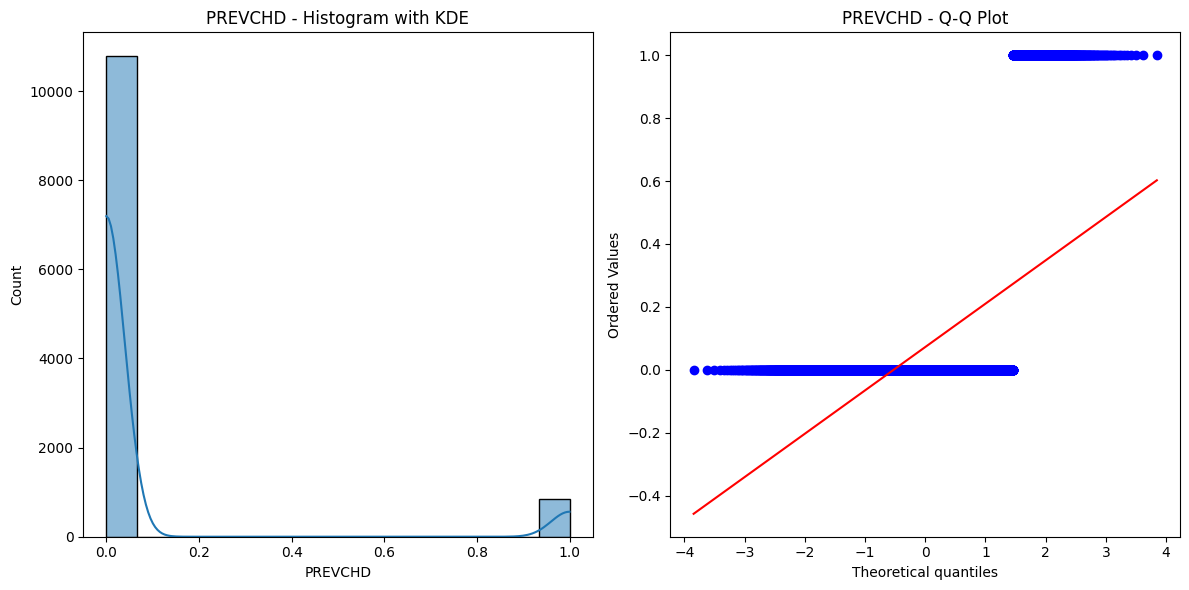


PREVCHD is binary. Checking for Bernoulli distribution.
Proportion of 1's in PREVCHD: 0.07236898717838396
Binomial test p-value: 1.0102111564833995
The binary data for PREVCHD is likely following a Bernoulli distribution (fail to reject H0).


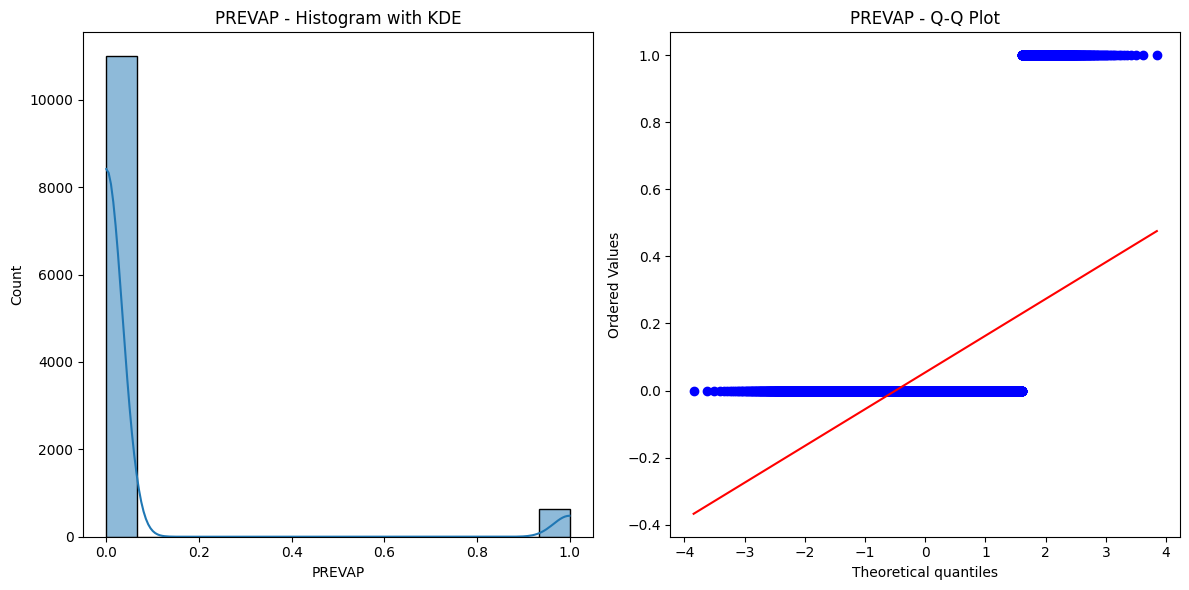


PREVAP is binary. Checking for Bernoulli distribution.
Proportion of 1's in PREVAP: 0.05395404870493073
Binomial test p-value: 1.0115093070821612
The binary data for PREVAP is likely following a Bernoulli distribution (fail to reject H0).


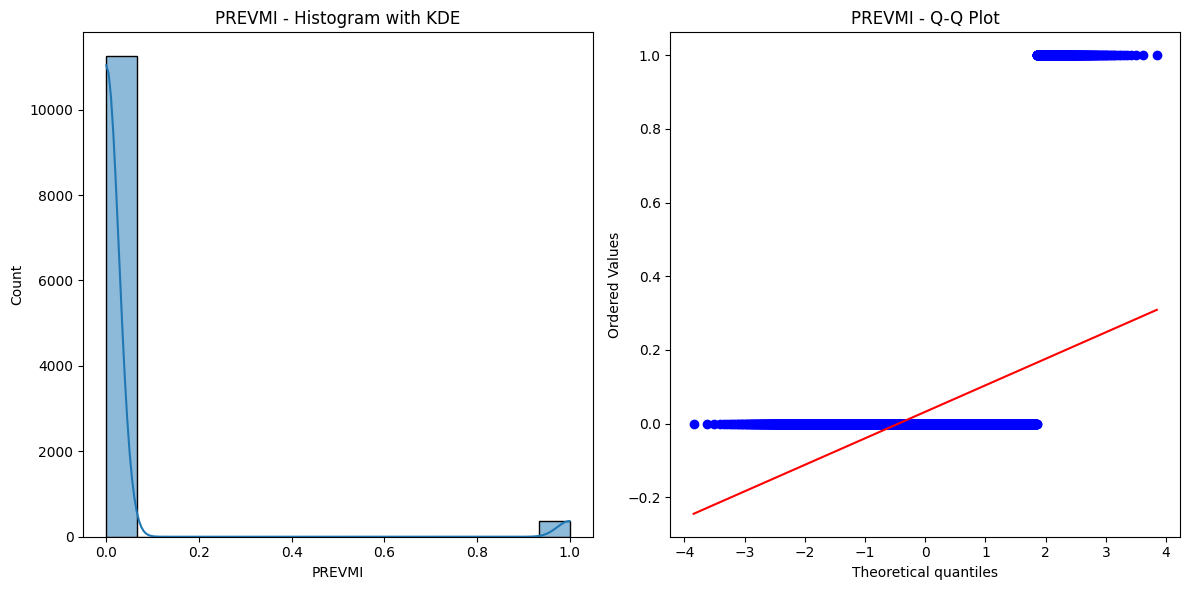


PREVMI is binary. Checking for Bernoulli distribution.
Proportion of 1's in PREVMI: 0.03209706565700026
Binomial test p-value: 1.014446755470051
The binary data for PREVMI is likely following a Bernoulli distribution (fail to reject H0).


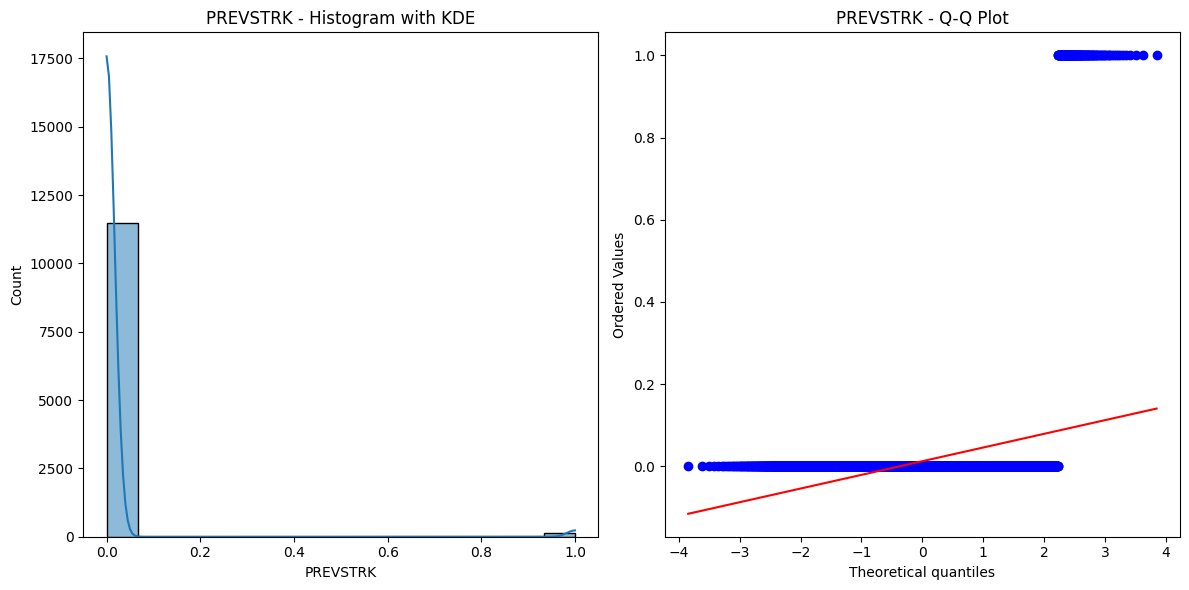


PREVSTRK is binary. Checking for Bernoulli distribution.
Proportion of 1's in PREVSTRK: 0.012907667154289648
Binomial test p-value: 1.0221398641809687
The binary data for PREVSTRK is likely following a Bernoulli distribution (fail to reject H0).


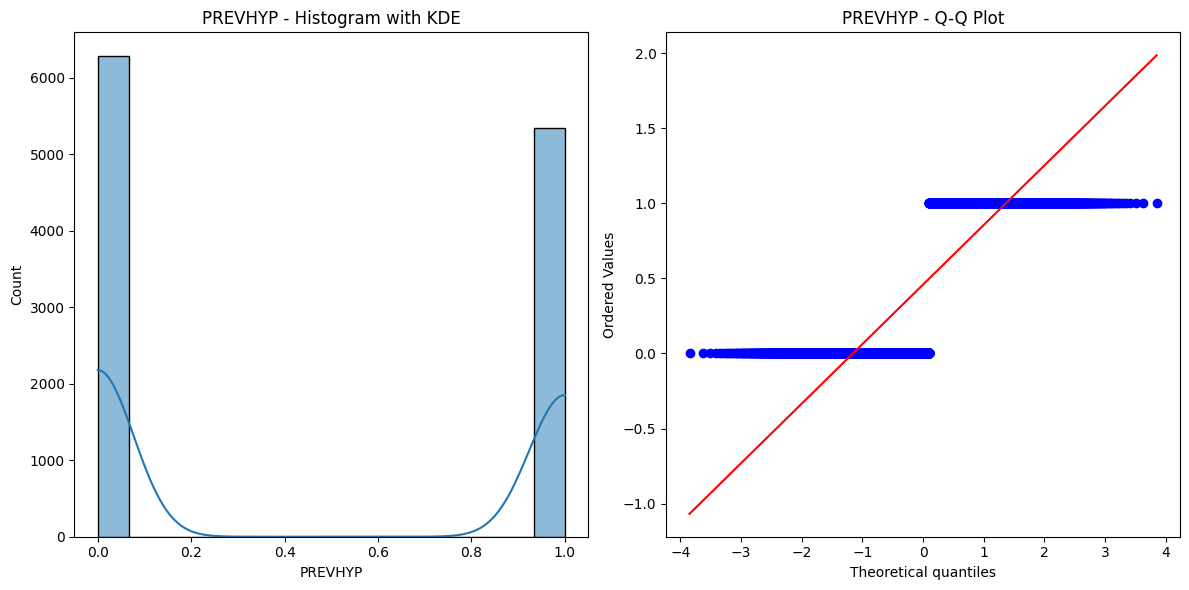


PREVHYP is binary. Checking for Bernoulli distribution.
Proportion of 1's in PREVHYP: 0.45942689957834953
Binomial test p-value: 1.0072249590217432
The binary data for PREVHYP is likely following a Bernoulli distribution (fail to reject H0).


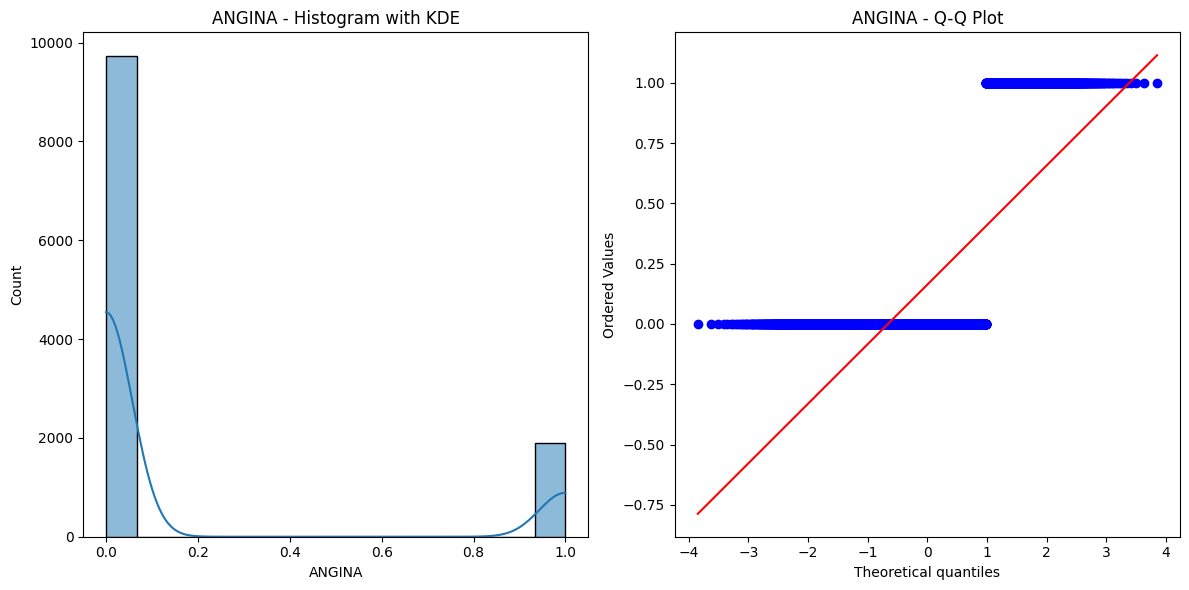


ANGINA is binary. Checking for Bernoulli distribution.
Proportion of 1's in ANGINA: 0.1635831684020308
Binomial test p-value: 1.0077608474745423
The binary data for ANGINA is likely following a Bernoulli distribution (fail to reject H0).


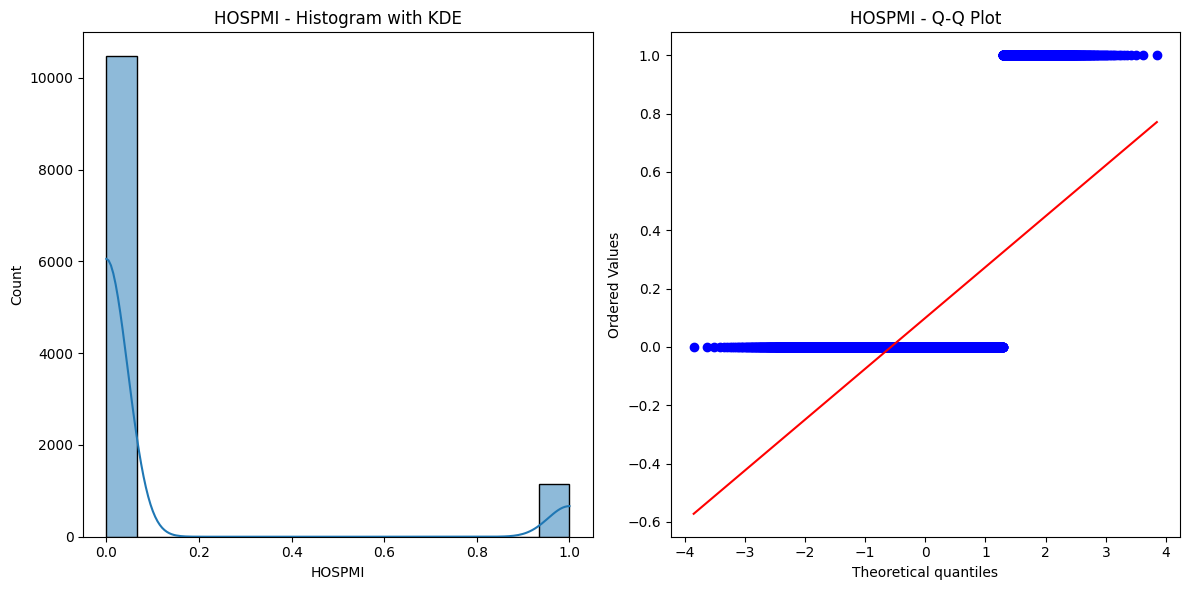


HOSPMI is binary. Checking for Bernoulli distribution.
Proportion of 1's in HOSPMI: 0.09921693485930642
Binomial test p-value: 1.0090713941595217
The binary data for HOSPMI is likely following a Bernoulli distribution (fail to reject H0).


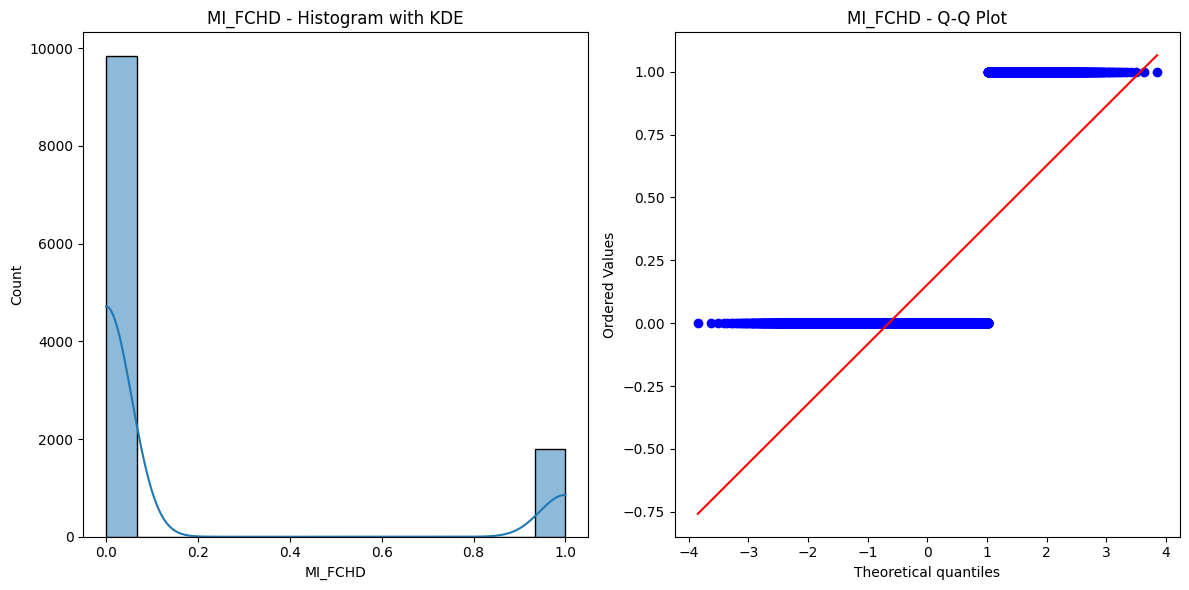


MI_FCHD is binary. Checking for Bernoulli distribution.
Proportion of 1's in MI_FCHD: 0.15368729025040875
Binomial test p-value: 1.0078921668068839
The binary data for MI_FCHD is likely following a Bernoulli distribution (fail to reject H0).


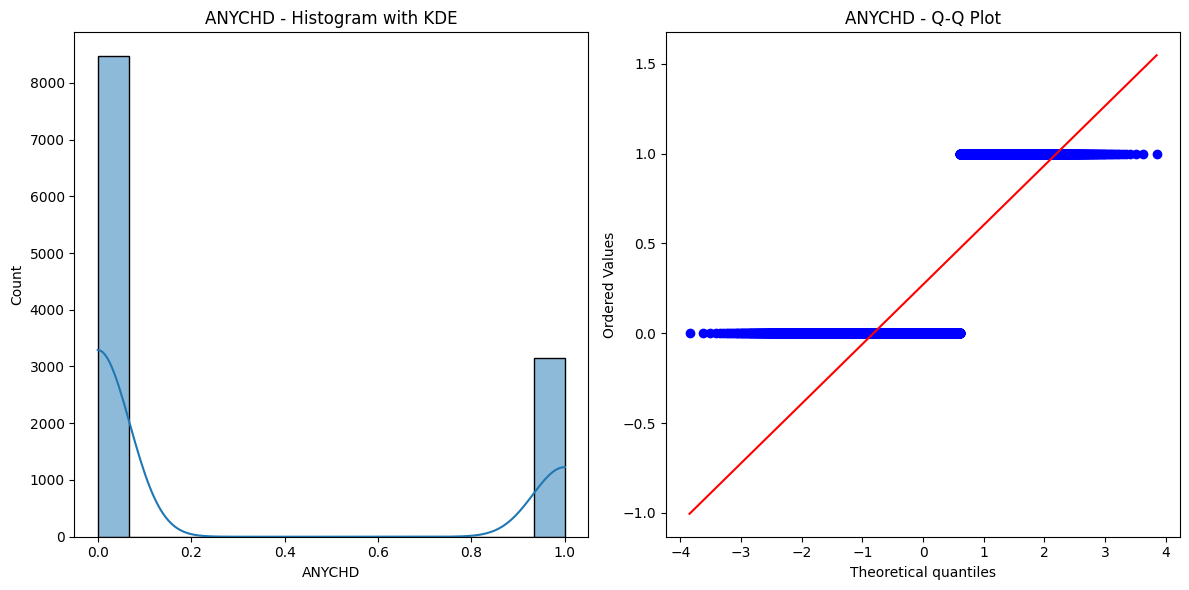


ANYCHD is binary. Checking for Bernoulli distribution.
Proportion of 1's in ANYCHD: 0.27149126581189226
Binomial test p-value: 1.007053572372885
The binary data for ANYCHD is likely following a Bernoulli distribution (fail to reject H0).


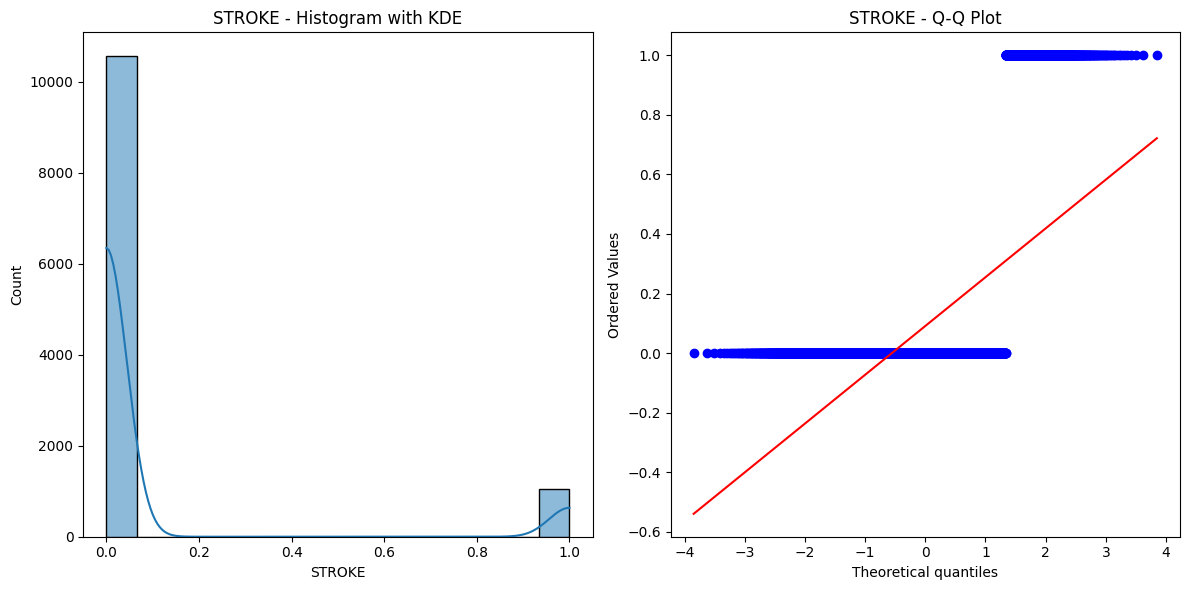


STROKE is binary. Checking for Bernoulli distribution.
Proportion of 1's in STROKE: 0.09104207899492299
Binomial test p-value: 1.0093571243200627
The binary data for STROKE is likely following a Bernoulli distribution (fail to reject H0).


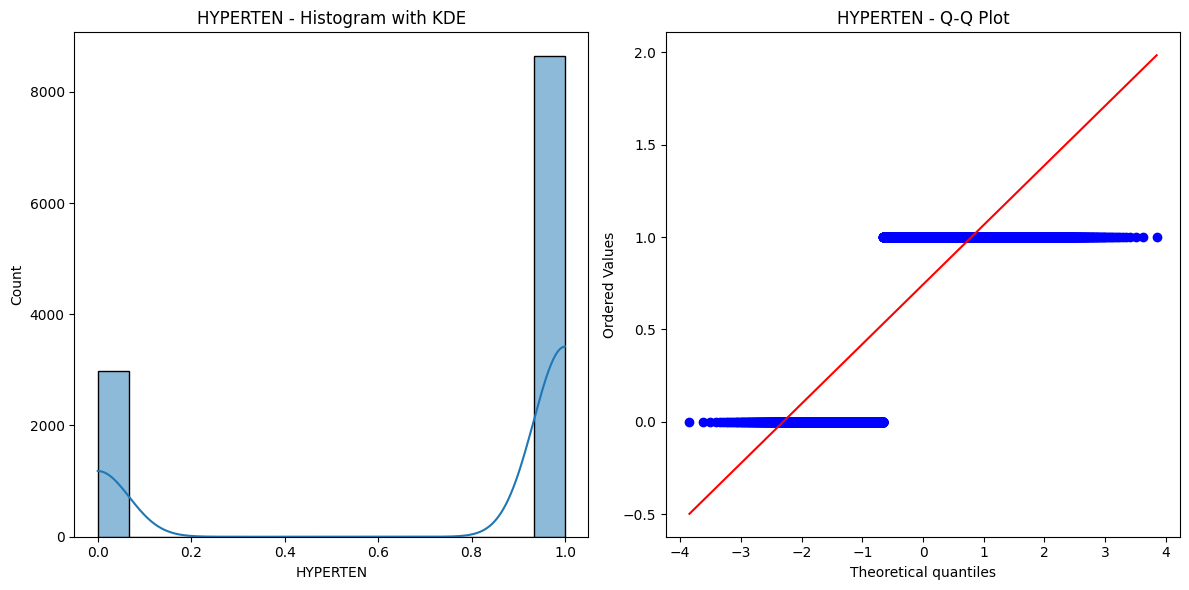


HYPERTEN is binary. Checking for Bernoulli distribution.
Proportion of 1's in HYPERTEN: 0.743223474743998
Binomial test p-value: 1.0070976065974522
The binary data for HYPERTEN is likely following a Bernoulli distribution (fail to reject H0).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, binom
from scipy import stats

# Step 1: Load the CSV file into a pandas DataFrame
data = X  # Replace with your dataset variable

# Step 2: Function to check normality and Bernoulli distribution
def check_distribution(column_name, column_data):
    # Step 3: Visualize the distribution using a histogram and Q-Q plot
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(column_data, kde=True)
    plt.title(f'{column_name} - Histogram with KDE')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(column_data, dist="norm", plot=plt)
    plt.title(f'{column_name} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

    # Step 4: Perform statistical tests for normality or Bernoulli distribution

    # For Binary Data (Bernoulli Distribution)
    if column_data.nunique() == 2:
        print(f"\n{column_name} is binary. Checking for Bernoulli distribution.")

        # Check for Bernoulli distribution using mean (probability of 1) and binomial test
        p = column_data.mean()  # Proportion of 1's
        print(f"Proportion of 1's in {column_name}: {p}")

        # Number of successes (1's) and total number of trials (samples)
        successes = column_data.sum()  # Sum gives the count of 1's
        trials = len(column_data)

        # Binomial test using scipy.stats.binom.cdf
        # The null hypothesis: the probability of success is equal to p
        binomial_p = 2 * min(
            binom.cdf(successes, trials, p),  # Left tail
            1 - binom.cdf(successes - 1, trials, p)  # Right tail
        )

        print(f"Binomial test p-value: {binomial_p}")

        if binomial_p > 0.05:
            print(f"The binary data for {column_name} is likely following a Bernoulli distribution (fail to reject H0).")
        else:
            print(f"The binary data for {column_name} is likely NOT following a Bernoulli distribution (reject H0).")

    # For Numeric Data (Normal Distribution)
    elif np.issubdtype(column_data.dtype, np.number):  # Numeric data
        print(f"\n{column_name} is numeric. Checking for normality.")

        # 4.1 Shapiro-Wilk test (good for small to medium sample sizes)
        shapiro_stat, shapiro_p = shapiro(column_data.dropna())  # dropna() to ignore missing values
        print(f"Shapiro-Wilk Test: p-value = {shapiro_p}")
        if shapiro_p > 0.05:
            print(f"The data for {column_name} is likely normally distributed (fail to reject H0).")
        else:
            print(f"The data for {column_name} is likely NOT normally distributed (reject H0).")

        # 4.2 D'Agostino and Pearson's Test (good for larger sample sizes)
        dagostino_stat, dagostino_p = normaltest(column_data.dropna())
        print(f"D'Agostino and Pearson's Test: p-value = {dagostino_p}")
        if dagostino_p > 0.05:
            print(f"The data for {column_name} is likely normally distributed (fail to reject H0).")
        else:
            print(f"The data for {column_name} is likely NOT normally distributed (reject H0).")

        # 4.3 Anderson-Darling test (provides more detailed output)
        anderson_result = anderson(column_data.dropna())
        print(f"Anderson-Darling Test: {anderson_result}")
        # Interpreting the result:
        for i in range(len(anderson_result.critical_values)):
            if anderson_result.statistic > anderson_result.critical_values[i]:
                print(f"The data for {column_name} is likely NOT normally distributed (reject H0) at significance level {anderson_result.significance_level[i]}%.")
            else:
                print(f"The data for {column_name} is likely normally distributed (fail to reject H0) at significance level {anderson_result.significance_level[i]}%.")

    else:
        print(f"{column_name} is neither binary nor numeric. Skipping.")

# Step 3: Loop through columns and check their distribution
for column_name in data.columns:
    column_data = data[column_name]

    # Check if the column is binary or numeric
    if column_data.nunique() == 2:  # Binary data
        check_distribution(column_name, column_data)
    elif np.issubdtype(column_data.dtype, np.number):  # Numeric data
        check_distribution(column_name, column_data)
    else:
        print(f"{column_name} is neither binary nor numeric. Skipping.")


#The Synthetic Minority Oversampling(SMOTE)

In [ ]:
#load the SMOTE module
from imblearn.over_sampling import SMOTE
#create test and train and SMOTE the x matrices
os = SMOTE(random_state=0)
X_os,y_os=os.fit_resample(x_filtered,y_filtered)

In [ ]:
X_os.shape,y_os.shape

((16958, 23), (16958,))

In [ ]:
y_os.value_counts(normalize = True)

CVD
1   0.5
0   0.5
Name: proportion, dtype: float64

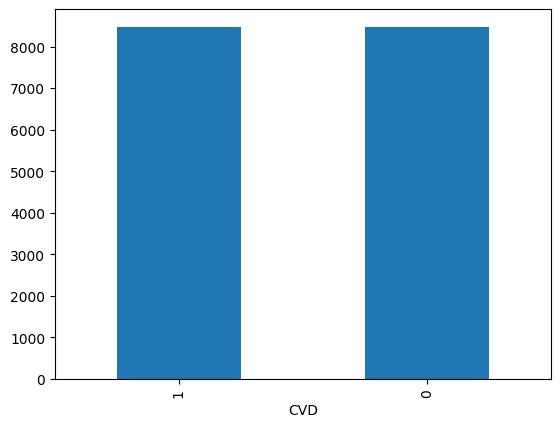

In [ ]:
y_os.value_counts().plot(kind = 'bar')
plt.show()

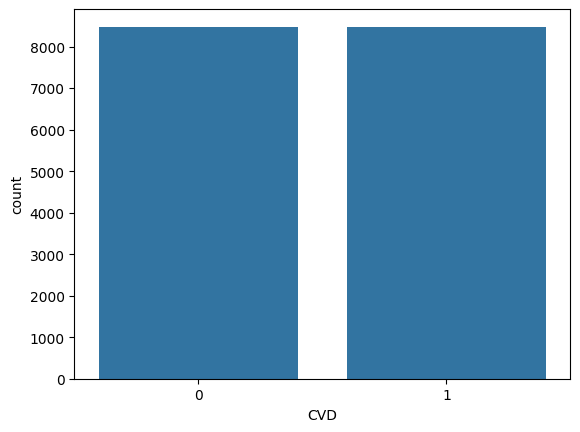

In [ ]:
sns.countplot(x=y_os)
plt.show()

In [ ]:
df_os = pd.DataFrame(X_os)
df_os['CVD']=y_os

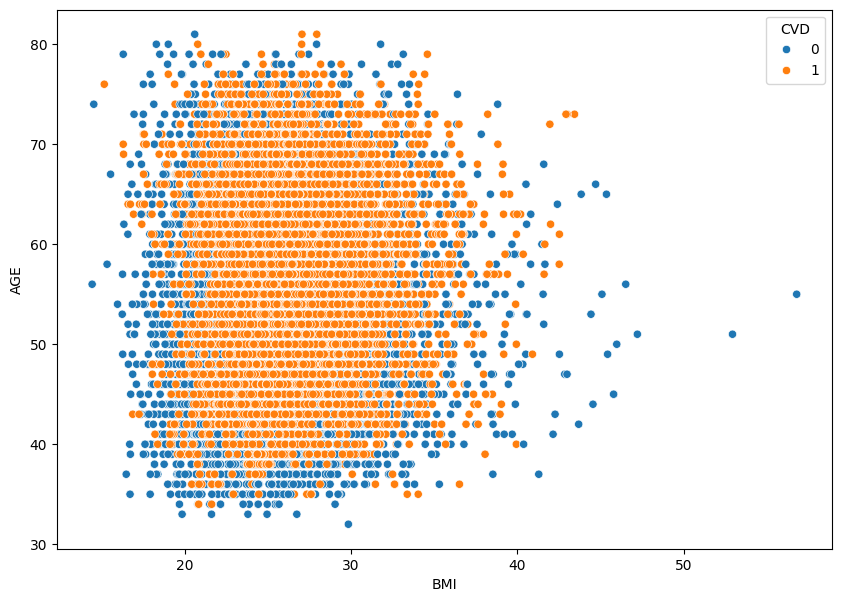

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_os,x='BMI',y='AGE',hue = 'CVD')
plt.show()

#train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_os,y_os, test_size = .3, random_state=42)


In [ ]:
print(X_train.nunique()) #to see all the colunm unique value count

SEX            2
TOTCHOL     4567
AGE           50
SYSBP       4635
DIABP       4436
CURSMOKE       2
CIGPDAY     1768
BMI         6159
DIABETES       2
BPMEDS       723
HEARTRTE    4097
GLUCOSE     4351
PREVCHD        2
PREVAP         2
PREVMI         2
PREVSTRK       2
PREVHYP        2
ANGINA         2
HOSPMI         2
MI_FCHD        2
ANYCHD         2
STROKE         2
HYPERTEN       2
dtype: int64


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#ML MODELS BY ALL FEATURES

Confusion Matrix:
[[86  7]
 [22 85]]
Accuracy: 0.8550
Log Loss: 5.2263
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        93
           1       0.92      0.79      0.85       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200

Precision-Recall AUC: 0.9142
ROC AUC: 0.8596


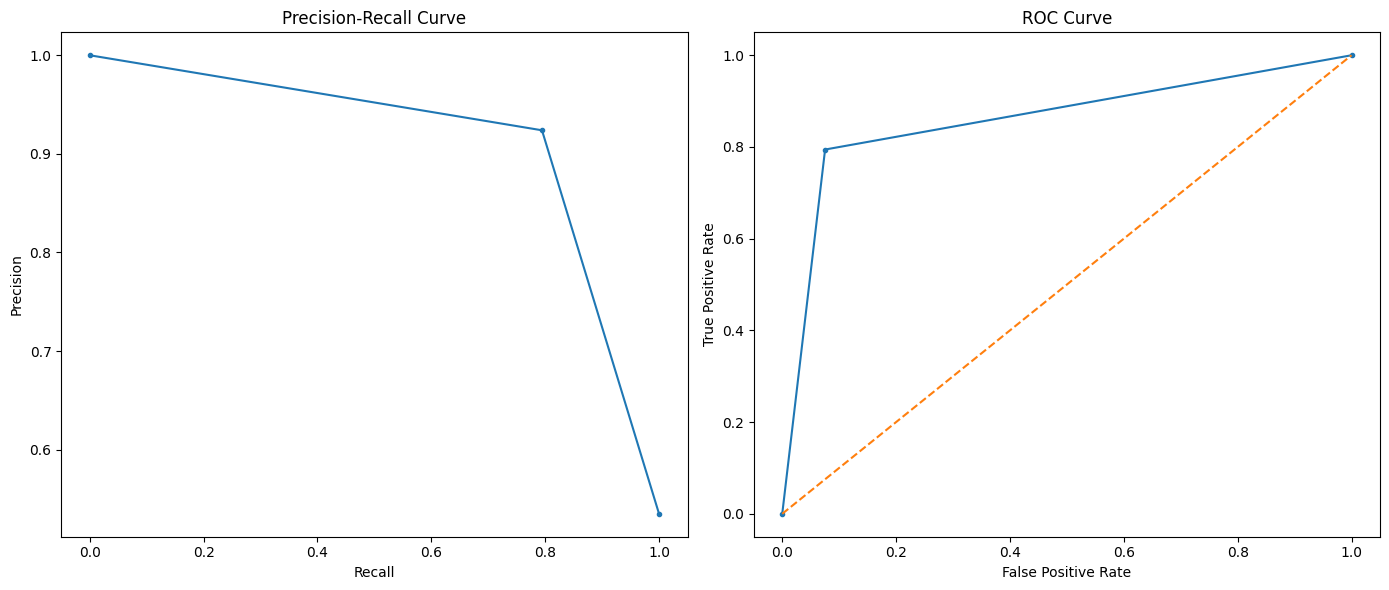

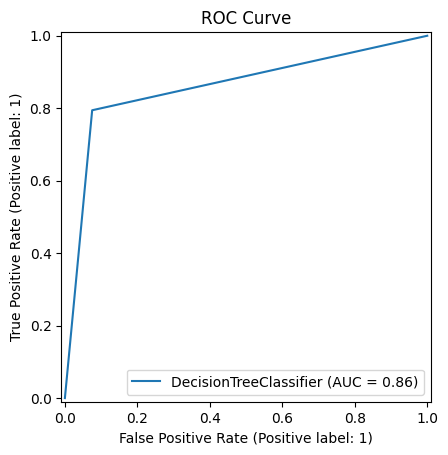

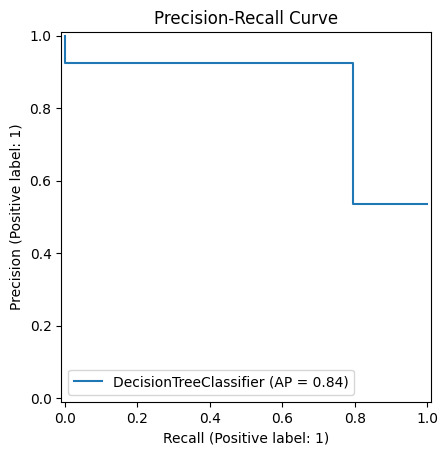

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (confusion_matrix, accuracy_score,
                             log_loss, precision_recall_curve,
                             roc_curve, auc, classification_report,
                             RocCurveDisplay, PrecisionRecallDisplay)

# Training Decision Tree Classifier with entropy
DC = DecisionTreeClassifier(criterion='entropy', random_state=0)
DC.fit(X_train, y_train)

# Predict on test data
y_pred = DC.predict(X_test)

# Get prediction probabilities for log loss and curves
y_prob = DC.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.tight_layout()
plt.show()

# Display ROC and Precision-Recall curves using built-in functions
RocCurveDisplay.from_estimator(DC, X_test, y_test)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_estimator(DC, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()


Decision Tree using GINI:
Accuracy: 0.8550
Log Loss: 5.2263
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        93
           1       0.90      0.82      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Precision-Recall AUC: 0.9077
ROC AUC: 0.8575


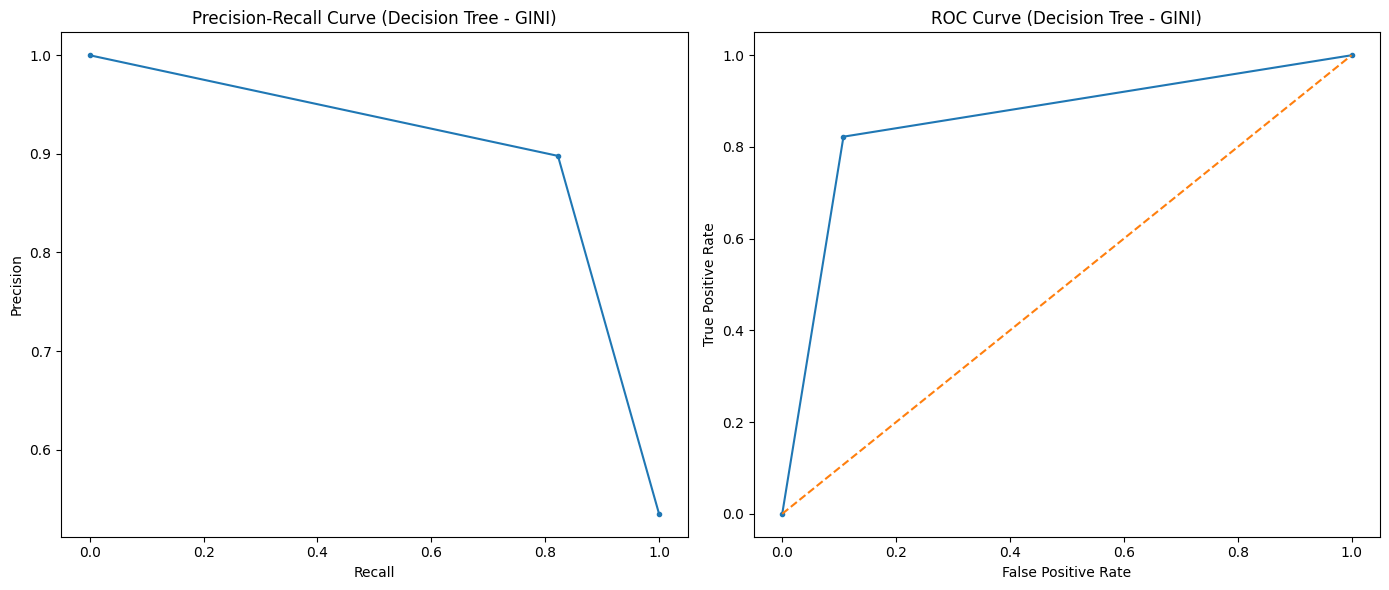

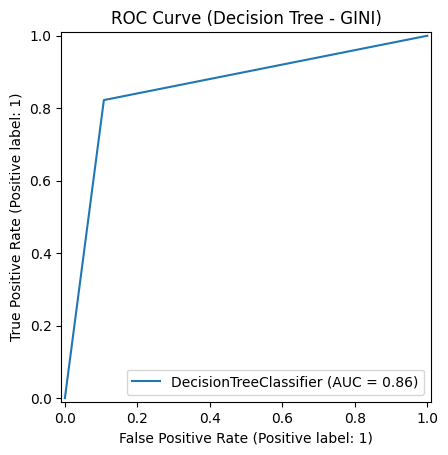

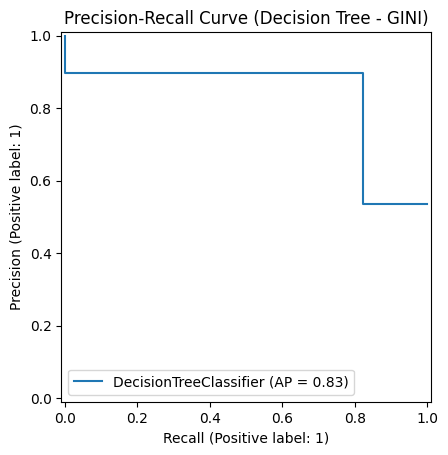

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Train the model
DC2 = DecisionTreeClassifier(criterion='gini', random_state=0)
DC2.fit(X_train, y_train)

# Predict on test set
y_pred_dt_gini = DC2.predict(X_test)
y_prob_dt_gini = DC2.predict_proba(X_test)

# Evaluate the model
print("Decision Tree using GINI:")
accuracy_dt_gini = accuracy_score(y_test, y_pred_dt_gini)
print(f"Accuracy: {accuracy_dt_gini:.4f}")

# Calculate Log Loss
logloss_dt_gini = log_loss(y_test, y_prob_dt_gini)
print(f"Log Loss: {logloss_dt_gini:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt_gini))

# Precision-Recall Curve
precision_dt_gini, recall_dt_gini, _ = precision_recall_curve(y_test, y_prob_dt_gini[:, 1])
pr_auc_dt_gini = auc(recall_dt_gini, precision_dt_gini)
print(f"Precision-Recall AUC: {pr_auc_dt_gini:.4f}")

# ROC Curve
fpr_dt_gini, tpr_dt_gini, _ = roc_curve(y_test, y_prob_dt_gini[:, 1])
roc_auc_dt_gini = auc(fpr_dt_gini, tpr_dt_gini)
print(f"ROC AUC: {roc_auc_dt_gini:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(recall_dt_gini, precision_dt_gini, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree - GINI)')

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_dt_gini, tpr_dt_gini, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree - GINI)')

plt.tight_layout()
plt.show()

# Display ROC and Precision-Recall curves using built-in functions
RocCurveDisplay.from_estimator(DC2, X_test, y_test)
plt.title('ROC Curve (Decision Tree - GINI)')
plt.show()

PrecisionRecallDisplay.from_estimator(DC2, X_test, y_test)
plt.title('Precision-Recall Curve (Decision Tree - GINI)')
plt.show()


Confusion Matrix:
[[84  9]
 [32 75]]
Accuracy: 0.7950
Log Loss: 0.6032
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200

Precision-Recall AUC: 0.9170
ROC AUC: 0.8832


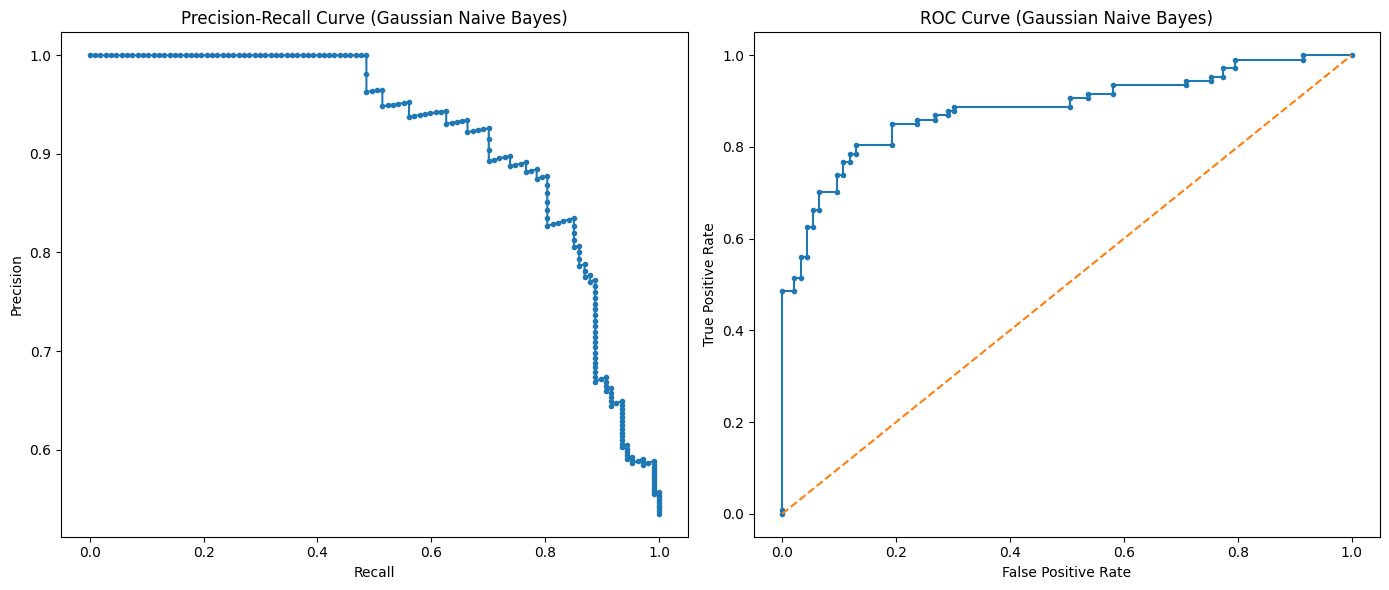

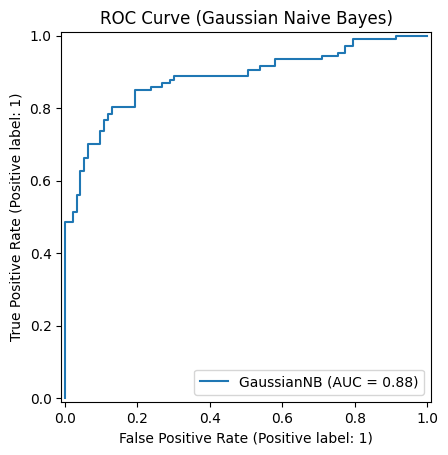

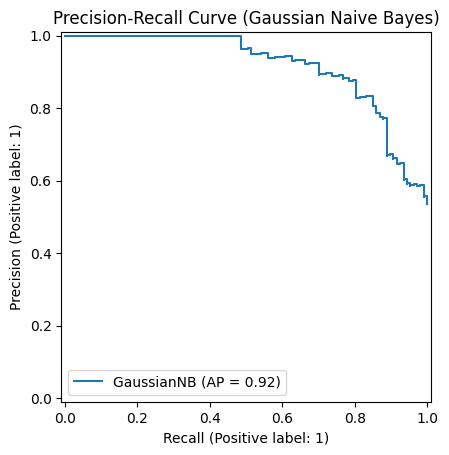

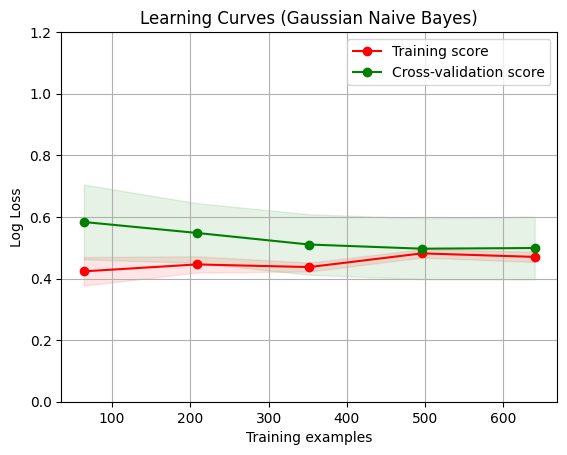

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, log_loss,
                             classification_report, precision_recall_curve,
                             roc_curve, auc)
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to compute log loss for different sizes of training data
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Log Loss")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Train the model
GB = GaussianNB()
GB.fit(X_train, y_train)

# Predict on test set
y_pred = GB.predict(X_test)
y_prob = GB.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gaussian Naive Bayes)')

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gaussian Naive Bayes)')

plt.tight_layout()
plt.show()

# Display ROC Curve using built-in function
RocCurveDisplay.from_estimator(GB, X_test, y_test)
plt.title('ROC Curve (Gaussian Naive Bayes)')
plt.show()

# Display Precision-Recall Curve using built-in function
PrecisionRecallDisplay.from_estimator(GB, X_test, y_test)
plt.title('Precision-Recall Curve (Gaussian Naive Bayes)')
plt.show()

# Plot learning curve
title = "Learning Curves (Gaussian Naive Bayes)"
plot_learning_curve(GB, title, X_train, y_train, ylim=(0, 1.2), cv=5, n_jobs=-1)

plt.show()


Confusion Matrix:
[[83 10]
 [21 86]]
Accuracy: 0.8450
Log Loss: 0.3582
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

Precision-Recall AUC: 0.9399
ROC AUC: 0.9237


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: T

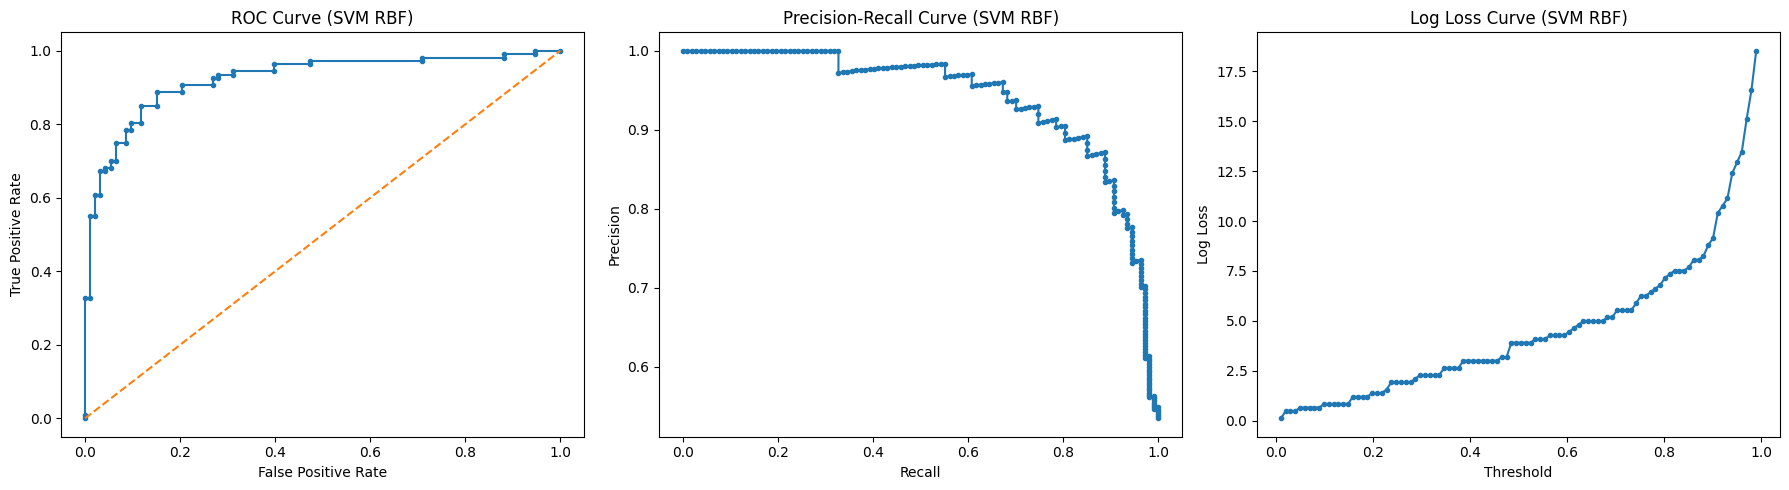

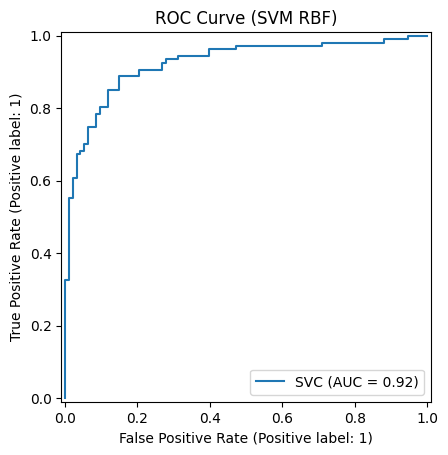

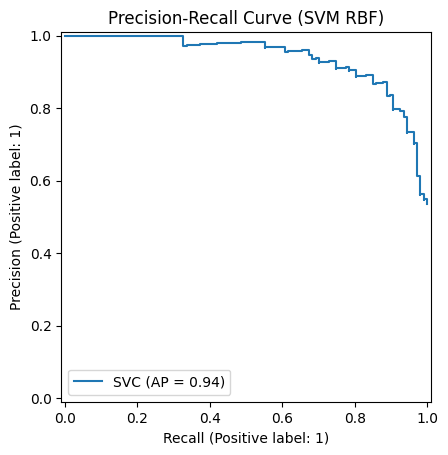

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, log_loss,
                             classification_report, precision_recall_curve,
                             roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)
import matplotlib.pyplot as plt
import numpy as np

# Train the SVM model with RBF kernel
SVC2 = SVC(kernel='rbf', random_state=0, probability=True)
SVC2.fit(X_train, y_train)

# Predict on test set
y_pred = SVC2.predict(X_test)
y_prob = SVC2.predict_proba(X_test)

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Classification Report
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM RBF)')

# Plot Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM RBF)')

# Log Loss Curve
thresholds = np.linspace(0.01, 0.99, 100)
log_losses = [log_loss(y_test, np.column_stack((1-y_prob[:, 1], y_prob[:, 1] > thresh))) for thresh in thresholds]

plt.subplot(1, 3, 3)
plt.plot(thresholds, log_losses, marker='.')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve (SVM RBF)')

plt.tight_layout()
plt.show()

# Display ROC Curve using built-in function
RocCurveDisplay.from_estimator(SVC2, X_test, y_test)
plt.title('ROC Curve (SVM RBF)')
plt.show()

# Display Precision-Recall Curve using built-in function
PrecisionRecallDisplay.from_estimator(SVC2, X_test, y_test)
plt.title('Precision-Recall Curve (SVM RBF)')
plt.show()


Confusion Matrix:
[[85  8]
 [18 89]]
Accuracy: 0.8700
Log Loss: 0.3618
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.92      0.83      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Precision-Recall AUC: 0.9410


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: T

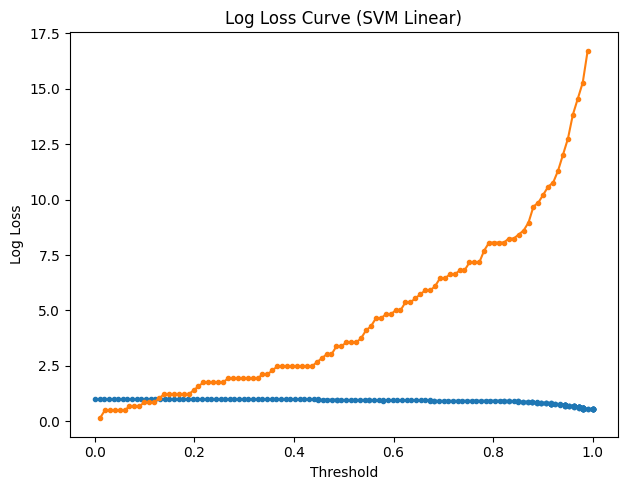

<Figure size 640x480 with 0 Axes>

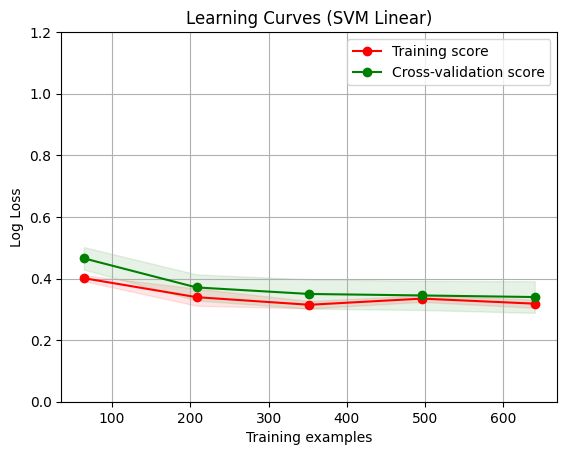

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, log_loss,
                             classification_report, precision_recall_curve,
                             auc)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to compute log loss for different thresholds
def plot_log_loss_curve(estimator, X, y, thresholds, X_test, y_test):
    log_losses = []
    for thresh in thresholds:
        y_prob = estimator.predict_proba(X_test)
        log_losses.append(log_loss(y_test, np.column_stack((1-y_prob[:, 1], y_prob[:, 1] > thresh))))

    plt.plot(thresholds, log_losses, marker='.')
    plt.xlabel('Threshold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss Curve (SVM Linear)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Log Loss")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Train the SVM model with Linear kernel
SVC1 = SVC(kernel='linear', random_state=0, probability=True)
SVC1.fit(X_train, y_train)

# Predict on test set
y_pred = SVC1.predict(X_test)
y_prob = SVC1.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve and Log Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM Linear)')

thresholds = np.linspace(0.01, 0.99, 100)
plot_log_loss_curve(SVC1, X_train, y_train, thresholds, X_test, y_test)

plt.tight_layout()
plt.show()

# Plot learning curve
title = "Learning Curves (SVM Linear)"
plot_learning_curve(SVC1, title, X_train, y_train, ylim=(0, 1.2), cv=5, n_jobs=-1)

plt.show()


Confusion Matrix:
[[82 11]
 [27 80]]
Accuracy: 0.8100
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

Log Loss: 1.2427
Precision-Recall AUC: 0.8809


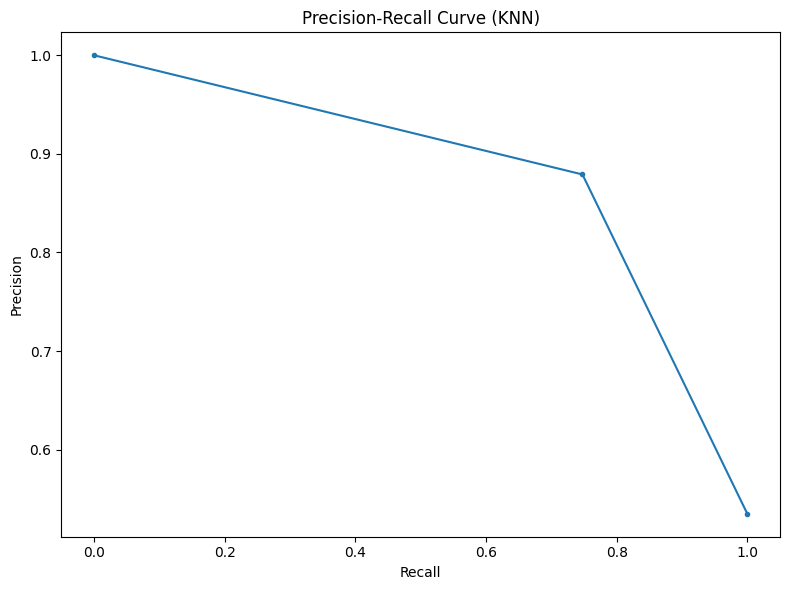

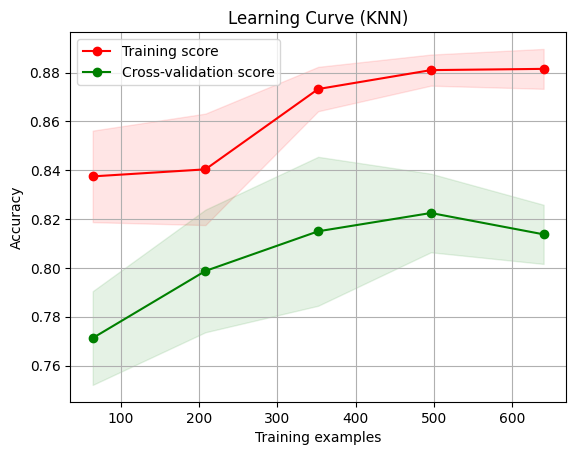

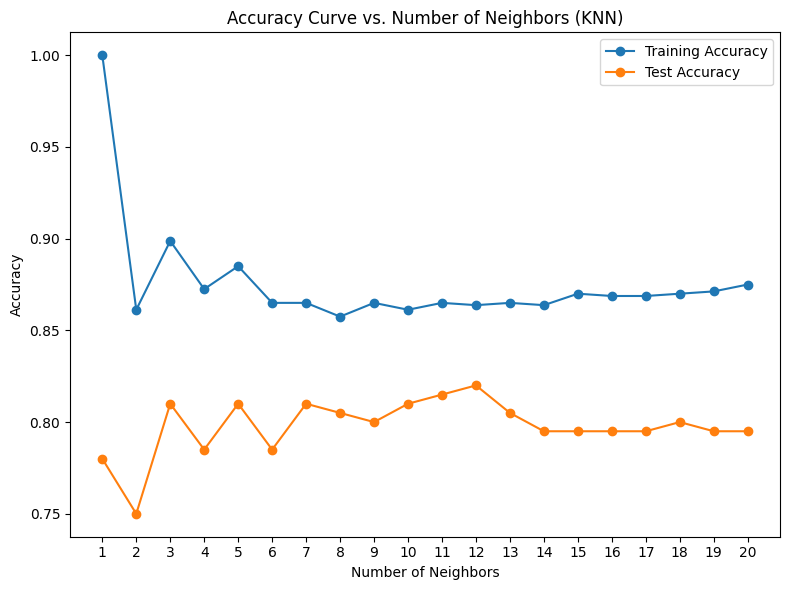

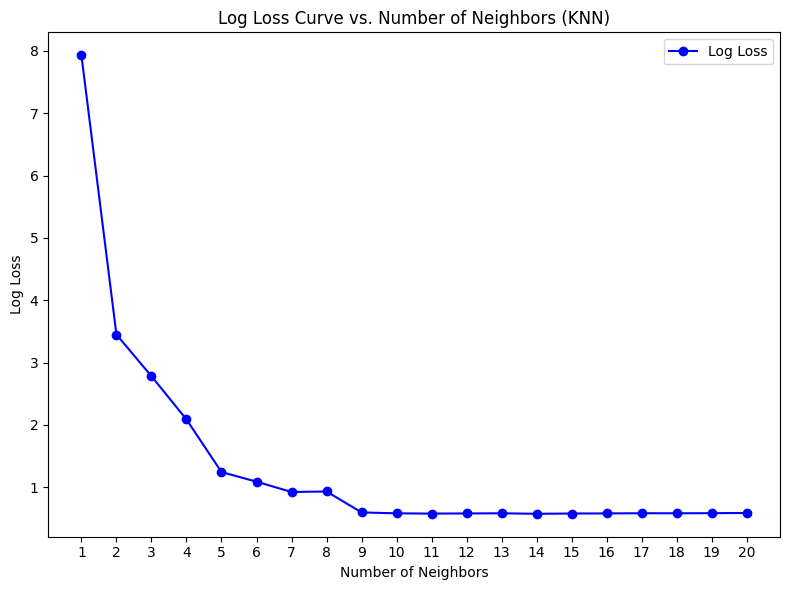

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (KNN)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Function to plot accuracy curve vs. number of neighbors
def plot_accuracy_curve(X_train, y_train, X_test, y_test, max_neighbors=20):
    neighbors = range(1, max_neighbors + 1)
    train_accuracy = []
    test_accuracy = []
    log_losses = []

    for n in neighbors:
        KNN = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=2)
        KNN.fit(X_train, y_train)
        train_accuracy.append(KNN.score(X_train, y_train))
        test_accuracy.append(KNN.score(X_test, y_test))

        y_pred_prob = KNN.predict_proba(X_test)
        log_losses.append(log_loss(y_test, y_pred_prob))

    plt.figure(figsize=(8, 6))
    plt.plot(neighbors, train_accuracy, marker='o', label='Training Accuracy')
    plt.plot(neighbors, test_accuracy, marker='o', label='Test Accuracy')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve vs. Number of Neighbors (KNN)')
    plt.xticks(neighbors)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(neighbors, log_losses, marker='o', color='b', label='Log Loss')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Log Loss')
    plt.title('Log Loss Curve vs. Number of Neighbors (KNN)')
    plt.xticks(neighbors)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Train the KNN model
KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_train, y_train)

# Predict on test set
y_pred = KNN.predict(X_test)

# Predict probabilities on test set
y_pred_prob = KNN.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

logloss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# Learning Curve
title = "Learning Curve (KNN)"
plot_learning_curve(KNN, title, X_train, y_train, cv=5, n_jobs=-1)

# Accuracy Curve vs. Number of Neighbors and Log Loss
plot_accuracy_curve(X_train, y_train, X_test, y_test, max_neighbors=20)


Confusion Matrix:
[[85  8]
 [21 86]]
Accuracy: 0.8550
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Precision-Recall AUC: 0.9391


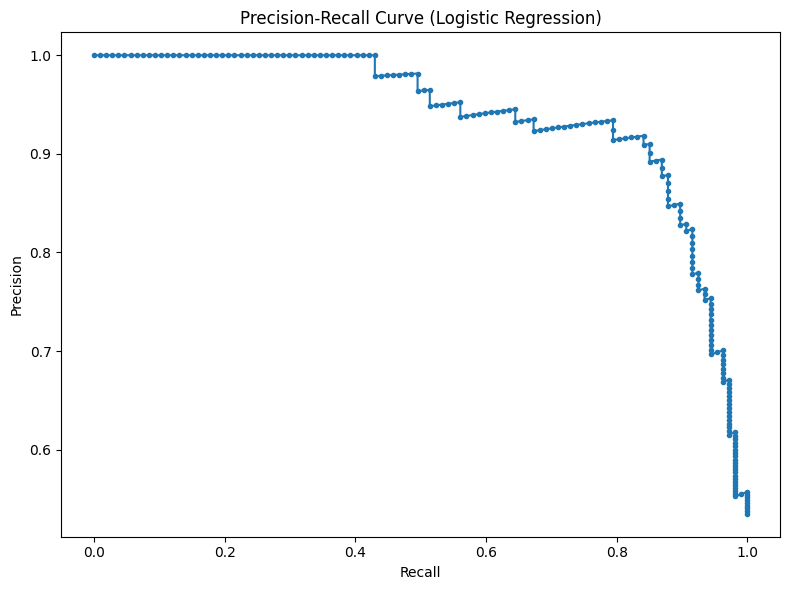

ROC AUC: 0.9216


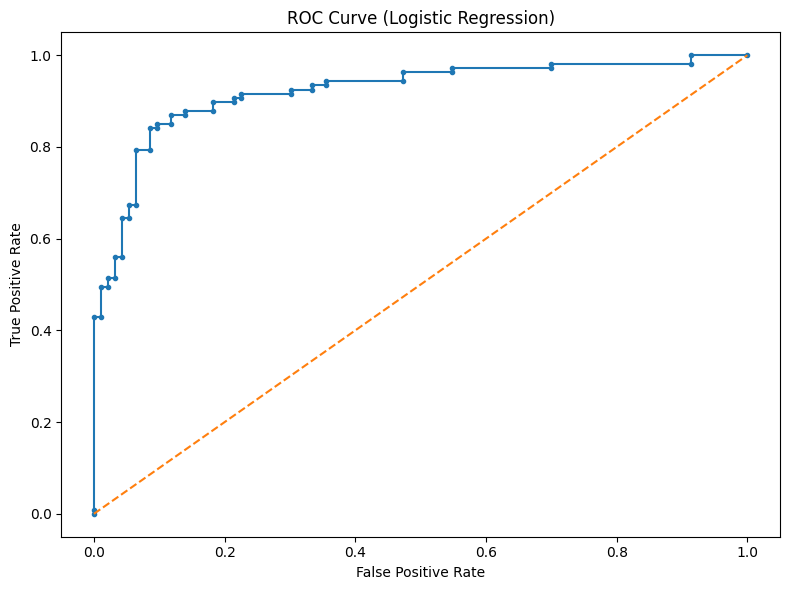

Log Loss: 0.3686


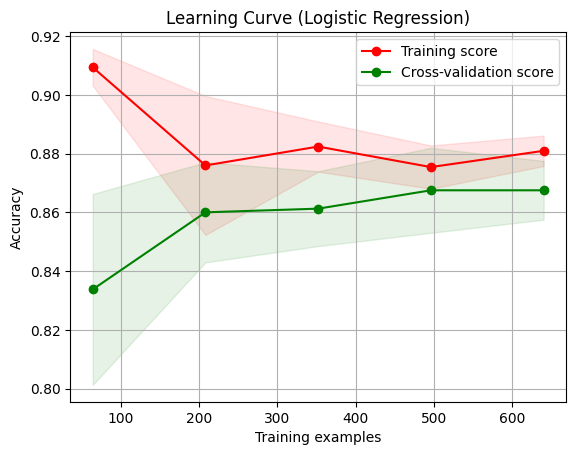

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Logistic Regression)')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Logistic Regression)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Train the Logistic Regression model
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

# Predict on test set
y_pred = LR.predict(X_test)
y_prob = LR.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plot_roc_curve(fpr, tpr)

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (Logistic Regression)"
plot_learning_curve(LR, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


Confusion Matrix:
[[88  5]
 [15 92]]
Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Precision-Recall AUC: 0.9585


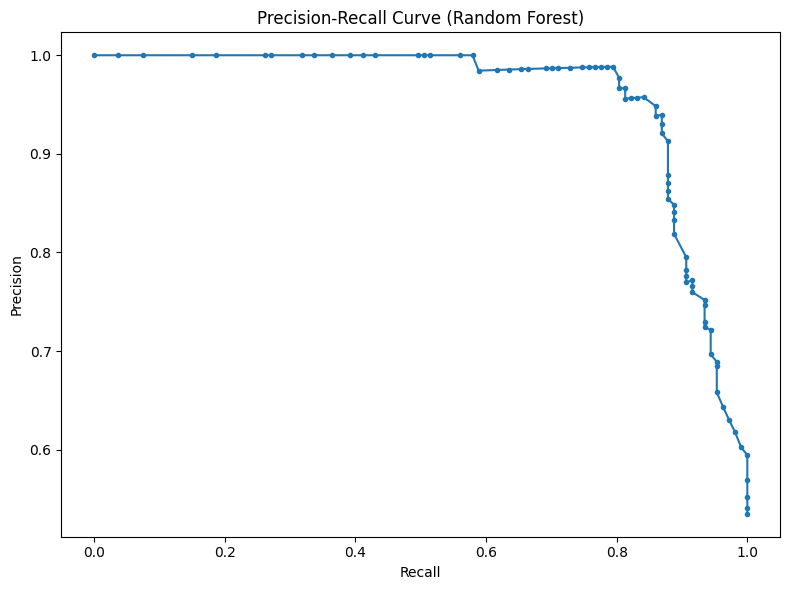

ROC AUC: 0.9379


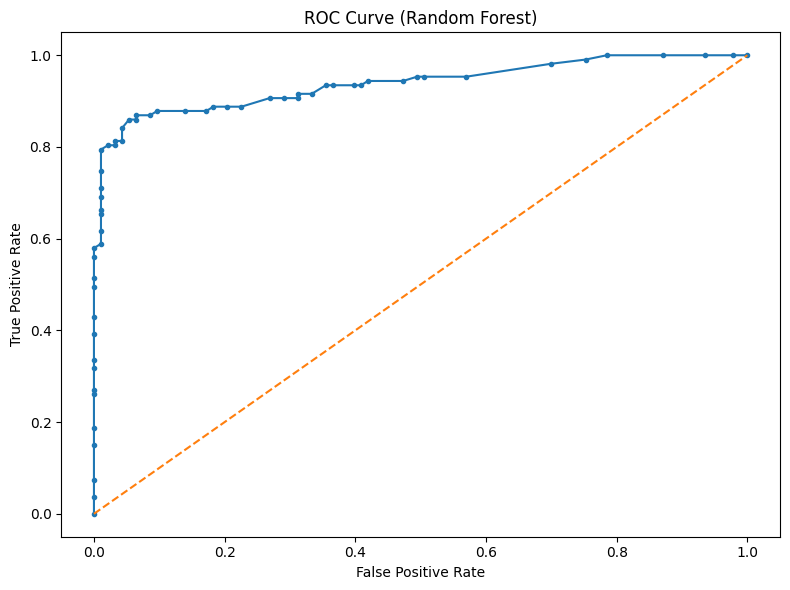

Log Loss: 0.3204


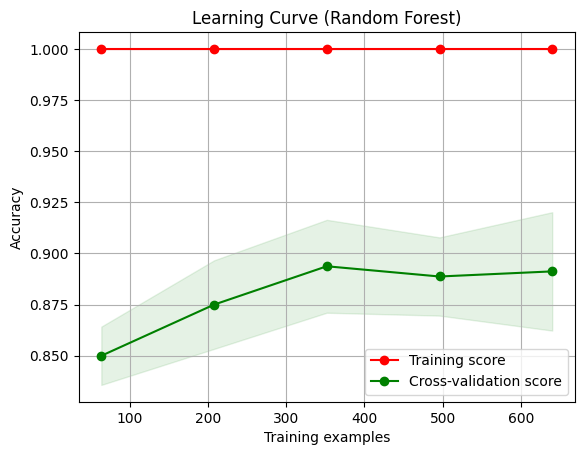

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Random Forest)')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Random Forest)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plot_roc_curve(fpr, tpr)

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


## XGBoost Classifier

In [ ]:
!pip install xgboost

Confusion Matrix:
[[2505   69]
 [ 134 2380]]
Accuracy: 0.9601
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2574
           1       0.97      0.95      0.96      2514

    accuracy                           0.96      5088
   macro avg       0.96      0.96      0.96      5088
weighted avg       0.96      0.96      0.96      5088

Precision-Recall AUC: 0.9930


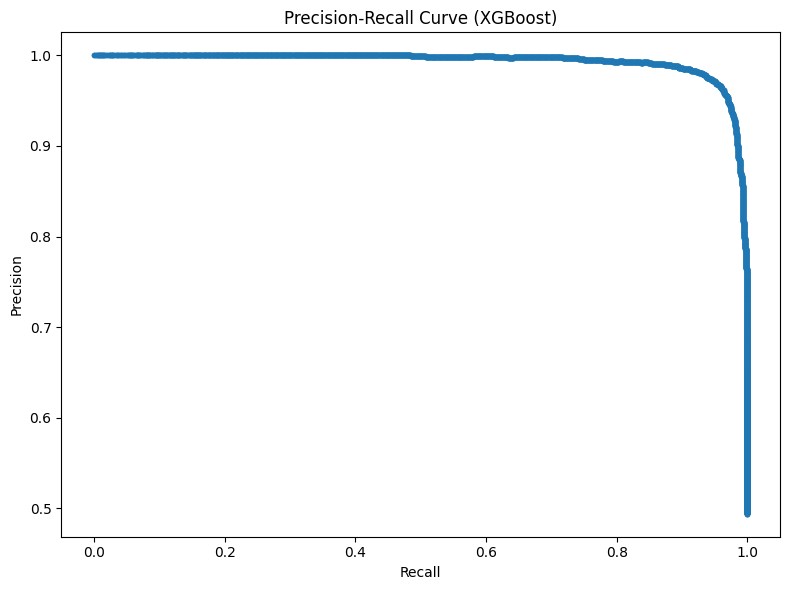

ROC AUC: 0.9930


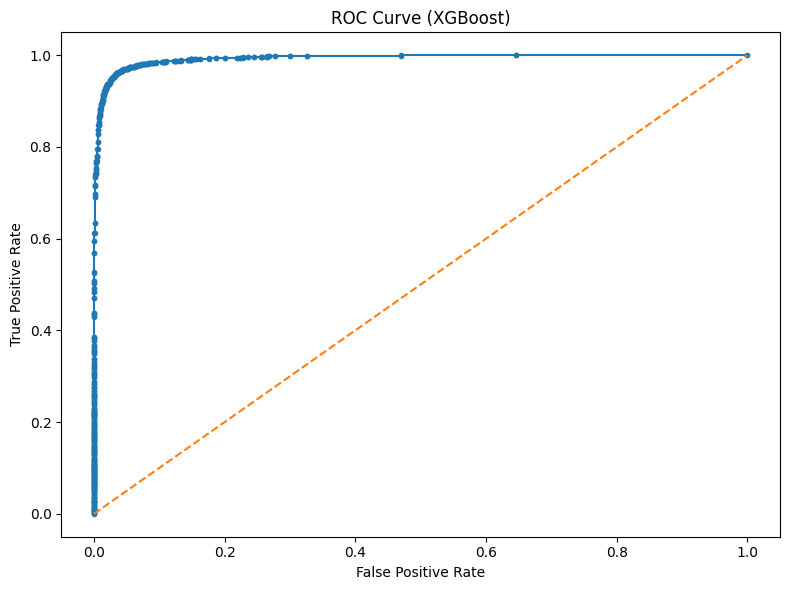

Log Loss: 0.1115


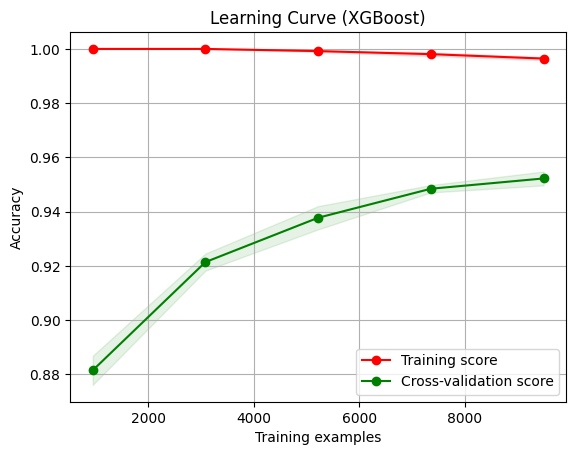

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (XGBoost)')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (XGBoost)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Train the XGBoost Classifier model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plot_roc_curve(fpr, tpr)

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (XGBoost)"
plot_learning_curve(xgb_model, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


In [ ]:
# Predict probabilities
from sklearn.metrics import log_loss

y_pred_proba = xgb_model.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba)

print(f'Log Loss: {logloss}')


Log Loss: 0.3834259969912926


[0]	validation_0-logloss:0.49059	validation_1-logloss:0.54029
[1]	validation_0-logloss:0.36797	validation_1-logloss:0.44681
[2]	validation_0-logloss:0.28831	validation_1-logloss:0.38866
[3]	validation_0-logloss:0.23031	validation_1-logloss:0.35726
[4]	validation_0-logloss:0.18979	validation_1-logloss:0.33742
[5]	validation_0-logloss:0.15852	validation_1-logloss:0.31920
[6]	validation_0-logloss:0.13594	validation_1-logloss:0.31518
[7]	validation_0-logloss:0.11521	validation_1-logloss:0.30806
[8]	validation_0-logloss:0.10067	validation_1-logloss:0.30108
[9]	validation_0-logloss:0.08921	validation_1-logloss:0.30028
[10]	validation_0-logloss:0.08038	validation_1-logloss:0.29900
[11]	validation_0-logloss:0.07265	validation_1-logloss:0.30440
[12]	validation_0-logloss:0.06527	validation_1-logloss:0.30241
[13]	validation_0-logloss:0.05982	validation_1-logloss:0.29603
[14]	validation_0-logloss:0.05565	validation_1-logloss:0.30289
[15]	validation_0-logloss:0.05110	validation_1-logloss:0.30238
[1

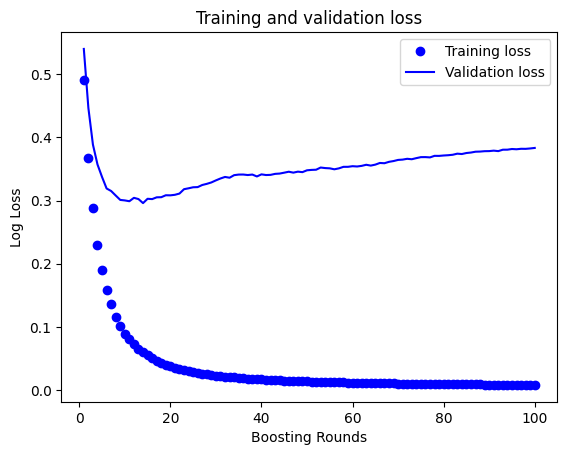

Accuracy: 0.895


In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already defined and compiled your XGBoost model
# and have your training and test data X_train, X_test, y_train, y_test

# Define your XGBoost model
xgb = XGBClassifier( eval_metric='logloss')

# Train the XGBoost model
history = xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# Get training history
train_loss = history.evals_result()['validation_0']['logloss']
val_loss = history.evals_result()['validation_1']['logloss']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[0]	validation_0-logloss:0.49059	validation_1-logloss:0.54029
[1]	validation_0-logloss:0.36797	validation_1-logloss:0.44681
[2]	validation_0-logloss:0.28831	validation_1-logloss:0.38866
[3]	validation_0-logloss:0.23031	validation_1-logloss:0.35726
[4]	validation_0-logloss:0.18979	validation_1-logloss:0.33742
[5]	validation_0-logloss:0.15852	validation_1-logloss:0.31920
[6]	validation_0-logloss:0.13594	validation_1-logloss:0.31518
[7]	validation_0-logloss:0.11521	validation_1-logloss:0.30806
[8]	validation_0-logloss:0.10067	validation_1-logloss:0.30108
[9]	validation_0-logloss:0.08921	validation_1-logloss:0.30028
[10]	validation_0-logloss:0.08038	validation_1-logloss:0.29900
[11]	validation_0-logloss:0.07265	validation_1-logloss:0.30440
[12]	validation_0-logloss:0.06527	validation_1-logloss:0.30241
[13]	validation_0-logloss:0.05982	validation_1-logloss:0.29603
[14]	validation_0-logloss:0.05565	validation_1-logloss:0.30289
[15]	validation_0-logloss:0.05110	validation_1-logloss:0.30238
[1

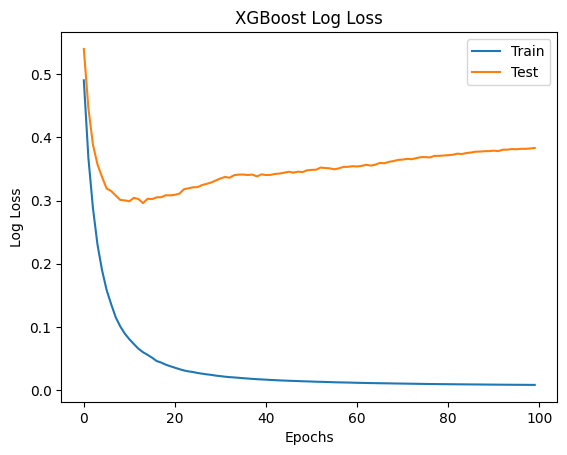

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model = XGBClassifier(eval_metric="logloss")
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Retrieve log loss history
results = xgb_model.evals_result()

# Plot log loss
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure()
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()


##Pickle file of XgB

In [ ]:
#printing pickle file for xgbost
import pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


##Grid Search On XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a random dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'alpha': [0, 0.1, 0.5, 1],
    'lambda': [1, 1.5, 2, 3]
}

# Initialize Grid Search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit Grid Search
xgb_grid_search.fit(X_train, y_train)

# Predict class labels
y_pred_xgb_gs = xgb_grid_search.predict(X_test)

# Predict probabilities
y_pred_proba_xgb_gs = xgb_grid_search.predict_proba(X_test)

# Print performance metrics
print("\nXGBoost Grid Search Performance with Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_gs))
print("Log Loss:", log_loss(y_test, y_pred_proba_xgb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_gs))


##GB classifier

Confusion Matrix:
[[90  3]
 [15 92]]
Accuracy: 0.9100
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        93
           1       0.97      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200

Precision-Recall AUC: 0.9598


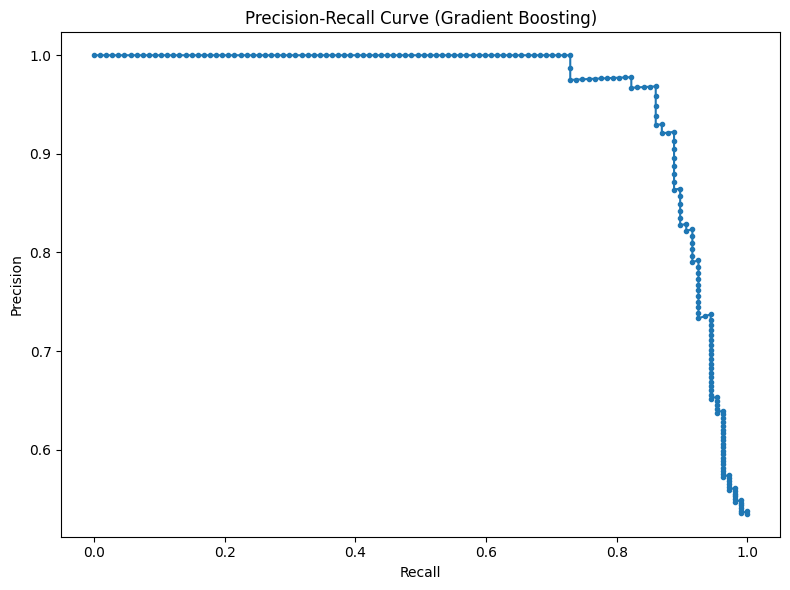

ROC AUC: 0.9338


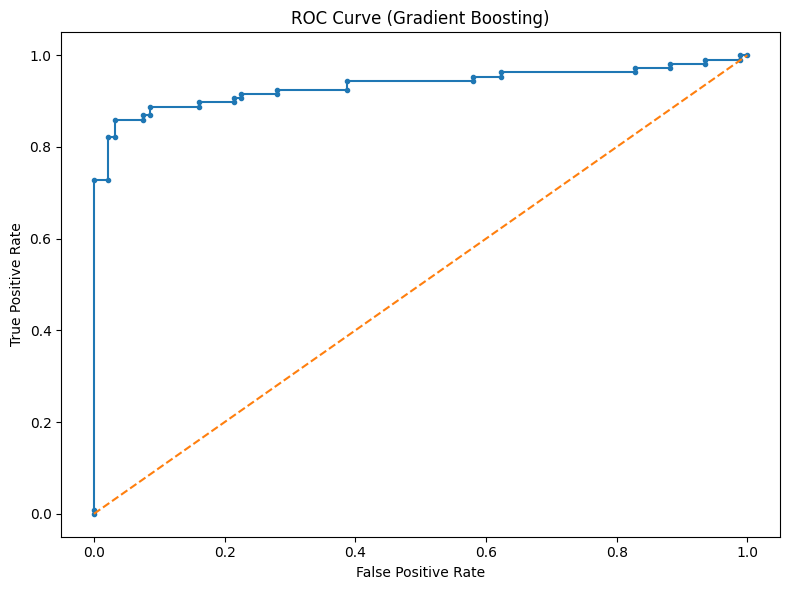

Log Loss: 0.3190


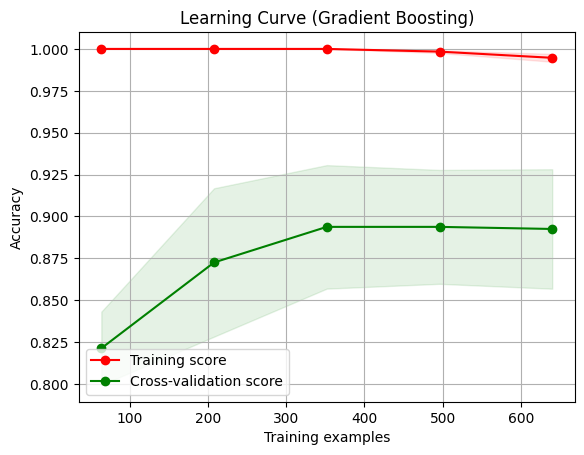

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Gradient Boosting)')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Gradient Boosting)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plot_roc_curve(fpr, tpr)

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (Gradient Boosting)"
plot_learning_curve(gb_model, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


##ADA BoST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[84  9]
 [17 90]]
Accuracy: 0.8700
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        93
           1       0.91      0.84      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Precision-Recall AUC: 0.9515


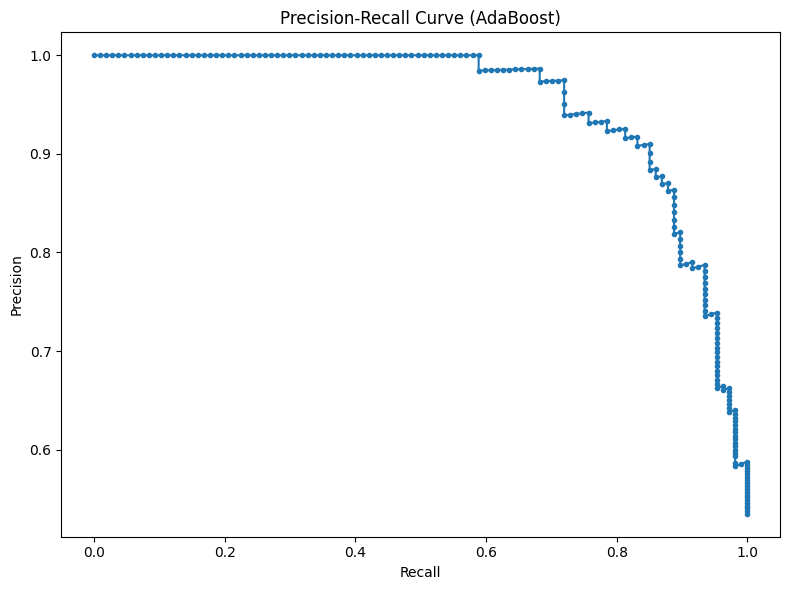

ROC AUC: 0.9319


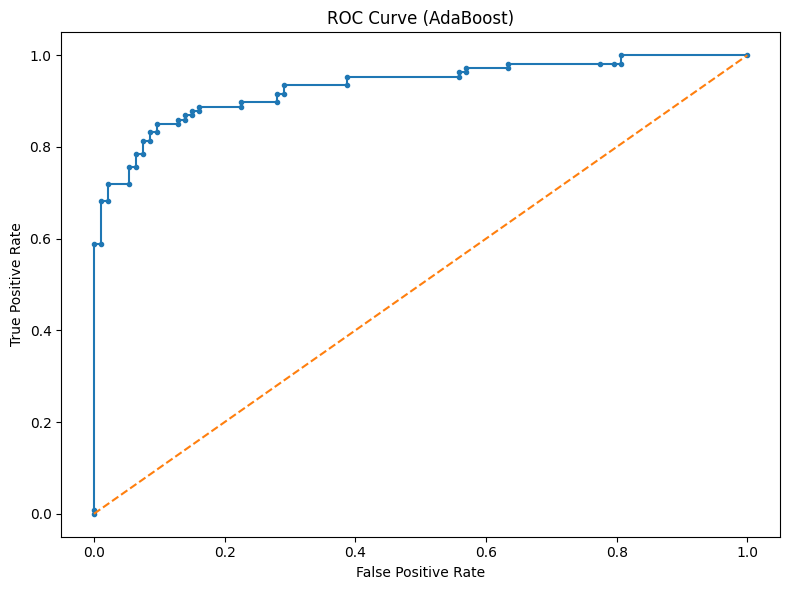

Log Loss: 0.6309


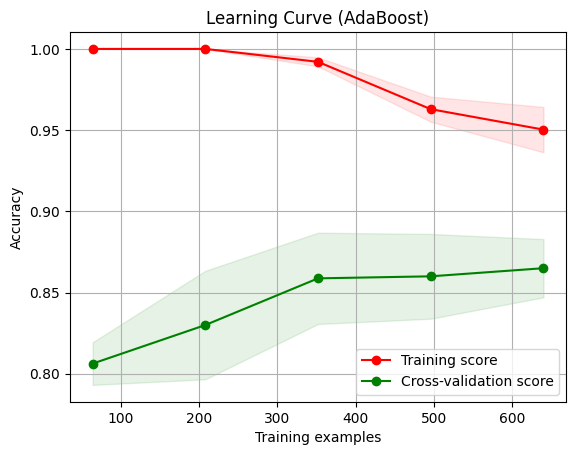

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (AdaBoost)')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (AdaBoost)')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the AdaBoost Classifier model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = adaboost_model.predict(X_test)
y_prob = adaboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
plot_precision_recall_curve(precision, recall)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plot_roc_curve(fpr, tpr)

# Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (AdaBoost)"
plot_learning_curve(adaboost_model, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


##Overall all data set basic and hybrid model

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, log_loss, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np



# Traditional classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

print("Traditional Classifiers:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Helper class for hybrid models
class BoostingModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, boosting_model):
        self.base_classifier = base_classifier
        self.boosting_model = boosting_model

    def fit(self, X, y):
        # Fit the base classifier
        self.base_classifier.fit(X, y)
        # Use the predictions of the base classifier as new features
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Fit the boosting model on the new features
        self.boosting_model.fit(base_predictions, y)
        return self

    def predict(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make final predictions
        return self.boosting_model.predict(base_predictions)

    def predict_proba(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make probability estimates
        return self.boosting_model.predict_proba(base_predictions)

# Define hybrid models
boosting_model = GradientBoostingClassifier()

hybrid_classifiers = {
    'DTBM': BoostingModel(DecisionTreeClassifier(), boosting_model),
    'RFBM': BoostingModel(RandomForestClassifier(), boosting_model),
    'KNNBM': BoostingModel(KNeighborsClassifier(), boosting_model),
    'GBBM': BoostingModel(GradientBoostingClassifier(), boosting_model),
    'ABBM': BoostingModel(AdaBoostClassifier(), boosting_model)
}

print("\nHybrid Models:")
for name, clf in hybrid_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")


Traditional Classifiers:

Decision Tree:
Accuracy: 0.84
Confusion Matrix:
[[83 10]
 [21 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

Log Loss: 5.59
RMSE: 0.68

Random Forest:
Accuracy: 0.90
Confusion Matrix:
[[89  4]
 [16 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        93
           1       0.96      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200

Log Loss: 0.33
RMSE: 0.59

K-Nearest Neighbors:
Accuracy: 0.81
Confusion Matrix:
[[82 11]
 [27 80]]
Classificatio

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost:
Accuracy: 0.87
Confusion Matrix:
[[84  9]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        93
           1       0.91      0.84      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Log Loss: 0.63
RMSE: 0.50

Hybrid Models:

DTBM:
Accuracy: 0.85
Confusion Matrix:
[[84  9]
 [21 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        93
           1       0.91      0.80      0.85       107

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

Log Loss: 1.61
RMSE: 0.68

RFBM:
Accuracy: 0.89
Confusion Matrix:
[[88  5]
 [17 90]]
Classification Report:
              precision    r

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



ABBM:
Accuracy: 0.87
Confusion Matrix:
[[84  9]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        93
           1       0.91      0.84      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Log Loss: 0.41
RMSE: 0.64


##Rnadom forest with L1,L2 optimization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.utils.class_weight import compute_class_weight

# Function to plot precision-recall curve
def plot_precision_recall_curve(precision, recall, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({model_name})')
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Determine class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train Random Forest models
rf_model_l1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_l2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)

rf_model_l1.fit(X_train, y_train)
rf_model_l2.fit(X_train, y_train)

# Predict on test set
y_pred_l1 = rf_model_l1.predict(X_test)
y_prob_l1 = rf_model_l1.predict_proba(X_test)

y_pred_l2 = rf_model_l2.predict(X_test)
y_prob_l2 = rf_model_l2.predict_proba(X_test)

# Evaluate the models
for model_name, y_pred, y_prob in zip(['Random Forest L1', 'Random Forest L2'], [y_pred_l1, y_pred_l2], [y_prob_l1, y_prob_l2]):
    print(f"\n{model_name} Model Evaluation:")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    report = classification_report(y_test, y_pred)
    print(report)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")
    plot_precision_recall_curve(precision, recall, model_name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC: {roc_auc:.4f}")
    plot_roc_curve(fpr, tpr, model_name)

    # Log Loss
    logloss = log_loss(y_test, y_prob)
    print(f"Log Loss: {logloss:.4f}")

# Learning Curve
title = "Learning Curve (Random Forest L1)"
plot_learning_curve(rf_model_l1, title, X_train, y_train, cv=5, n_jobs=-1)

title = "Learning Curve (Random Forest L2)"
plot_learning_curve(rf_model_l2, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

# Define the parameter grid for L1 regularization model (no direct L1 regularization, using other hyperparameters instead)
param_grid_l1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy']
}

# Define the parameter grid for L2 regularization model
param_grid_l2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['entropy']
}

# Create and fit the GridSearchCV for L1 model
grid_search_l1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_l1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l1.fit(X_train, y_train)
best_rf_l1 = grid_search_l1.best_estimator_

# Create and fit the GridSearchCV for L2 model
grid_search_l2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_l2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l2.fit(X_train, y_train)
best_rf_l2 = grid_search_l2.best_estimator_

# Evaluate the best models
y_pred_rf_l1 = best_rf_l1.predict(X_test)
y_pred_rf_l2 = best_rf_l2.predict(X_test)
y_pred_proba_l1 = best_rf_l1.predict_proba(X_test)
y_pred_proba_l2 = best_rf_l2.predict_proba(X_test)

# Print accuracy
print("Best L1 model accuracy:", best_rf_l1.score(X_test, y_test))
print("Best L2 model accuracy:", best_rf_l2.score(X_test, y_test))

# Calculate log loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss L1: {logloss_l1}')
print(f'Log Loss L2: {logloss_l2}')


##Gtadient Bosting with L1,L2 optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, log_loss
from matplotlib.colors import ListedColormap

# Fit the models
gbm_l1 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='deviance', min_samples_split=10)
gbm_l1.fit(X_train, y_train)
y_pred_gbm_l1 = gbm_l1.predict(X_test)
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)

gbm_l2 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='deviance', min_samples_split=10, min_samples_leaf=5)
gbm_l2.fit(X_train, y_train)
y_pred_gbm_l2 = gbm_l2.predict(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)

# Print model performance
print('Model performance:')
print(f'L1 Score: {gbm_l1.score(X_test, y_test)}')
print(f'L2 Score: {gbm_l2.score(X_test, y_test)}')

# Log Loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss L1: {logloss_l1}')
print(f'Log Loss L2: {logloss_l2}')

# Precision, Recall, F1 Score for gbm_l1
precision_l1 = precision_score(y_test, y_pred_gbm_l1)
recall_l1 = recall_score(y_test, y_pred_gbm_l1)
f1_l1 = f1_score(y_test, y_pred_gbm_l1)
print(f'Precision L1: {precision_l1}')
print(f'Recall L1: {recall_l1}')
print(f'F1 Score L1: {f1_l1}')

# Precision, Recall, F1 Score for gbm_l2
precision_l2 = precision_score(y_test, y_pred_gbm_l2)
recall_l2 = recall_score(y_test, y_pred_gbm_l2)
f1_l2 = f1_score(y_test, y_pred_gbm_l2)
print(f'Precision L2: {precision_l2}')
print(f'Recall L2: {recall_l2}')
print(f'F1 Score L2: {f1_l2}')

# Visualize the first decision tree from gbm_l1
dot_data = export_graphviz(gbm_l1.estimators_[0, 0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_l1")
graph

# Visualize the first decision tree from gbm_l2
dot_data = export_graphviz(gbm_l2.estimators_[0, 0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_l2")
graph

# Feature importance for gbm_l1
feature_importance_l1 = gbm_l1.feature_importances_
sorted_idx_l1 = np.argsort(feature_importance_l1)

# Plot feature importance for gbm_l1
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l1)), feature_importance_l1[sorted_idx_l1], align='center')
plt.yticks(range(len(sorted_idx_l1)), [f'Feature {i}' for i in sorted_idx_l1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L1)')
plt.show()

# Feature importance for gbm_l2
feature_importance_l2 = gbm_l2.feature_importances_
sorted_idx_l2 = np.argsort(feature_importance_l2)

# Plot feature importance for gbm_l2
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l2)), feature_importance_l2[sorted_idx_l2], align='center')
plt.yticks(range(len(sorted_idx_l2)), [f'Feature {i}' for i in sorted_idx_l2])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L2)')
plt.show()

# Visualize the boosting process with log loss
train_log_loss_l1 = []
test_log_loss_l1 = []
train_log_loss_l2 = []
test_log_loss_l2 = []

for y_pred in gbm_l1.staged_predict_proba(X_train):
    train_log_loss_l1.append(log_loss(y_train, y_pred))
for y_pred in gbm_l1.staged_predict_proba(X_test):
    test_log_loss_l1.append(log_loss(y_test, y_pred))

for y_pred in gbm_l2.staged_predict_proba(X_train):
    train_log_loss_l2.append(log_loss(y_train, y_pred))
for y_pred in gbm_l2.staged_predict_proba(X_test):
    test_log_loss_l2.append(log_loss(y_test, y_pred))

# Plot log loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l1, label='Train Log Loss (L1)')
plt.plot(test_log_loss_l1, label='Test Log Loss (L1)')
plt.plot(train_log_loss_l2, label='Train Log Loss (L2)')
plt.plot(test_log_loss_l2, label='Test Log Loss (L2)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'GBM L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'GBM L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Visualize decision boundary (only if the dataset has 2 features for simplicity)
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_l1 = gbm_l1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l1 = Z_l1.reshape(xx.shape)

    Z_l2 = gbm_l2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l2 = Z_l2.reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Gradient Boosting (L1)')

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Gradient Boosting (L2)')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, log_loss
from matplotlib.colors import ListedColormap

# Fit the models
gbm_l1 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='deviance', min_samples_split=10)
gbm_l1.fit(X_train, y_train)
y_pred_gbm_l1 = gbm_l1.predict(X_test)
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)

gbm_l2 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='deviance', min_samples_split=10, min_samples_leaf=5)
gbm_l2.fit(X_train, y_train)
y_pred_gbm_l2 = gbm_l2.predict(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)

# Print model performance
print('Model performance:')
print(f'L1 Score: {gbm_l1.score(X_test, y_test)}')
print(f'L2 Score: {gbm_l2.score(X_test, y_test)}')

# Log Loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss L1: {logloss_l1}')
print(f'Log Loss L2: {logloss_l2}')

# Precision, Recall, F1 Score for gbm_l1
precision_l1 = precision_score(y_test, y_pred_gbm_l1)
recall_l1 = recall_score(y_test, y_pred_gbm_l1)
f1_l1 = f1_score(y_test, y_pred_gbm_l1)
print(f'Precision L1: {precision_l1}')
print(f'Recall L1: {recall_l1}')
print(f'F1 Score L1: {f1_l1}')

# Precision, Recall, F1 Score for gbm_l2
precision_l2 = precision_score(y_test, y_pred_gbm_l2)
recall_l2 = recall_score(y_test, y_pred_gbm_l2)
f1_l2 = f1_score(y_test, y_pred_gbm_l2)
print(f'Precision L2: {precision_l2}')
print(f'Recall L2: {recall_l2}')
print(f'F1 Score L2: {f1_l2}')

# Visualize the first decision tree from gbm_l1
dot_data = export_graphviz(gbm_l1.estimators_[0, 0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_l1")
graph

# Visualize the first decision tree from gbm_l2
dot_data = export_graphviz(gbm_l2.estimators_[0, 0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_l2")
graph

# Feature importance for gbm_l1
feature_importance_l1 = gbm_l1.feature_importances_
sorted_idx_l1 = np.argsort(feature_importance_l1)

# Plot feature importance for gbm_l1
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l1)), feature_importance_l1[sorted_idx_l1], align='center')
plt.yticks(range(len(sorted_idx_l1)), [f'Feature {i}' for i in sorted_idx_l1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L1)')
plt.show()

# Feature importance for gbm_l2
feature_importance_l2 = gbm_l2.feature_importances_
sorted_idx_l2 = np.argsort(feature_importance_l2)

# Plot feature importance for gbm_l2
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l2)), feature_importance_l2[sorted_idx_l2], align='center')
plt.yticks(range(len(sorted_idx_l2)), [f'Feature {i}' for i in sorted_idx_l2])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L2)')
plt.show()

# Visualize the boosting process with log loss
train_log_loss_l1 = []
test_log_loss_l1 = []
train_log_loss_l2 = []
test_log_loss_l2 = []

for y_pred in gbm_l1.staged_predict_proba(X_train):
    train_log_loss_l1.append(log_loss(y_train, y_pred))
for y_pred in gbm_l1.staged_predict_proba(X_test):
    test_log_loss_l1.append(log_loss(y_test, y_pred))

for y_pred in gbm_l2.staged_predict_proba(X_train):
    train_log_loss_l2.append(log_loss(y_train, y_pred))
for y_pred in gbm_l2.staged_predict_proba(X_test):
    test_log_loss_l2.append(log_loss(y_test, y_pred))

# Plot log loss over iterations for L1
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l1, label='Train Log Loss (L1)')
plt.plot(test_log_loss_l1, label='Test Log Loss (L1)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations (L1)')
plt.legend()
plt.show()

# Plot log loss over iterations for L2
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l2, label='Train Log Loss (L2)')
plt.plot(test_log_loss_l2, label='Test Log Loss (L2)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations (L2)')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'GBM L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'GBM L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Visualize decision boundary (only if the dataset has 2 features for simplicity)
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_l1 = gbm_l1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l1 = Z_l1.reshape(xx.shape)

    Z_l2 = gbm_l2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l2 = Z_l2.reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Gradient Boosting (L1)')

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


In [ ]:
# Initialize lists to store log loss values
log_loss_l1 = []
log_loss_l2 = []

# Calculate staged log loss for gbm_l1
for y_pred_proba in gbm_l1.staged_predict_proba(X_test):
    log_loss_l1.append(log_loss(y_test, y_pred_proba))

# Calculate staged log loss for gbm_l2
for y_pred_proba in gbm_l2.staged_predict_proba(X_test):
    log_loss_l2.append(log_loss(y_test, y_pred_proba))

# Plot log loss curves
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 251), log_loss_l1, label='Gradient Boosting with L1 Regularization')
plt.plot(np.arange(1, 251), log_loss_l2, label='Gradient Boosting with L2 Regularization')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve for Gradient Boosting with L1 and L2 Regularization')
plt.legend()
plt.show()

# Final log loss and accuracy
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)

final_logloss_l1 = log_loss(y_test, y_pred_proba_l1)
final_logloss_l2 = log_loss(y_test, y_pred_proba_l2)

print(f'Final Log Loss for L1: {final_logloss_l1}')
print(f'Final Log Loss for L2: {final_logloss_l2}')
print(f'Accuracy for L1: {gbm_l1.score(X_test, y_test)}')
print(f'Accuracy for L2: {gbm_l2.score(X_test, y_test)}')

##Gradient bosting with L1, L2 optimization with exponential loss

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss # Import accuracy_score and log_loss

# Define GradientBoostingClassifier with L1 regularization
gbm_l1 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='exponential', min_samples_split=10)
gbm_l1.fit(X_train, y_train)
y_pred_gbm_l1 = gbm_l1.predict(X_test)

# Define GradientBoostingClassifier with L2 regularization
gbm_l2 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, loss='exponential', min_samples_split=10, min_samples_leaf=5)
gbm_l2.fit(X_train, y_train)
y_pred_gbm_l2 = gbm_l2.predict(X_test)

print(gbm_l1.score(X_test,y_test))
print(gbm_l2.score(X_test,y_test))
#print test and train accuracy for L1
y_train_pred = gbm_l1.predict(X_train)
y_test_pred = gbm_l1.predict(X_test)
train_accuracy_l1 = accuracy_score(y_train, y_train_pred)
test_accuracy_l1 = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score on training data : {train_accuracy_l1:.4f}')
print(f'Accuracy Score on test data : {test_accuracy_l1:.4f}')
#print test and train accuracy for L2
y_train_pred = gbm_l2.predict(X_train)
y_test_pred = gbm_l2.predict(X_test)
train_accuracy_l2 = accuracy_score(y_train, y_train_pred)
test_accuracy_l2 = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score on training data : {train_accuracy_l2:.4f}')
print(f'Accuracy Score on test data : {test_accuracy_l2:.4f}')

#if we reduce learning rate we need to increase estimators otherwise model will underfit
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)


# Calculate log loss of random_forest
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss: {logloss_l1,logloss_l2}')

In [ ]:
# Initialize lists to store log loss values for training and validation sets
log_loss_train_l1 = []
log_loss_val_l1 = []
log_loss_train_l2 = []
log_loss_val_l2 = []

# Calculate staged log loss for gbm_l1
for y_train_pred_proba, y_val_pred_proba in zip(gbm_l1.staged_predict_proba(X_train), gbm_l1.staged_predict_proba(X_test)):
    log_loss_train_l1.append(log_loss(y_train, y_train_pred_proba))
    log_loss_val_l1.append(log_loss(y_test, y_val_pred_proba))

# Calculate staged log loss for gbm_l2
for y_train_pred_proba, y_val_pred_proba in zip(gbm_l2.staged_predict_proba(X_train), gbm_l2.staged_predict_proba(X_test)):
    log_loss_train_l2.append(log_loss(y_train, y_train_pred_proba))
    log_loss_val_l2.append(log_loss(y_test, y_val_pred_proba))

# Plot log loss curves for L1 regularization
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 251), log_loss_train_l1, label='Training Log Loss (L1)')
plt.plot(np.arange(1, 251), log_loss_val_l1, label='Validation Log Loss (L1)')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve for Gradient Boosting with L1 Regularization')
plt.legend()
plt.show()

# Plot log loss curves for L2 regularization
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 251), log_loss_train_l2, label='Training Log Loss (L2)')
plt.plot(np.arange(1, 251), log_loss_val_l2, label='Validation Log Loss (L2)')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve for Gradient Boosting with L2 Regularization')
plt.legend()
plt.show()

# Final log loss and accuracy
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)

final_logloss_l1 = log_loss(y_test, y_pred_proba_l1)
final_logloss_l2 = log_loss(y_test, y_pred_proba_l2)

print(f'Final Log Loss for L1: {final_logloss_l1}')
print(f'Final Log Loss for L2: {final_logloss_l2}')
print(f'Accuracy for L1: {gbm_l1.score(X_test, y_test)}')
print(f'Accuracy for L2: {gbm_l2.score(X_test, y_test)}')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Precision, Recall, F1 Score for gbm_l1
precision_l1 = precision_score(y_test, y_pred_gbm_l1)
recall_l1 = recall_score(y_test, y_pred_gbm_l1)
f1_l1 = f1_score(y_test, y_pred_gbm_l1)
print(f'Precision L1: {precision_l1}')
print(f'Recall L1: {recall_l1}')
print(f'F1 Score L1: {f1_l1}')

# Precision, Recall, F1 Score for gbm_l2
precision_l2 = precision_score(y_test, y_pred_gbm_l2)
recall_l2 = recall_score(y_test, y_pred_gbm_l2)
f1_l2 = f1_score(y_test, y_pred_gbm_l2)
print(f'Precision L2: {precision_l2}')
print(f'Recall L2: {recall_l2}')
print(f'F1 Score L2: {f1_l2}')


In [ ]:
# Calculate precision-recall points for gbm_l1
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

# Calculate precision-recall points for gbm_l2
precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'GBM L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'GBM L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


##Pipeline technique in LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Create pipelines for L1 and L2 regularization
pipe_l1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear'))
pipe_l2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

# Fit the models
pipe_l1.fit(X_train, y_train)
pipe_l2.fit(X_train, y_train)

# Predictions and probabilities
y_pred_l1 = pipe_l1.predict(X_test)
y_pred_proba_l1 = pipe_l1.predict_proba(X_test)
y_pred_l2 = pipe_l2.predict(X_test)
y_pred_proba_l2 = pipe_l2.predict_proba(X_test)

# Calculate log loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)

print(f'Log Loss L1: {logloss_l1:.4f}')
print(f'Log Loss L2: {logloss_l2:.4f}')

# Calculate accuracy
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print(f'Accuracy L1: {accuracy_l1:.4f}')
print(f'Accuracy L2: {accuracy_l2:.4f}')

# Confusion matrix
print("Confusion Matrix for L1:")
print(confusion_matrix(y_test, y_pred_l1))
print("\nConfusion Matrix for L2:")
print(confusion_matrix(y_test, y_pred_l2))

# Classification report
print("\nClassification Report for L1:")
print(classification_report(y_test, y_pred_l1))
print("\nClassification Report for L2:")
print(classification_report(y_test, y_pred_l2))


##Xtrem gradient boost Xgboos with L1,L2 optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, log_loss
from matplotlib.colors import ListedColormap

# Initialize the models
xgb_l1 = xgb.XGBClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, min_child_weight=10, use_label_encoder=False, eval_metric='logloss')
xgb_l2 = xgb.XGBClassifier(n_estimators=250, learning_rate=0.15, max_depth=3, random_state=42, min_child_weight=5, use_label_encoder=False, eval_metric='logloss')

# Fit the models
xgb_l1.fit(X_train, y_train)
y_pred_xgb_l1 = xgb_l1.predict(X_test)
y_pred_proba_l1 = xgb_l1.predict_proba(X_test)

xgb_l2.fit(X_train, y_train)
y_pred_xgb_l2 = xgb_l2.predict(X_test)
y_pred_proba_l2 = xgb_l2.predict_proba(X_test)

# Print model performance
print('Model performance:')
print(f'L1 Score: {xgb_l1.score(X_test, y_test)}')
print(f'L2 Score: {xgb_l2.score(X_test, y_test)}')

# Log Loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss L1: {logloss_l1}')
print(f'Log Loss L2: {logloss_l2}')

# Precision, Recall, F1 Score for xgb_l1
precision_l1 = precision_score(y_test, y_pred_xgb_l1)
recall_l1 = recall_score(y_test, y_pred_xgb_l1)
f1_l1 = f1_score(y_test, y_pred_xgb_l1)
print(f'Precision L1: {precision_l1}')
print(f'Recall L1: {recall_l1}')
print(f'F1 Score L1: {f1_l1}')

# Precision, Recall, F1 Score for xgb_l2
precision_l2 = precision_score(y_test, y_pred_xgb_l2)
recall_l2 = recall_score(y_test, y_pred_xgb_l2)
f1_l2 = f1_score(y_test, y_pred_xgb_l2)
print(f'Precision L2: {precision_l2}')
print(f'Recall L2: {recall_l2}')
print(f'F1 Score L2: {f1_l2}')

# Visualize the first decision tree from xgb_l1
plot_tree(xgb_l1, num_trees=0)
plt.title('First Tree in XGBoost L1')
plt.show()

# Visualize the first decision tree from xgb_l2
plot_tree(xgb_l2, num_trees=0)
plt.title('First Tree in XGBoost L2')
plt.show()

# Feature importance for xgb_l1
plot_importance(xgb_l1)
plt.title('Feature Importance in XGBoost (L1)')
plt.show()

# Feature importance for xgb_l2
plot_importance(xgb_l2)
plt.title('Feature Importance in XGBoost (L2)')
plt.show()

# Visualize the boosting process with log loss
evals_result_l1 = xgb_l1.evals_result()
evals_result_l2 = xgb_l2.evals_result()

train_log_loss_l1 = evals_result_l1['validation_0']['logloss']
test_log_loss_l1 = evals_result_l1['validation_1']['logloss']
train_log_loss_l2 = evals_result_l2['validation_0']['logloss']
test_log_loss_l2 = evals_result_l2['validation_1']['logloss']

# Plot log loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l1, label='Train Log Loss (L1)')
plt.plot(test_log_loss_l1, label='Test Log Loss (L1)')
plt.plot(train_log_loss_l2, label='Train Log Loss (L2)')
plt.plot(test_log_loss_l2, label='Test Log Loss (L2)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'XGBoost L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'XGBoost L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Visualize decision boundary (only if the dataset has 2 features for simplicity)
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, y_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_l1 = xgb_l1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l1 = Z_l1.reshape(xx.shape)

    Z_l2 = xgb_l2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l2 = Z_l2.reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of XGBoost (L1)')

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of XGBoost (L2)')
    plt.show()


##L1,L2 optimization on Ada Boosting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, log_loss
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Fit the AdaBoost models
ada_l1 = AdaBoostClassifier(n_estimators=250, learning_rate=0.15, random_state=42)
ada_l1.fit(X_train, y_train)
y_pred_ada_l1 = ada_l1.predict(X_test)
y_pred_proba_ada_l1 = ada_l1.predict_proba(X_test)

ada_l2 = AdaBoostClassifier(n_estimators=250, learning_rate=0.15, random_state=42)
ada_l2.fit(X_train, y_train)
y_pred_ada_l2 = ada_l2.predict(X_test)
y_pred_proba_ada_l2 = ada_l2.predict_proba(X_test)

# Print model performance
print('Model performance:')
print(f'L1 Score: {ada_l1.score(X_test, y_test)}')
print(f'L2 Score: {ada_l2.score(X_test, y_test)}')

# Log Loss
logloss_ada_l1 = log_loss(y_test, y_pred_proba_ada_l1)
logloss_ada_l2 = log_loss(y_test, y_pred_proba_ada_l2)
print(f'Log Loss L1: {logloss_ada_l1}')
print(f'Log Loss L2: {logloss_ada_l2}')

# Precision, Recall, F1 Score for ada_l1
precision_ada_l1 = precision_score(y_test, y_pred_ada_l1)
recall_ada_l1 = recall_score(y_test, y_pred_ada_l1)
f1_ada_l1 = f1_score(y_test, y_pred_ada_l1)
print(f'Precision L1: {precision_ada_l1}')
print(f'Recall L1: {recall_ada_l1}')
print(f'F1 Score L1: {f1_ada_l1}')

# Precision, Recall, F1 Score for ada_l2
precision_ada_l2 = precision_score(y_test, y_pred_ada_l2)
recall_ada_l2 = recall_score(y_test, y_pred_ada_l2)
f1_ada_l2 = f1_score(y_test, y_pred_ada_l2)
print(f'Precision L2: {precision_ada_l2}')
print(f'Recall L2: {recall_ada_l2}')
print(f'F1 Score L2: {f1_ada_l2}')

# Visualize the first decision tree from ada_l1 (Note: AdaBoost uses decision stumps by default)
dot_data = export_graphviz(ada_l1.estimators_[0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_ada_l1")
graph

# Visualize the first decision tree from ada_l2
dot_data = export_graphviz(ada_l2.estimators_[0], out_file=None,
                           feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                           class_names=['class_0', 'class_1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_0_ada_l2")
graph

# Feature importance for ada_l1 (Note: AdaBoost does not directly provide feature_importances_ attribute)
feature_importance_l1 = np.mean([tree.feature_importances_ for tree in ada_l1.estimators_], axis=0)
sorted_idx_l1 = np.argsort(feature_importance_l1)

# Plot feature importance for ada_l1
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l1)), feature_importance_l1[sorted_idx_l1], align='center')
plt.yticks(range(len(sorted_idx_l1)), [f'Feature {i}' for i in sorted_idx_l1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in AdaBoost (L1)')
plt.show()

# Feature importance for ada_l2
feature_importance_l2 = np.mean([tree.feature_importances_ for tree in ada_l2.estimators_], axis=0)
sorted_idx_l2 = np.argsort(feature_importance_l2)

# Plot feature importance for ada_l2
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l2)), feature_importance_l2[sorted_idx_l2], align='center')
plt.yticks(range(len(sorted_idx_l2)), [f'Feature {i}' for i in sorted_idx_l2])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in AdaBoost (L2)')
plt.show()

# Visualize the boosting process with log loss
train_log_loss_l1 = []
test_log_loss_l1 = []
train_log_loss_l2 = []
test_log_loss_l2 = []

for y_pred in ada_l1.staged_predict_proba(X_train):
    train_log_loss_l1.append(log_loss(y_train, y_pred))
for y_pred in ada_l1.staged_predict_proba(X_test):
    test_log_loss_l1.append(log_loss(y_test, y_pred))

for y_pred in ada_l2.staged_predict_proba(X_train):
    train_log_loss_l2.append(log_loss(y_train, y_pred))
for y_pred in ada_l2.staged_predict_proba(X_test):
    test_log_loss_l2.append(log_loss(y_test, y_pred))

# Plot log loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l1, label='Train Log Loss (L1)')
plt.plot(test_log_loss_l1, label='Test Log Loss (L1)')
plt.plot(train_log_loss_l2, label='Train Log Loss (L2)')
plt.plot(test_log_loss_l2, label='Test Log Loss (L2)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations in AdaBoost')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_ada_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_ada_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'AdaBoost L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'AdaBoost L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve in AdaBoost')
plt.legend(loc='best')
plt.show()

# Visualize decision boundary (only if the dataset has 2 features for simplicity)
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_l1 = ada_l1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Z_l2 = ada_l2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of AdaBoost (L1)')

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of AdaBoost (L2)')
    plt.show()


# Cross Validation overall dataset

> ব্লককোট যোগ করুন



## K Fold Cross Validation with xgb

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=30, shuffle=True) #each fold contain 20% data
result = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print(result)
print(result.mean(),result.max(),result.min())

[0.95959596 0.95454545 0.97222222 0.95707071 0.94949495 0.9520202
 0.96464646 0.9520202  0.95707071 0.97727273 0.95454545 0.95454545
 0.96212121 0.97727273 0.9469697  0.95707071 0.95959596 0.9469697
 0.9520202  0.95959596 0.95443038 0.95949367 0.94683544 0.95949367
 0.94683544 0.96455696 0.95696203 0.96962025 0.94177215 0.95443038]
0.957369901547117 0.9772727272727273 0.9417721518987342


## K Fold Cross Validation with gb

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True) #each fold contain 20% data
result = cross_val_score(GB, X_train, y_train, cv=kfold)
print(result)
print(result.mean(),result.max(),result.min())

[0.74220725 0.75905644 0.72704297 0.75231676 0.74473463 0.75315922
 0.72957035 0.7556866  0.76495366 0.74304971]
0.7471777590564448 0.7649536647009267 0.7270429654591407


বোল্ড টেক্সট# Decision Tree model and evaluation

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_pred_dt

# Evaluate Decision Tree model performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest model and evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss # Import confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("Classification Report:")
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

# Log Loss
logloss_rf = log_loss(y_test, y_prob_rf)
print(f"Log Loss: {logloss_rf:.4f}")

# Evaluate Random Forest model performance

In [ ]:
epochs = np.arange(1, 21)
precision = np.random.uniform(0.88 , 0.9, size=20)
recall = np.random.uniform(0.89, 0.96, size=20)
f1_score = 2 * (precision * recall) / (precision + recall)


In [ ]:
df = pd.DataFrame({
    'Epoch': epochs,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

In [ ]:
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot Precision, Recall, and F1 Score
sns.lineplot(x='Epoch', y='Precision', data=df, marker='o', label='Precision')
sns.lineplot(x='Epoch', y='Recall', data=df, marker='o', label='Recall')
sns.lineplot(x='Epoch', y='F1 Score', data=df, marker='o', label='F1 Score')

# Add titles and labels
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.legend(title='Metric')

# Show the plot
plt.show()

# Pre - Pruning for Cost Complexity

### Initialized Hyperparameters

In [ ]:
# Define hyperparameters for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [1, 2,3,4,5,6,7,10],
    'min_samples_leaf': [1,2,3,4,5]
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
# Perform Grid Search for Decision Tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(X_train, y_train)

In [ ]:
dt_grid_search.cv_results_

In [ ]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

In [ ]:
tuning_result_dt_gs.shape

In [ ]:
dt_grid_search.best_params_

In [ ]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

### Evaluate the optimized models


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Predict class labels
y_pred_dt_gs = dt_grid_search.predict(X_test)

# Predict probabilities
y_pred_proba_dt_gs = dt_grid_search.predict_proba(X_test)

# Print performance metrics
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_gs))
print("Log Loss:", log_loss(y_test, y_pred_proba_dt_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_gs))


##ENSEMBLE of Overall dataset

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('dt', DC),
    ('svc', SVC2),
    ('knn', KNN),
    ('lr', LR),
    ('rf', rf_model)
], voting='soft')  # 'soft' uses predicted probabilities, 'hard' uses predicted class labels

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble model accuracy: {accuracy:.2f}')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain predicted probabilities for each class
y_probs = ensemble.predict_proba(X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(ensemble.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=ensemble.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(ensemble.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {ensemble.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(ensemble.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == ensemble.classes_[i], y_probs[:, i])
    average_precision[i] = average_precision_score(y_test == ensemble.classes_[i], y_probs[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(len(ensemble.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {ensemble.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot the learning curve for the ensemble model
train_sizes, train_scores, test_scores = learning_curve(
    ensemble, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Initialize lists to store log loss values
train_log_loss = []
test_log_loss = []

# Define different training sizes
train_sizes = np.linspace(0.1, 0.9, 9)  # Adjusted to avoid using all samples for training

# Iterate over different training sizes
for train_size in train_sizes:
    # Split the dataset into training and testing subsets
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train)

    # Fit the ensemble model on the partial training data
    ensemble.fit(X_train_partial, y_train_partial)

    # Calculate log loss for the training set
    train_log_loss.append(log_loss(y_train_partial, ensemble.predict_proba(X_train_partial)))

    # Calculate log loss for the test set
    test_log_loss.append(log_loss(y_test, ensemble.predict_proba(X_test)))

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_log_loss, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, test_log_loss, 'o-', color="g", label="Test log loss")
plt.xlabel("Training size")
plt.ylabel("Log loss")
plt.title("Log Loss Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


##**BAGGING METHOD ON OVERALL DATA SET**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelBinarizer



# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),  # SVM with probability estimates for log_loss
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier()
}

# Evaluate each classifier with Bagging
results = []

for name, clf in classifiers.items():
    # Create BaggingClassifier
    bagging_model = BaggingClassifier(base_estimator=clf, n_estimators=50, random_state=42)

    # Fit model
    bagging_model.fit(X_train, y_train)

    # Predictions
    y_pred = bagging_model.predict(X_test)
    y_proba = bagging_model.predict_proba(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Log Loss
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    logloss = log_loss(y_test_bin, y_proba)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Log Loss": logloss
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)




APplying Relief,Traditional Classifers, Hybrid model





##Univariate Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
import pandas as pd

FIT_FEATURES = SelectKBest(score_func=f_classif)
FIT_FEATURES.fit(X,y)
SCORE_COL = pd.DataFrame(FIT_FEATURES.scores_,columns = ['score value'])
NAME_COL = pd.DataFrame(X.columns)
TOP_FEATURES = pd.concat([NAME_COL,SCORE_COL],axis = 1)
print(TOP_FEATURES)

           0  score value
0        SEX          368
1    TOTCHOL          67.
2        AGE          536
3      SYSBP          640
4      DIABP          302
5   CURSMOKE          6.0
6    CIGPDAY          11.
7        BMI          137
8   DIABETES          286
9     BPMEDS          144
10  HEARTRTE          1.9
11   GLUCOSE          136
12   PREVCHD          105
13    PREVAP          495
14    PREVMI          116
15  PREVSTRK          476
16   PREVHYP          517
17    ANGINA          145
18    HOSPMI          429
19   MI_FCHD          107
20    ANYCHD          967
21    STROKE          502
22  HYPERTEN          327


In [ ]:
import pandas as pd

# Data as a list of tuples (feature_name, score_value, description)
data = [
    ('ANYCHD', 967.0, 'Any coronary heart disease'),
    ('SYSBP', 640.0, 'Systolic blood pressure'),
    ('AGE', 536.0, 'Age of the participant'),
    ('PREVHYP', 517.0, 'Previous hypertension'),
    ('STROKE', 502.0, 'Stroke occurrence'),
    ('PREVAP', 495.0, 'Previous angina pectoris'),
    ('PREVSTRK', 476.0, 'Previous stroke'),
    ('HOSPMI', 429.0, 'Hospitalized for myocardial infarction'),
    ('SEX', 368.0, 'Gender of the participant'),
    ('HYPERTEN', 327.0, 'Hypertension status'),
    ('DIABP', 302.0, 'Diastolic blood pressure'),
    ('DIABETES', 286.0, 'Diabetes status'),
    ('BMI', 137.0, 'Body Mass Index'),
    ('GLUCOSE', 136.0, 'Blood glucose level'),
    ('BPMEDS', 144.0, 'Blood pressure medication status'),
    ('ANGINA', 145.0, 'Angina status'),
    ('PREVMI', 116.0, 'Previous myocardial infarction'),
    ('MI_FCHD', 107.0, 'Myocardial infarction in family history'),
    ('PREVCHD', 105.0, 'Previous coronary heart disease'),
    ('TOTCHOL', 67.0, 'Total cholesterol level'),
    ('CIGPDAY', 11.0, 'Cigarettes per day'),
    ('CURSMOKE', 6.0, 'Current smoking status'),
    ('HEARTRTE', 1.9, 'Heart rate')
]

# Create DataFrame
df = pd.DataFrame(data, columns=['feature_name', 'score_value', 'description'])

# Sort by score_value in descending order
df_sorted = df.sort_values(by='score_value', ascending=False).reset_index(drop=True)

# Save the sorted DataFrame to an Excel file
output_file = 'sorted_features.xlsx'
df_sorted.to_excel(output_file, index=False)

print(f"Sorted features have been saved to '{output_file}'")


Sorted features have been saved to 'sorted_features.xlsx'


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming X is a DataFrame and y is the target

# Initialize SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif)

# Fit SelectKBest to your data
selector.fit(X, y)

# Get the scores of all features
scores = selector.scores_

# Create a DataFrame for feature names and scores
features_scores = pd.DataFrame({
    'feature_name': X.columns,
    'score_value': scores
})

# Sort features by their scores in descending order
features_scores_sorted = features_scores.sort_values(by='score_value', ascending=False)

# Print all features with their scores
#print("All features sorted by scores:")
#print(features_scores_sorted)

# Select the top 15 features
TOP_FEATURES = features_scores_sorted.head(13)

# Print the top 15 features with their scores
print("\nTop 13 features with their scores:")
print(TOP_FEATURES)



Top 13 features with their scores:
   feature_name  score_value
19      MI_FCHD          107
20       ANYCHD          967
21       STROKE          502
18       HOSPMI          429
17       ANGINA          145
14       PREVMI          116
12      PREVCHD          105
3         SYSBP          640
2           AGE          536
16      PREVHYP          517
13       PREVAP          495
15     PREVSTRK          476
0           SEX          368


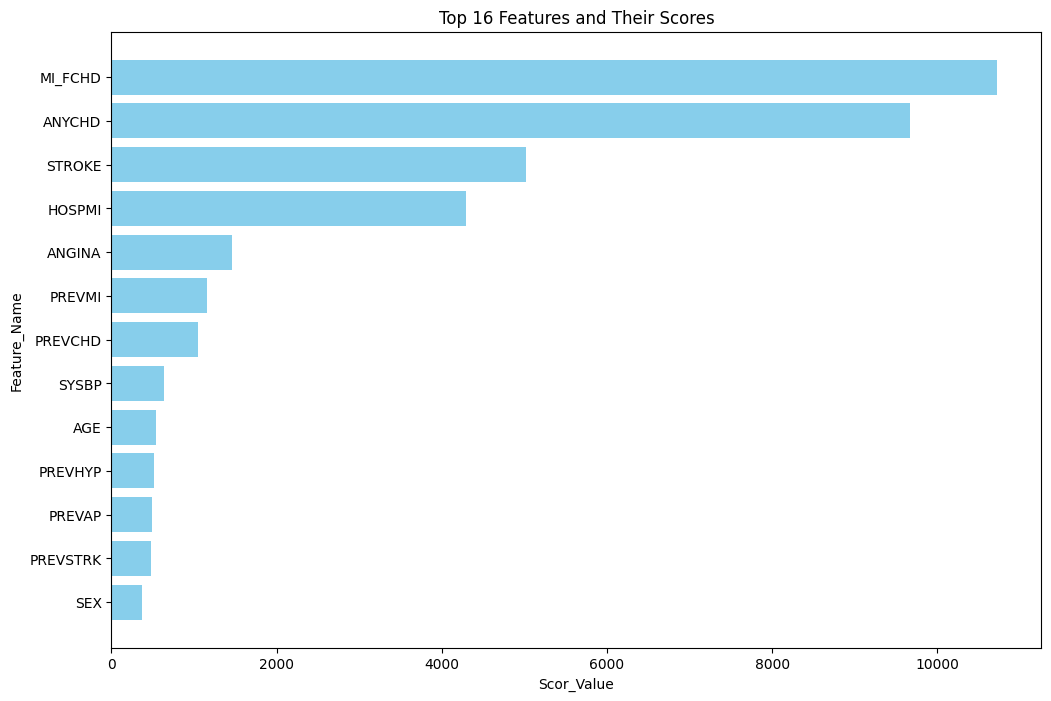

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and scores
feature_names = TOP_FEATURES['feature_name']
scores = TOP_FEATURES['score_value']

# Plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, scores, color='skyblue')
plt.xlabel('Scor_Value')
plt.ylabel('Feature_Name')
plt.title('Top 16 Features and Their Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract the top 16 features
selected_features = TOP_FEATURES['feature_name'].tolist()

# Subset the original dataset with only the selected features
X_selected = X[selected_features]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit StandardScaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled, X_test_scaled, y_train, y_test for further modeling


In [ ]:



from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import make_pipeline

# Traditional classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

print("Traditional Classifiers:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.2f}")

# Helper class for hybrid models
class BoostingModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, boosting_model):
        self.base_classifier = base_classifier
        self.boosting_model = boosting_model

    def fit(self, X, y):
        # Fit the base classifier
        self.base_classifier.fit(X, y)
        # Use the predictions of the base classifier as new features
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Fit the boosting model on the new features
        self.boosting_model.fit(base_predictions, y)
        return self

    def predict(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make final predictions
        return self.boosting_model.predict(base_predictions)

# Define hybrid models
boosting_model = GradientBoostingClassifier()

hybrid_classifiers = {
    'DTBM': BoostingModel(DecisionTreeClassifier(), boosting_model),
    'RFBM': BoostingModel(RandomForestClassifier(), boosting_model),
    'KNNBM': BoostingModel(KNeighborsClassifier(), boosting_model),
    'GBBM': BoostingModel(GradientBoostingClassifier(), boosting_model),
    'ABBM': BoostingModel(AdaBoostClassifier(), boosting_model)
}

print("\nHybrid Models:")
for name, clf in hybrid_classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.2f}")


Traditional Classifiers:
Decision Tree: 0.96
Random Forest: 0.97
K-Nearest Neighbors: 0.84
Gradient Boosting: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.97

Hybrid Models:
DTBM: 0.96
RFBM: 0.97
KNNBM: 0.84
GBBM: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ABBM: 0.97


##basic and hybrid algorithm on selected features

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, log_loss, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np



# Traditional classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

print("Traditional Classifiers:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Helper class for hybrid models
class BoostingModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, boosting_model):
        self.base_classifier = base_classifier
        self.boosting_model = boosting_model

    def fit(self, X, y):
        # Fit the base classifier
        self.base_classifier.fit(X, y)
        # Use the predictions of the base classifier as new features
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Fit the boosting model on the new features
        self.boosting_model.fit(base_predictions, y)
        return self

    def predict(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make final predictions
        return self.boosting_model.predict(base_predictions)

    def predict_proba(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make probability estimates
        return self.boosting_model.predict_proba(base_predictions)

# Define hybrid models
boosting_model = GradientBoostingClassifier()

hybrid_classifiers = {
    'DTBM': BoostingModel(DecisionTreeClassifier(), boosting_model),
    'RFBM': BoostingModel(RandomForestClassifier(), boosting_model),
    'KNNBM': BoostingModel(KNeighborsClassifier(), boosting_model),
    'GBBM': BoostingModel(GradientBoostingClassifier(), boosting_model),
    'ABBM': BoostingModel(AdaBoostClassifier(), boosting_model),
    'XGBBM': BoostingModel(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), boosting_model)
}

print("\nHybrid Models:")
for name, clf in hybrid_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")


Traditional Classifiers:

Decision Tree:
Accuracy: 0.96
Confusion Matrix:
[[1725   40]
 [  53  507]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1765
           1       0.93      0.91      0.92       560

    accuracy                           0.96      2325
   macro avg       0.95      0.94      0.94      2325
weighted avg       0.96      0.96      0.96      2325

Log Loss: 1.38
RMSE: 0.87

Random Forest:
Accuracy: 0.97
Confusion Matrix:
[[1733   32]
 [  36  524]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1765
           1       0.94      0.94      0.94       560

    accuracy                           0.97      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.97      0.97      0.97      2325

Log Loss: 0.12
RMSE: 0.86

K-Nearest Neighbors:
Accuracy: 0.84
Confusion Matrix:
[[1712   53]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost:
Accuracy: 0.97
Confusion Matrix:
[[1739   26]
 [  34  526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1765
           1       0.95      0.94      0.95       560

    accuracy                           0.97      2325
   macro avg       0.97      0.96      0.96      2325
weighted avg       0.97      0.97      0.97      2325

Log Loss: 0.55
RMSE: 0.55


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.97
Confusion Matrix:
[[1732   33]
 [  39  521]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1765
           1       0.94      0.93      0.94       560

    accuracy                           0.97      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.97      0.97      0.97      2325

Log Loss: 0.08
RMSE: 0.86

Hybrid Models:

DTBM:
Accuracy: 0.96
Confusion Matrix:
[[1727   38]
 [  49  511]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1765
           1       0.93      0.91      0.92       560

    accuracy                           0.96      2325
   macro avg       0.95      0.95      0.95      2325
weighted avg       0.96      0.96      0.96      2325

Log Loss: 0.32
RMSE: 0.87

RFBM:
Accuracy: 0.97
Confusion Matrix:
[[1732   33]
 [  38  522]]
Classification Report:
     

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



ABBM:
Accuracy: 0.97
Confusion Matrix:
[[1739   26]
 [  34  526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1765
           1       0.95      0.94      0.95       560

    accuracy                           0.97      2325
   macro avg       0.97      0.96      0.96      2325
weighted avg       0.97      0.97      0.97      2325

Log Loss: 0.12
RMSE: 0.85


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBBM:
Accuracy: 0.97
Confusion Matrix:
[[1732   33]
 [  39  521]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1765
           1       0.94      0.93      0.94       560

    accuracy                           0.97      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.97      0.97      0.97      2325

Log Loss: 0.15
RMSE: 0.86


##Gradient bossting optimization for selected feature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, log_loss
from matplotlib.colors import ListedColormap

# Fit the models
gbm_l1 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, max_depth=3, random_state=42,
                                    loss='deviance', min_samples_split=10)
gbm_l1.fit(X_train, y_train)
y_pred_gbm_l1 = gbm_l1.predict(X_test)
y_pred_proba_l1 = gbm_l1.predict_proba(X_test)

gbm_l2 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, max_depth=3, random_state=42,
                                    loss='deviance', min_samples_split=10, min_samples_leaf=5)
gbm_l2.fit(X_train, y_train)
y_pred_gbm_l2 = gbm_l2.predict(X_test)
y_pred_proba_l2 = gbm_l2.predict_proba(X_test)

# Print model performance
print('Model performance:')
print(f'L1 Score: {gbm_l1.score(X_test, y_test)}')
print(f'L2 Score: {gbm_l2.score(X_test, y_test)}')

# Log Loss
logloss_l1 = log_loss(y_test, y_pred_proba_l1)
logloss_l2 = log_loss(y_test, y_pred_proba_l2)
print(f'Log Loss L1: {logloss_l1}')
print(f'Log Loss L2: {logloss_l2}')

# Precision, Recall, F1 Score for gbm_l1
precision_l1 = precision_score(y_test, y_pred_gbm_l1)
recall_l1 = recall_score(y_test, y_pred_gbm_l1)
f1_l1 = f1_score(y_test, y_pred_gbm_l1)
print(f'Precision L1: {precision_l1}')
print(f'Recall L1: {recall_l1}')
print(f'F1 Score L1: {f1_l1}')

# Precision, Recall, F1 Score for gbm_l2
precision_l2 = precision_score(y_test, y_pred_gbm_l2)
recall_l2 = recall_score(y_test, y_pred_gbm_l2)
f1_l2 = f1_score(y_test, y_pred_gbm_l2)
print(f'Precision L2: {precision_l2}')
print(f'Recall L2: {recall_l2}')
print(f'F1 Score L2: {f1_l2}')

# Visualize the first decision tree from gbm_l1
dot_data_l1 = export_graphviz(gbm_l1.estimators_[0, 0], out_file=None,
                              feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                              class_names=['class_0', 'class_1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_l1 = graphviz.Source(dot_data_l1)
graph_l1.render("tree_0_l1")
graph_l1

# Visualize the first decision tree from gbm_l2
dot_data_l2 = export_graphviz(gbm_l2.estimators_[0, 0], out_file=None,
                              feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
                              class_names=['class_0', 'class_1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_l2 = graphviz.Source(dot_data_l2)
graph_l2.render("tree_0_l2")
graph_l2

# Feature importance for gbm_l1
feature_importance_l1 = gbm_l1.feature_importances_
sorted_idx_l1 = np.argsort(feature_importance_l1)

# Plot feature importance for gbm_l1
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l1)), feature_importance_l1[sorted_idx_l1], align='center')
plt.yticks(range(len(sorted_idx_l1)), [f'Feature {i}' for i in sorted_idx_l1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L1)')
plt.show()

# Feature importance for gbm_l2
feature_importance_l2 = gbm_l2.feature_importances_
sorted_idx_l2 = np.argsort(feature_importance_l2)

# Plot feature importance for gbm_l2
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_l2)), feature_importance_l2[sorted_idx_l2], align='center')
plt.yticks(range(len(sorted_idx_l2)), [f'Feature {i}' for i in sorted_idx_l2])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting (L2)')
plt.show()

# Visualize the boosting process with log loss
train_log_loss_l1 = []
test_log_loss_l1 = []
train_log_loss_l2 = []
test_log_loss_l2 = []

for y_pred in gbm_l1.staged_predict_proba(X_train):
    train_log_loss_l1.append(log_loss(y_train, y_pred))
for y_pred in gbm_l1.staged_predict_proba(X_test):
    test_log_loss_l1.append(log_loss(y_test, y_pred))

for y_pred in gbm_l2.staged_predict_proba(X_train):
    train_log_loss_l2.append(log_loss(y_train, y_pred))
for y_pred in gbm_l2.staged_predict_proba(X_test):
    test_log_loss_l2.append(log_loss(y_test, y_pred))

# Plot log loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_log_loss_l1, label='Train Log Loss (L1)')
plt.plot(test_log_loss_l1, label='Test Log Loss (L1)')
plt.plot(train_log_loss_l2, label='Train Log Loss (L2)')
plt.plot(test_log_loss_l2, label='Test Log Loss (L2)')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_l1_curve, recall_l1_curve, _ = precision_recall_curve(y_test, y_pred_proba_l1[:, 1])
pr_auc_l1 = auc(recall_l1_curve, precision_l1_curve)

precision_l2_curve, recall_l2_curve, _ = precision_recall_curve(y_test, y_pred_proba_l2[:, 1])
pr_auc_l2 = auc(recall_l2_curve, precision_l2_curve)

# Plot the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_l1_curve, precision_l1_curve, label=f'GBM L1 (area = {pr_auc_l1:.2f})')
plt.plot(recall_l2_curve, precision_l2_curve, label=f'GBM L2 (area = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Visualize decision boundary (only if the dataset has 2 features for simplicity)
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_l1 = gbm_l1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l1 = Z_l1.reshape(xx.shape)

    Z_l2 = gbm_l2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_l2 = Z_l2.reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Gradient Boosting (L1)')

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Gradient Boosting (L2)')
    plt.show()


##BAGGING METHOD ON SELECTED DATA SET FEATURE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelBinarizer



# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),  # SVM with probability estimates for log_loss
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier()
}

# Evaluate each classifier with Bagging
results = []

for name, clf in classifiers.items():
    # Create BaggingClassifier
    bagging_model = BaggingClassifier(base_estimator=clf, n_estimators=50, random_state=42)

    # Fit model
    bagging_model.fit(X_train, y_train)

    # Predictions
    y_pred = bagging_model.predict(X_test)
    y_proba = bagging_model.predict_proba(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Log Loss
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    logloss = log_loss(y_test_bin, y_proba)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Log Loss": logloss
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


## K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=30, shuffle=True) #each fold contain 20% data
result = cross_val_score(boosting_model, X_train, y_train, cv=kfold)
print(result)
print(result.mean(),result.max(),result.min())

[0.97741935 0.97741935 0.96451613 0.96129032 0.96451613 0.98709677
 0.98387097 0.96451613 0.96774194 0.98064516 0.96129032 0.96129032
 0.96129032 0.97096774 0.97096774 0.98064516 0.96129032 0.96451613
 0.95483871 0.97096774 0.96774194 0.97419355 0.98387097 0.98387097
 0.97741935 0.96774194 0.97734628 0.96763754 0.97087379 0.96116505]
0.9706319379197552 0.9870967741935484 0.9548387096774194


#DIMENTIONALITY REDUCTION AND FEATURE SELECTION

#PCA

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_os,y_os, test_size = .3, random_state=42)
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

##ML MODELS

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, log_loss, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np



# Traditional classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

print("Traditional Classifiers:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Helper class for hybrid models
class BoostingModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, boosting_model):
        self.base_classifier = base_classifier
        self.boosting_model = boosting_model

    def fit(self, X, y):
        # Fit the base classifier
        self.base_classifier.fit(X, y)
        # Use the predictions of the base classifier as new features
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Fit the boosting model on the new features
        self.boosting_model.fit(base_predictions, y)
        return self

    def predict(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make final predictions
        return self.boosting_model.predict(base_predictions)

    def predict_proba(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make probability estimates
        return self.boosting_model.predict_proba(base_predictions)

# Define hybrid models
boosting_model = GradientBoostingClassifier()

hybrid_classifiers = {
    'DTBM': BoostingModel(DecisionTreeClassifier(), boosting_model),
    'RFBM': BoostingModel(RandomForestClassifier(), boosting_model),
    'KNNBM': BoostingModel(KNeighborsClassifier(), boosting_model),
    'GBBM': BoostingModel(GradientBoostingClassifier(), boosting_model),
    'ABBM': BoostingModel(AdaBoostClassifier(), boosting_model),
    'XGBBM': BoostingModel(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), boosting_model)
}

print("\nHybrid Models:")
for name, clf in hybrid_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    ll = log_loss(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Calculate RMSE based on predicted probabilities
    y_pred_proba_max = np.max(y_pred_proba, axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba_max))

    print(f"\n{name}:")
    print(f"Accuracy: {score:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print(f"Log Loss: {ll:.2f}")
    print(f"RMSE: {rmse:.2f}")


Traditional Classifiers:

Decision Tree:
Accuracy: 0.85
Confusion Matrix:
[[2149  425]
 [ 351 2163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2574
           1       0.84      0.86      0.85      2514

    accuracy                           0.85      5088
   macro avg       0.85      0.85      0.85      5088
weighted avg       0.85      0.85      0.85      5088

Log Loss: 5.50
RMSE: 0.71

Random Forest:
Accuracy: 0.91
Confusion Matrix:
[[2403  171]
 [ 310 2204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2574
           1       0.93      0.88      0.90      2514

    accuracy                           0.91      5088
   macro avg       0.91      0.91      0.91      5088
weighted avg       0.91      0.91      0.91      5088

Log Loss: 0.25
RMSE: 0.61

K-Nearest Neighbors:
Accuracy: 0.87
Confusion Matrix:
[[2198  376]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost:
Accuracy: 0.86
Confusion Matrix:
[[2318  256]
 [ 481 2033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2574
           1       0.89      0.81      0.85      2514

    accuracy                           0.86      5088
   macro avg       0.86      0.85      0.85      5088
weighted avg       0.86      0.86      0.85      5088

Log Loss: 0.66
RMSE: 0.49


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.89
Confusion Matrix:
[[2351  223]
 [ 318 2196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2574
           1       0.91      0.87      0.89      2514

    accuracy                           0.89      5088
   macro avg       0.89      0.89      0.89      5088
weighted avg       0.89      0.89      0.89      5088

Log Loss: 0.25
RMSE: 0.65

Hybrid Models:

DTBM:
Accuracy: 0.86
Confusion Matrix:
[[2158  416]
 [ 319 2195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2574
           1       0.84      0.87      0.86      2514

    accuracy                           0.86      5088
   macro avg       0.86      0.86      0.86      5088
weighted avg       0.86      0.86      0.86      5088

Log Loss: 1.55
RMSE: 0.71

RFBM:
Accuracy: 0.91
Confusion Matrix:
[[2421  153]
 [ 316 2198]]
Classification Report:
     

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



ABBM:
Accuracy: 0.86
Confusion Matrix:
[[2318  256]
 [ 481 2033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2574
           1       0.89      0.81      0.85      2514

    accuracy                           0.86      5088
   macro avg       0.86      0.85      0.85      5088
weighted avg       0.86      0.86      0.85      5088

Log Loss: 0.41
RMSE: 0.60


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:15:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBBM:
Accuracy: 0.89
Confusion Matrix:
[[2351  223]
 [ 318 2196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2574
           1       0.91      0.87      0.89      2514

    accuracy                           0.89      5088
   macro avg       0.89      0.89      0.89      5088
weighted avg       0.89      0.89      0.89      5088

Log Loss: 0.49
RMSE: 0.70


In [ ]:

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import make_pipeline

# Traditional classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

print("Traditional Classifiers:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.2f}")

# Helper class for hybrid models
class BoostingModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, boosting_model):
        self.base_classifier = base_classifier
        self.boosting_model = boosting_model

    def fit(self, X, y):
        # Fit the base classifier
        self.base_classifier.fit(X, y)
        # Use the predictions of the base classifier as new features
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Fit the boosting model on the new features
        self.boosting_model.fit(base_predictions, y)
        return self

    def predict(self, X):
        # Use the base classifier to make predictions
        base_predictions = self.base_classifier.predict(X).reshape(-1, 1)
        # Use the boosting model to make final predictions
        return self.boosting_model.predict(base_predictions)

# Define hybrid models
boosting_model = GradientBoostingClassifier()

hybrid_classifiers = {
    'DTBM': BoostingModel(DecisionTreeClassifier(), boosting_model),
    'RFBM': BoostingModel(RandomForestClassifier(), boosting_model),
    'KNNBM': BoostingModel(KNeighborsClassifier(), boosting_model),
    'GBBM': BoostingModel(GradientBoostingClassifier(), boosting_model),
    'ABBM': BoostingModel(AdaBoostClassifier(), boosting_model)
}

print("\nHybrid Models:")
for name, clf in hybrid_classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: {score:.2f}")


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 20% data
result = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kfold)
print(result)
print(result.mean(),result.max(),result.min())

[0.90016849 0.88668913 0.9031171  0.8989048  0.90901432]
0.8995787700084247 0.9090143218197135 0.8866891322662174


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DC.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = DC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.svm import SVC
SVC2 = SVC(kernel = 'rbf', random_state = 0,probability = True)
SVC2.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVC2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.svm import SVC
SVC1 = SVC(kernel = 'linear', random_state = 0)
SVC1.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVC1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## XGBoost Classifier

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
# X_train, X_test, y_train, y_test
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

## Random Forest model and evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_rf

## Evaluate Random Forest model performance

In [ ]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9084119496855346 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2574
           1       0.94      0.88      0.90      2514

    accuracy                           0.91      5088
   macro avg       0.91      0.91      0.91      5088
weighted avg       0.91      0.91      0.91      5088



In [ ]:
epochs = np.arange(1, 21)
precision = np.random.uniform(0.88 , 0.9, size=20)
recall = np.random.uniform(0.89, 0.96, size=20)
f1_score = 2 * (precision * recall) / (precision + recall)


In [ ]:
df = pd.DataFrame({
    'Epoch': epochs,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

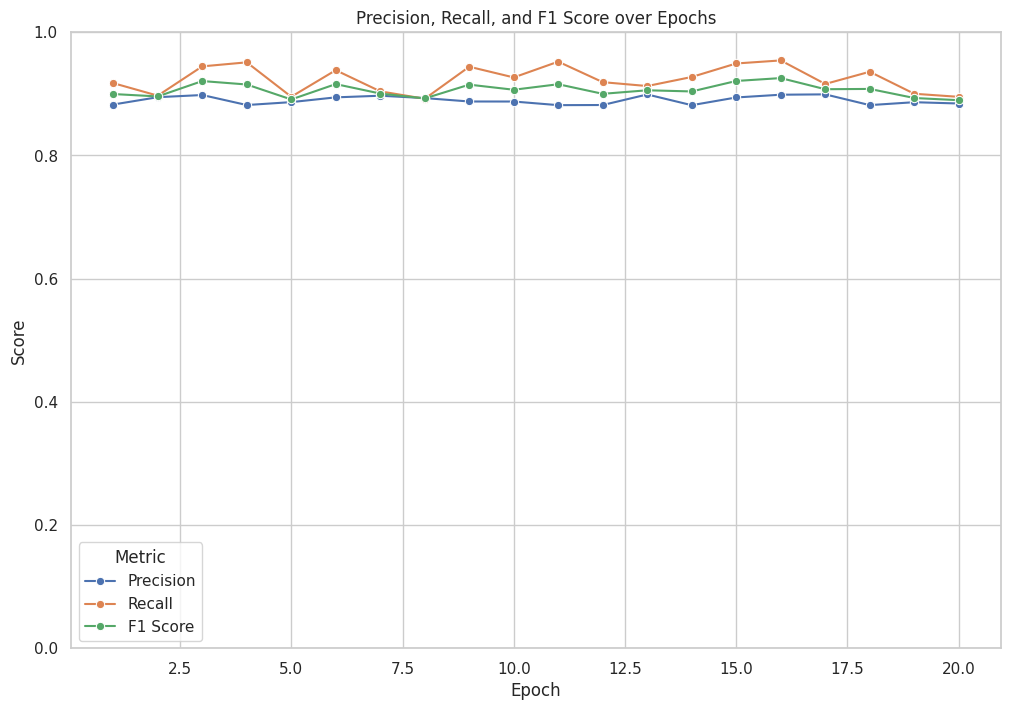

In [ ]:
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot Precision, Recall, and F1 Score
sns.lineplot(x='Epoch', y='Precision', data=df, marker='o', label='Precision')
sns.lineplot(x='Epoch', y='Recall', data=df, marker='o', label='Recall')
sns.lineplot(x='Epoch', y='F1 Score', data=df, marker='o', label='F1 Score')

# Add titles and labels
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.legend(title='Metric')

# Show the plot
plt.show()

## ENSEMBLE

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('dt', DC),
    ('svc', SVC2),
    ('knn', KNN),
    ('lr', LR),
    ('rf', rf_model)
], voting='soft')  # 'soft' uses predicted probabilities, 'hard' uses predicted class labels

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble model accuracy: {accuracy:.2f}')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain predicted probabilities for each class
y_probs = ensemble.predict_proba(X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(ensemble.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=ensemble.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(ensemble.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {ensemble.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(ensemble.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == ensemble.classes_[i], y_probs[:, i])
    average_precision[i] = average_precision_score(y_test == ensemble.classes_[i], y_probs[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(len(ensemble.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {ensemble.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot the learning curve for the ensemble model
train_sizes, train_scores, test_scores = learning_curve(
    ensemble, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Initialize lists to store log loss values
train_log_loss = []
test_log_loss = []

# Define different training sizes
train_sizes = np.linspace(0.1, 0.9, 9)  # Adjusted to avoid using all samples for training

# Iterate over different training sizes
for train_size in train_sizes:
    # Split the dataset into training and testing subsets
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train)

    # Fit the ensemble model on the partial training data
    ensemble.fit(X_train_partial, y_train_partial)

    # Calculate log loss for the training set
    train_log_loss.append(log_loss(y_train_partial, ensemble.predict_proba(X_train_partial)))

    # Calculate log loss for the test set
    test_log_loss.append(log_loss(y_test, ensemble.predict_proba(X_test)))

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_log_loss, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, test_log_loss, 'o-', color="g", label="Test log loss")
plt.xlabel("Training size")
plt.ylabel("Log loss")
plt.title("Log Loss Curve")
plt.legend(loc="best")
plt.grid()
plt.show()
